In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import pickle
from matplotlib import pyplot as plt
from langdetect import detect
import json

In [2]:
with open("new_lems.txt", encoding="utf8") as file:
    lemmas = eval(file.read())

In [3]:
texts = [" ".join(text) for text in lemmas]

In [4]:
from langdetect import detect

for i, text in enumerate(texts):
    print(f"{i}/{len(texts)}")
    try:
        if detect(text) != "en":
            del texts[i]
    except:
        del texts[i]

0/273427
1/273427
2/273427
3/273426
4/273425
5/273425
6/273425
7/273425
8/273425
9/273425
10/273425
11/273425
12/273425
13/273425
14/273425
15/273425
16/273425
17/273425
18/273425
19/273425
20/273425
21/273425
22/273425
23/273425
24/273425
25/273425
26/273425
27/273425
28/273425
29/273425
30/273425
31/273425
32/273424
33/273424
34/273424
35/273424
36/273424
37/273423
38/273423
39/273423
40/273423
41/273423
42/273422
43/273422
44/273422
45/273421
46/273421
47/273421
48/273421
49/273421
50/273421
51/273421
52/273421
53/273421
54/273421
55/273421
56/273420
57/273420
58/273419
59/273419
60/273419
61/273419
62/273419
63/273419
64/273419
65/273419
66/273419
67/273418
68/273417
69/273417
70/273416
71/273416
72/273416
73/273416
74/273416
75/273416
76/273416
77/273415
78/273415
79/273415
80/273414
81/273414
82/273413
83/273413
84/273413
85/273413
86/273413
87/273413
88/273413
89/273413
90/273413
91/273413
92/273413
93/273413
94/273413
95/273413
96/273413
97/273413
98/273413
99/273413
100/273412

761/273232
762/273231
763/273230
764/273230
765/273230
766/273230
767/273230
768/273230
769/273230
770/273230
771/273230
772/273230
773/273230
774/273230
775/273229
776/273229
777/273229
778/273228
779/273228
780/273228
781/273227
782/273227
783/273226
784/273225
785/273224
786/273224
787/273224
788/273224
789/273224
790/273224
791/273224
792/273224
793/273224
794/273224
795/273224
796/273223
797/273223
798/273222
799/273222
800/273222
801/273222
802/273221
803/273220
804/273219
805/273219
806/273219
807/273219
808/273219
809/273219
810/273218
811/273218
812/273217
813/273217
814/273217
815/273217
816/273217
817/273216
818/273216
819/273216
820/273216
821/273216
822/273215
823/273215
824/273215
825/273214
826/273214
827/273214
828/273214
829/273214
830/273214
831/273213
832/273213
833/273212
834/273212
835/273212
836/273212
837/273212
838/273211
839/273210
840/273210
841/273210
842/273210
843/273209
844/273209
845/273209
846/273209
847/273208
848/273208
849/273207
850/273207
851/273207

1467/273061
1468/273061
1469/273061
1470/273061
1471/273061
1472/273061
1473/273061
1474/273061
1475/273061
1476/273061
1477/273061
1478/273061
1479/273061
1480/273061
1481/273060
1482/273060
1483/273060
1484/273059
1485/273059
1486/273058
1487/273058
1488/273058
1489/273057
1490/273057
1491/273057
1492/273057
1493/273057
1494/273057
1495/273057
1496/273056
1497/273055
1498/273054
1499/273053
1500/273053
1501/273052
1502/273052
1503/273052
1504/273052
1505/273052
1506/273051
1507/273051
1508/273051
1509/273051
1510/273050
1511/273050
1512/273050
1513/273050
1514/273050
1515/273050
1516/273050
1517/273050
1518/273049
1519/273049
1520/273049
1521/273049
1522/273049
1523/273048
1524/273047
1525/273046
1526/273046
1527/273046
1528/273046
1529/273046
1530/273046
1531/273046
1532/273046
1533/273046
1534/273046
1535/273045
1536/273044
1537/273043
1538/273043
1539/273043
1540/273042
1541/273042
1542/273041
1543/273041
1544/273041
1545/273041
1546/273041
1547/273041
1548/273041
1549/273041
1550

2183/272932
2184/272932
2185/272932
2186/272932
2187/272932
2188/272932
2189/272932
2190/272932
2191/272932
2192/272932
2193/272932
2194/272932
2195/272932
2196/272932
2197/272932
2198/272932
2199/272932
2200/272932
2201/272932
2202/272932
2203/272932
2204/272932
2205/272932
2206/272932
2207/272932
2208/272932
2209/272932
2210/272932
2211/272932
2212/272932
2213/272932
2214/272932
2215/272932
2216/272932
2217/272932
2218/272932
2219/272932
2220/272932
2221/272932
2222/272932
2223/272932
2224/272932
2225/272932
2226/272932
2227/272932
2228/272932
2229/272932
2230/272932
2231/272932
2232/272932
2233/272932
2234/272932
2235/272932
2236/272932
2237/272932
2238/272932
2239/272932
2240/272932
2241/272932
2242/272932
2243/272932
2244/272932
2245/272932
2246/272932
2247/272932
2248/272932
2249/272932
2250/272932
2251/272932
2252/272932
2253/272932
2254/272932
2255/272932
2256/272932
2257/272932
2258/272932
2259/272932
2260/272932
2261/272932
2262/272932
2263/272932
2264/272932
2265/272932
2266

2889/272818
2890/272818
2891/272818
2892/272817
2893/272817
2894/272817
2895/272817
2896/272817
2897/272817
2898/272817
2899/272817
2900/272817
2901/272817
2902/272817
2903/272816
2904/272816
2905/272816
2906/272816
2907/272816
2908/272816
2909/272816
2910/272816
2911/272816
2912/272815
2913/272815
2914/272814
2915/272814
2916/272814
2917/272814
2918/272813
2919/272813
2920/272813
2921/272813
2922/272813
2923/272813
2924/272813
2925/272812
2926/272812
2927/272812
2928/272812
2929/272811
2930/272811
2931/272811
2932/272811
2933/272810
2934/272809
2935/272809
2936/272809
2937/272809
2938/272809
2939/272809
2940/272809
2941/272809
2942/272809
2943/272809
2944/272809
2945/272809
2946/272809
2947/272809
2948/272809
2949/272809
2950/272809
2951/272809
2952/272809
2953/272809
2954/272809
2955/272809
2956/272809
2957/272809
2958/272809
2959/272809
2960/272809
2961/272809
2962/272809
2963/272809
2964/272808
2965/272808
2966/272808
2967/272808
2968/272808
2969/272808
2970/272808
2971/272808
2972

3580/272685
3581/272685
3582/272685
3583/272685
3584/272685
3585/272685
3586/272685
3587/272685
3588/272684
3589/272684
3590/272684
3591/272684
3592/272684
3593/272684
3594/272684
3595/272684
3596/272684
3597/272683
3598/272683
3599/272683
3600/272683
3601/272682
3602/272682
3603/272682
3604/272682
3605/272682
3606/272682
3607/272682
3608/272682
3609/272682
3610/272681
3611/272681
3612/272681
3613/272681
3614/272681
3615/272681
3616/272681
3617/272681
3618/272681
3619/272680
3620/272680
3621/272680
3622/272680
3623/272680
3624/272680
3625/272680
3626/272680
3627/272680
3628/272680
3629/272680
3630/272680
3631/272680
3632/272680
3633/272680
3634/272680
3635/272680
3636/272680
3637/272680
3638/272680
3639/272680
3640/272680
3641/272679
3642/272679
3643/272679
3644/272678
3645/272678
3646/272678
3647/272678
3648/272678
3649/272678
3650/272678
3651/272678
3652/272678
3653/272678
3654/272678
3655/272678
3656/272677
3657/272677
3658/272677
3659/272677
3660/272677
3661/272677
3662/272676
3663

4268/272552
4269/272551
4270/272551
4271/272551
4272/272551
4273/272550
4274/272550
4275/272550
4276/272550
4277/272550
4278/272550
4279/272550
4280/272550
4281/272550
4282/272550
4283/272549
4284/272549
4285/272549
4286/272549
4287/272549
4288/272549
4289/272549
4290/272549
4291/272549
4292/272549
4293/272549
4294/272548
4295/272548
4296/272548
4297/272547
4298/272547
4299/272546
4300/272546
4301/272546
4302/272546
4303/272546
4304/272546
4305/272546
4306/272546
4307/272546
4308/272546
4309/272545
4310/272545
4311/272545
4312/272544
4313/272543
4314/272543
4315/272543
4316/272543
4317/272543
4318/272542
4319/272542
4320/272541
4321/272541
4322/272541
4323/272541
4324/272541
4325/272540
4326/272540
4327/272540
4328/272540
4329/272540
4330/272540
4331/272540
4332/272539
4333/272539
4334/272539
4335/272539
4336/272539
4337/272538
4338/272538
4339/272538
4340/272538
4341/272538
4342/272538
4343/272537
4344/272537
4345/272537
4346/272537
4347/272537
4348/272536
4349/272536
4350/272536
4351

4953/272430
4954/272430
4955/272429
4956/272428
4957/272428
4958/272428
4959/272428
4960/272427
4961/272427
4962/272427
4963/272426
4964/272426
4965/272425
4966/272424
4967/272423
4968/272422
4969/272422
4970/272422
4971/272421
4972/272421
4973/272421
4974/272421
4975/272420
4976/272420
4977/272420
4978/272420
4979/272420
4980/272420
4981/272420
4982/272420
4983/272420
4984/272420
4985/272419
4986/272419
4987/272418
4988/272418
4989/272417
4990/272417
4991/272416
4992/272416
4993/272416
4994/272415
4995/272414
4996/272414
4997/272413
4998/272413
4999/272413
5000/272413
5001/272413
5002/272413
5003/272413
5004/272413
5005/272412
5006/272411
5007/272411
5008/272411
5009/272410
5010/272410
5011/272409
5012/272409
5013/272409
5014/272409
5015/272409
5016/272409
5017/272408
5018/272408
5019/272408
5020/272408
5021/272407
5022/272407
5023/272407
5024/272407
5025/272407
5026/272406
5027/272405
5028/272405
5029/272404
5030/272404
5031/272404
5032/272403
5033/272403
5034/272403
5035/272403
5036

5675/272238
5676/272238
5677/272238
5678/272238
5679/272238
5680/272238
5681/272238
5682/272237
5683/272237
5684/272237
5685/272237
5686/272237
5687/272237
5688/272237
5689/272237
5690/272237
5691/272237
5692/272237
5693/272237
5694/272237
5695/272237
5696/272237
5697/272237
5698/272237
5699/272237
5700/272237
5701/272237
5702/272237
5703/272237
5704/272237
5705/272237
5706/272237
5707/272237
5708/272237
5709/272237
5710/272237
5711/272237
5712/272237
5713/272237
5714/272237
5715/272237
5716/272237
5717/272237
5718/272237
5719/272237
5720/272237
5721/272237
5722/272237
5723/272237
5724/272237
5725/272237
5726/272236
5727/272236
5728/272236
5729/272236
5730/272236
5731/272235
5732/272235
5733/272235
5734/272234
5735/272234
5736/272234
5737/272234
5738/272234
5739/272234
5740/272234
5741/272234
5742/272234
5743/272233
5744/272232
5745/272231
5746/272231
5747/272231
5748/272231
5749/272231
5750/272231
5751/272231
5752/272231
5753/272230
5754/272229
5755/272229
5756/272229
5757/272229
5758

6375/272143
6376/272143
6377/272143
6378/272142
6379/272142
6380/272142
6381/272141
6382/272141
6383/272140
6384/272140
6385/272140
6386/272140
6387/272140
6388/272140
6389/272139
6390/272139
6391/272139
6392/272139
6393/272138
6394/272138
6395/272138
6396/272137
6397/272137
6398/272137
6399/272137
6400/272137
6401/272137
6402/272137
6403/272137
6404/272137
6405/272137
6406/272137
6407/272136
6408/272136
6409/272136
6410/272136
6411/272135
6412/272135
6413/272135
6414/272135
6415/272135
6416/272135
6417/272134
6418/272134
6419/272134
6420/272134
6421/272134
6422/272134
6423/272134
6424/272133
6425/272132
6426/272131
6427/272130
6428/272130
6429/272130
6430/272130
6431/272130
6432/272129
6433/272129
6434/272129
6435/272128
6436/272128
6437/272128
6438/272128
6439/272128
6440/272127
6441/272126
6442/272126
6443/272126
6444/272126
6445/272126
6446/272126
6447/272126
6448/272126
6449/272126
6450/272126
6451/272126
6452/272125
6453/272125
6454/272125
6455/272124
6456/272124
6457/272124
6458

7072/272028
7073/272028
7074/272028
7075/272028
7076/272028
7077/272028
7078/272028
7079/272028
7080/272028
7081/272028
7082/272028
7083/272027
7084/272027
7085/272027
7086/272027
7087/272027
7088/272027
7089/272027
7090/272027
7091/272026
7092/272026
7093/272026
7094/272026
7095/272026
7096/272026
7097/272026
7098/272026
7099/272026
7100/272026
7101/272025
7102/272025
7103/272025
7104/272025
7105/272024
7106/272024
7107/272024
7108/272024
7109/272023
7110/272023
7111/272022
7112/272022
7113/272022
7114/272022
7115/272022
7116/272022
7117/272022
7118/272022
7119/272022
7120/272022
7121/272022
7122/272022
7123/272022
7124/272022
7125/272022
7126/272022
7127/272022
7128/272022
7129/272021
7130/272020
7131/272020
7132/272020
7133/272020
7134/272020
7135/272020
7136/272020
7137/272020
7138/272020
7139/272020
7140/272020
7141/272019
7142/272019
7143/272019
7144/272019
7145/272019
7146/272019
7147/272019
7148/272019
7149/272019
7150/272019
7151/272019
7152/272019
7153/272019
7154/272019
7155

7772/271859
7773/271859
7774/271858
7775/271858
7776/271858
7777/271858
7778/271858
7779/271858
7780/271857
7781/271857
7782/271856
7783/271855
7784/271855
7785/271855
7786/271855
7787/271855
7788/271855
7789/271854
7790/271854
7791/271853
7792/271853
7793/271853
7794/271853
7795/271853
7796/271853
7797/271853
7798/271853
7799/271852
7800/271852
7801/271852
7802/271852
7803/271852
7804/271852
7805/271851
7806/271851
7807/271851
7808/271851
7809/271851
7810/271851
7811/271851
7812/271851
7813/271851
7814/271851
7815/271850
7816/271850
7817/271849
7818/271849
7819/271849
7820/271849
7821/271848
7822/271848
7823/271848
7824/271848
7825/271847
7826/271847
7827/271847
7828/271846
7829/271846
7830/271846
7831/271846
7832/271846
7833/271846
7834/271846
7835/271846
7836/271846
7837/271845
7838/271844
7839/271844
7840/271844
7841/271844
7842/271844
7843/271844
7844/271844
7845/271844
7846/271844
7847/271844
7848/271844
7849/271844
7850/271844
7851/271843
7852/271843
7853/271843
7854/271843
7855

8483/271721
8484/271721
8485/271721
8486/271721
8487/271720
8488/271720
8489/271720
8490/271719
8491/271719
8492/271719
8493/271719
8494/271718
8495/271718
8496/271717
8497/271717
8498/271717
8499/271717
8500/271716
8501/271716
8502/271716
8503/271716
8504/271716
8505/271716
8506/271716
8507/271716
8508/271716
8509/271716
8510/271716
8511/271716
8512/271716
8513/271716
8514/271716
8515/271716
8516/271716
8517/271716
8518/271716
8519/271715
8520/271715
8521/271715
8522/271715
8523/271714
8524/271713
8525/271713
8526/271712
8527/271711
8528/271711
8529/271711
8530/271711
8531/271710
8532/271710
8533/271710
8534/271710
8535/271710
8536/271710
8537/271710
8538/271710
8539/271710
8540/271710
8541/271709
8542/271708
8543/271708
8544/271708
8545/271708
8546/271708
8547/271708
8548/271708
8549/271708
8550/271707
8551/271706
8552/271705
8553/271705
8554/271705
8555/271704
8556/271704
8557/271704
8558/271704
8559/271703
8560/271703
8561/271703
8562/271703
8563/271703
8564/271703
8565/271702
8566

9178/271621
9179/271620
9180/271620
9181/271620
9182/271620
9183/271620
9184/271620
9185/271619
9186/271619
9187/271619
9188/271619
9189/271619
9190/271619
9191/271618
9192/271618
9193/271618
9194/271618
9195/271617
9196/271617
9197/271617
9198/271617
9199/271617
9200/271617
9201/271617
9202/271617
9203/271617
9204/271617
9205/271617
9206/271617
9207/271616
9208/271616
9209/271616
9210/271616
9211/271616
9212/271616
9213/271616
9214/271616
9215/271616
9216/271615
9217/271615
9218/271615
9219/271615
9220/271614
9221/271614
9222/271614
9223/271613
9224/271613
9225/271613
9226/271613
9227/271612
9228/271612
9229/271612
9230/271612
9231/271612
9232/271612
9233/271612
9234/271612
9235/271612
9236/271612
9237/271612
9238/271612
9239/271612
9240/271612
9241/271612
9242/271612
9243/271611
9244/271610
9245/271609
9246/271609
9247/271609
9248/271609
9249/271609
9250/271609
9251/271608
9252/271608
9253/271608
9254/271607
9255/271606
9256/271605
9257/271605
9258/271605
9259/271605
9260/271605
9261

9865/271447
9866/271447
9867/271446
9868/271446
9869/271446
9870/271446
9871/271446
9872/271446
9873/271445
9874/271445
9875/271445
9876/271445
9877/271445
9878/271445
9879/271445
9880/271445
9881/271445
9882/271445
9883/271445
9884/271444
9885/271444
9886/271443
9887/271443
9888/271443
9889/271443
9890/271443
9891/271443
9892/271442
9893/271441
9894/271440
9895/271440
9896/271440
9897/271440
9898/271440
9899/271439
9900/271439
9901/271439
9902/271439
9903/271439
9904/271439
9905/271439
9906/271439
9907/271438
9908/271438
9909/271437
9910/271437
9911/271436
9912/271436
9913/271436
9914/271436
9915/271436
9916/271436
9917/271435
9918/271435
9919/271435
9920/271435
9921/271435
9922/271435
9923/271434
9924/271433
9925/271433
9926/271433
9927/271433
9928/271433
9929/271433
9930/271433
9931/271433
9932/271432
9933/271431
9934/271431
9935/271430
9936/271430
9937/271429
9938/271429
9939/271428
9940/271428
9941/271427
9942/271426
9943/271426
9944/271425
9945/271424
9946/271423
9947/271423
9948

10522/271328
10523/271328
10524/271328
10525/271327
10526/271327
10527/271327
10528/271327
10529/271326
10530/271326
10531/271326
10532/271325
10533/271324
10534/271324
10535/271324
10536/271324
10537/271324
10538/271323
10539/271322
10540/271322
10541/271321
10542/271320
10543/271319
10544/271319
10545/271319
10546/271319
10547/271319
10548/271319
10549/271319
10550/271318
10551/271317
10552/271316
10553/271316
10554/271315
10555/271314
10556/271314
10557/271314
10558/271314
10559/271314
10560/271313
10561/271313
10562/271313
10563/271313
10564/271313
10565/271312
10566/271312
10567/271312
10568/271311
10569/271310
10570/271310
10571/271310
10572/271310
10573/271309
10574/271309
10575/271309
10576/271309
10577/271308
10578/271308
10579/271308
10580/271308
10581/271307
10582/271307
10583/271307
10584/271307
10585/271307
10586/271306
10587/271305
10588/271305
10589/271305
10590/271305
10591/271305
10592/271305
10593/271305
10594/271305
10595/271304
10596/271304
10597/271303
10598/271302

11177/271136
11178/271136
11179/271136
11180/271136
11181/271136
11182/271136
11183/271136
11184/271136
11185/271135
11186/271134
11187/271133
11188/271132
11189/271132
11190/271132
11191/271132
11192/271132
11193/271132
11194/271131
11195/271131
11196/271130
11197/271130
11198/271129
11199/271129
11200/271129
11201/271128
11202/271128
11203/271127
11204/271127
11205/271127
11206/271127
11207/271126
11208/271126
11209/271126
11210/271126
11211/271126
11212/271126
11213/271126
11214/271126
11215/271126
11216/271126
11217/271126
11218/271125
11219/271125
11220/271125
11221/271125
11222/271125
11223/271125
11224/271125
11225/271125
11226/271124
11227/271124
11228/271124
11229/271124
11230/271124
11231/271124
11232/271124
11233/271124
11234/271124
11235/271123
11236/271122
11237/271122
11238/271122
11239/271121
11240/271121
11241/271121
11242/271121
11243/271121
11244/271121
11245/271121
11246/271121
11247/271121
11248/271121
11249/271121
11250/271121
11251/271121
11252/271121
11253/271121

11821/270991
11822/270991
11823/270990
11824/270990
11825/270990
11826/270990
11827/270990
11828/270989
11829/270989
11830/270989
11831/270989
11832/270989
11833/270989
11834/270989
11835/270988
11836/270988
11837/270988
11838/270988
11839/270988
11840/270988
11841/270988
11842/270987
11843/270987
11844/270987
11845/270987
11846/270987
11847/270987
11848/270987
11849/270987
11850/270986
11851/270986
11852/270985
11853/270985
11854/270985
11855/270985
11856/270985
11857/270985
11858/270985
11859/270985
11860/270985
11861/270985
11862/270985
11863/270985
11864/270984
11865/270984
11866/270984
11867/270984
11868/270984
11869/270984
11870/270983
11871/270983
11872/270983
11873/270983
11874/270982
11875/270982
11876/270982
11877/270981
11878/270981
11879/270981
11880/270981
11881/270980
11882/270980
11883/270980
11884/270980
11885/270980
11886/270980
11887/270980
11888/270980
11889/270980
11890/270980
11891/270980
11892/270980
11893/270980
11894/270979
11895/270979
11896/270979
11897/270979

12465/270887
12466/270887
12467/270887
12468/270887
12469/270887
12470/270887
12471/270887
12472/270886
12473/270886
12474/270886
12475/270886
12476/270886
12477/270886
12478/270886
12479/270886
12480/270886
12481/270886
12482/270885
12483/270884
12484/270884
12485/270884
12486/270883
12487/270882
12488/270882
12489/270882
12490/270882
12491/270882
12492/270882
12493/270882
12494/270882
12495/270882
12496/270882
12497/270882
12498/270882
12499/270881
12500/270881
12501/270881
12502/270881
12503/270880
12504/270880
12505/270880
12506/270880
12507/270880
12508/270880
12509/270879
12510/270879
12511/270879
12512/270879
12513/270879
12514/270879
12515/270878
12516/270877
12517/270877
12518/270876
12519/270876
12520/270876
12521/270876
12522/270875
12523/270874
12524/270873
12525/270872
12526/270871
12527/270871
12528/270870
12529/270869
12530/270869
12531/270869
12532/270869
12533/270869
12534/270869
12535/270868
12536/270868
12537/270868
12538/270868
12539/270867
12540/270867
12541/270867

13122/270715
13123/270715
13124/270715
13125/270715
13126/270715
13127/270715
13128/270715
13129/270715
13130/270715
13131/270715
13132/270715
13133/270715
13134/270715
13135/270714
13136/270714
13137/270714
13138/270714
13139/270714
13140/270714
13141/270714
13142/270714
13143/270714
13144/270714
13145/270714
13146/270714
13147/270714
13148/270714
13149/270714
13150/270714
13151/270714
13152/270714
13153/270714
13154/270714
13155/270714
13156/270714
13157/270714
13158/270713
13159/270712
13160/270712
13161/270712
13162/270712
13163/270712
13164/270712
13165/270712
13166/270712
13167/270712
13168/270712
13169/270712
13170/270712
13171/270712
13172/270712
13173/270712
13174/270712
13175/270712
13176/270712
13177/270712
13178/270712
13179/270712
13180/270712
13181/270712
13182/270711
13183/270711
13184/270711
13185/270711
13186/270711
13187/270711
13188/270711
13189/270711
13190/270711
13191/270711
13192/270711
13193/270711
13194/270711
13195/270711
13196/270711
13197/270711
13198/270711

13759/270567
13760/270567
13761/270567
13762/270567
13763/270566
13764/270566
13765/270566
13766/270566
13767/270566
13768/270566
13769/270566
13770/270566
13771/270565
13772/270565
13773/270565
13774/270564
13775/270564
13776/270564
13777/270564
13778/270563
13779/270563
13780/270563
13781/270563
13782/270563
13783/270563
13784/270563
13785/270563
13786/270563
13787/270563
13788/270563
13789/270563
13790/270563
13791/270562
13792/270561
13793/270561
13794/270560
13795/270559
13796/270559
13797/270559
13798/270559
13799/270559
13800/270558
13801/270558
13802/270558
13803/270558
13804/270558
13805/270558
13806/270558
13807/270558
13808/270558
13809/270557
13810/270557
13811/270557
13812/270557
13813/270557
13814/270556
13815/270556
13816/270556
13817/270555
13818/270554
13819/270554
13820/270554
13821/270554
13822/270554
13823/270554
13824/270554
13825/270554
13826/270554
13827/270554
13828/270554
13829/270554
13830/270554
13831/270553
13832/270552
13833/270552
13834/270552
13835/270552

14421/270493
14422/270493
14423/270492
14424/270491
14425/270491
14426/270491
14427/270491
14428/270491
14429/270491
14430/270491
14431/270491
14432/270491
14433/270491
14434/270490
14435/270490
14436/270490
14437/270490
14438/270489
14439/270489
14440/270489
14441/270488
14442/270487
14443/270487
14444/270487
14445/270487
14446/270487
14447/270487
14448/270486
14449/270486
14450/270485
14451/270485
14452/270485
14453/270485
14454/270485
14455/270485
14456/270485
14457/270485
14458/270484
14459/270484
14460/270484
14461/270483
14462/270483
14463/270483
14464/270483
14465/270482
14466/270482
14467/270482
14468/270481
14469/270481
14470/270481
14471/270481
14472/270481
14473/270481
14474/270480
14475/270480
14476/270480
14477/270480
14478/270480
14479/270479
14480/270479
14481/270479
14482/270479
14483/270479
14484/270479
14485/270479
14486/270479
14487/270479
14488/270479
14489/270479
14490/270478
14491/270478
14492/270477
14493/270477
14494/270477
14495/270477
14496/270477
14497/270477

15072/270322
15073/270322
15074/270322
15075/270322
15076/270322
15077/270322
15078/270322
15079/270322
15080/270322
15081/270322
15082/270322
15083/270322
15084/270322
15085/270322
15086/270322
15087/270322
15088/270322
15089/270322
15090/270322
15091/270321
15092/270321
15093/270321
15094/270320
15095/270320
15096/270320
15097/270320
15098/270320
15099/270319
15100/270319
15101/270319
15102/270319
15103/270319
15104/270318
15105/270318
15106/270318
15107/270318
15108/270318
15109/270318
15110/270317
15111/270317
15112/270317
15113/270317
15114/270317
15115/270317
15116/270316
15117/270316
15118/270316
15119/270316
15120/270316
15121/270316
15122/270316
15123/270316
15124/270316
15125/270316
15126/270316
15127/270316
15128/270316
15129/270316
15130/270316
15131/270316
15132/270316
15133/270316
15134/270316
15135/270316
15136/270316
15137/270315
15138/270315
15139/270315
15140/270315
15141/270315
15142/270315
15143/270315
15144/270315
15145/270315
15146/270315
15147/270315
15148/270315

15723/270177
15724/270177
15725/270177
15726/270177
15727/270177
15728/270177
15729/270177
15730/270177
15731/270177
15732/270177
15733/270177
15734/270177
15735/270177
15736/270177
15737/270177
15738/270177
15739/270177
15740/270177
15741/270176
15742/270175
15743/270175
15744/270174
15745/270174
15746/270174
15747/270174
15748/270174
15749/270174
15750/270174
15751/270174
15752/270173
15753/270173
15754/270173
15755/270173
15756/270172
15757/270172
15758/270172
15759/270171
15760/270171
15761/270171
15762/270171
15763/270171
15764/270171
15765/270171
15766/270171
15767/270171
15768/270170
15769/270170
15770/270169
15771/270169
15772/270169
15773/270168
15774/270168
15775/270168
15776/270168
15777/270168
15778/270168
15779/270168
15780/270168
15781/270168
15782/270168
15783/270167
15784/270167
15785/270167
15786/270166
15787/270166
15788/270165
15789/270165
15790/270164
15791/270164
15792/270164
15793/270164
15794/270163
15795/270163
15796/270162
15797/270162
15798/270161
15799/270161

16363/270086
16364/270086
16365/270086
16366/270085
16367/270085
16368/270085
16369/270084
16370/270084
16371/270084
16372/270084
16373/270084
16374/270084
16375/270084
16376/270084
16377/270084
16378/270083
16379/270082
16380/270082
16381/270082
16382/270082
16383/270082
16384/270081
16385/270080
16386/270079
16387/270079
16388/270079
16389/270079
16390/270079
16391/270079
16392/270079
16393/270079
16394/270079
16395/270079
16396/270079
16397/270079
16398/270079
16399/270079
16400/270078
16401/270077
16402/270077
16403/270077
16404/270077
16405/270077
16406/270077
16407/270077
16408/270076
16409/270075
16410/270074
16411/270074
16412/270074
16413/270074
16414/270074
16415/270074
16416/270074
16417/270073
16418/270073
16419/270073
16420/270072
16421/270072
16422/270072
16423/270072
16424/270071
16425/270071
16426/270071
16427/270071
16428/270071
16429/270071
16430/270070
16431/270069
16432/270069
16433/270069
16434/270069
16435/270069
16436/270069
16437/270069
16438/270068
16439/270067

17030/269924
17031/269924
17032/269924
17033/269924
17034/269924
17035/269924
17036/269924
17037/269924
17038/269924
17039/269924
17040/269924
17041/269924
17042/269924
17043/269923
17044/269923
17045/269923
17046/269923
17047/269923
17048/269923
17049/269923
17050/269923
17051/269923
17052/269923
17053/269923
17054/269923
17055/269923
17056/269923
17057/269923
17058/269923
17059/269923
17060/269923
17061/269923
17062/269922
17063/269921
17064/269921
17065/269921
17066/269921
17067/269921
17068/269921
17069/269921
17070/269921
17071/269921
17072/269921
17073/269921
17074/269921
17075/269921
17076/269921
17077/269921
17078/269921
17079/269921
17080/269921
17081/269921
17082/269921
17083/269921
17084/269921
17085/269921
17086/269921
17087/269921
17088/269921
17089/269921
17090/269921
17091/269921
17092/269921
17093/269921
17094/269921
17095/269921
17096/269921
17097/269921
17098/269921
17099/269921
17100/269921
17101/269921
17102/269921
17103/269921
17104/269921
17105/269921
17106/269921

17661/269783
17662/269783
17663/269783
17664/269782
17665/269781
17666/269780
17667/269779
17668/269778
17669/269778
17670/269778
17671/269778
17672/269778
17673/269778
17674/269778
17675/269777
17676/269776
17677/269776
17678/269776
17679/269776
17680/269776
17681/269776
17682/269776
17683/269776
17684/269775
17685/269774
17686/269773
17687/269773
17688/269772
17689/269772
17690/269772
17691/269772
17692/269772
17693/269772
17694/269771
17695/269771
17696/269771
17697/269771
17698/269771
17699/269770
17700/269769
17701/269769
17702/269769
17703/269769
17704/269769
17705/269769
17706/269768
17707/269768
17708/269768
17709/269768
17710/269768
17711/269768
17712/269767
17713/269767
17714/269767
17715/269766
17716/269765
17717/269765
17718/269764
17719/269763
17720/269762
17721/269762
17722/269762
17723/269761
17724/269761
17725/269760
17726/269760
17727/269760
17728/269759
17729/269758
17730/269758
17731/269758
17732/269758
17733/269758
17734/269758
17735/269758
17736/269757
17737/269757

18315/269656
18316/269656
18317/269656
18318/269656
18319/269656
18320/269656
18321/269656
18322/269655
18323/269655
18324/269655
18325/269655
18326/269655
18327/269655
18328/269655
18329/269655
18330/269655
18331/269655
18332/269654
18333/269654
18334/269654
18335/269653
18336/269652
18337/269651
18338/269651
18339/269651
18340/269650
18341/269649
18342/269649
18343/269649
18344/269649
18345/269649
18346/269649
18347/269648
18348/269647
18349/269646
18350/269645
18351/269645
18352/269645
18353/269645
18354/269645
18355/269645
18356/269645
18357/269644
18358/269643
18359/269643
18360/269643
18361/269643
18362/269643
18363/269643
18364/269643
18365/269643
18366/269643
18367/269643
18368/269643
18369/269642
18370/269642
18371/269641
18372/269641
18373/269641
18374/269641
18375/269641
18376/269641
18377/269641
18378/269640
18379/269640
18380/269640
18381/269640
18382/269640
18383/269640
18384/269640
18385/269639
18386/269638
18387/269638
18388/269637
18389/269637
18390/269636
18391/269635

18977/269515
18978/269515
18979/269515
18980/269515
18981/269514
18982/269514
18983/269514
18984/269514
18985/269514
18986/269513
18987/269513
18988/269513
18989/269513
18990/269513
18991/269513
18992/269513
18993/269513
18994/269513
18995/269512
18996/269512
18997/269512
18998/269512
18999/269512
19000/269512
19001/269512
19002/269512
19003/269511
19004/269511
19005/269511
19006/269511
19007/269511
19008/269511
19009/269511
19010/269511
19011/269511
19012/269510
19013/269509
19014/269509
19015/269509
19016/269509
19017/269509
19018/269509
19019/269509
19020/269509
19021/269509
19022/269509
19023/269509
19024/269509
19025/269509
19026/269509
19027/269509
19028/269509
19029/269509
19030/269509
19031/269509
19032/269509
19033/269509
19034/269509
19035/269508
19036/269507
19037/269507
19038/269507
19039/269507
19040/269506
19041/269506
19042/269506
19043/269505
19044/269505
19045/269505
19046/269505
19047/269505
19048/269505
19049/269505
19050/269505
19051/269505
19052/269505
19053/269505

19628/269386
19629/269386
19630/269386
19631/269386
19632/269386
19633/269386
19634/269386
19635/269386
19636/269386
19637/269385
19638/269385
19639/269385
19640/269385
19641/269385
19642/269385
19643/269385
19644/269385
19645/269384
19646/269383
19647/269382
19648/269382
19649/269382
19650/269381
19651/269381
19652/269381
19653/269381
19654/269381
19655/269380
19656/269379
19657/269379
19658/269379
19659/269378
19660/269377
19661/269377
19662/269377
19663/269376
19664/269376
19665/269376
19666/269376
19667/269376
19668/269376
19669/269376
19670/269376
19671/269376
19672/269376
19673/269376
19674/269376
19675/269375
19676/269375
19677/269374
19678/269373
19679/269373
19680/269373
19681/269373
19682/269373
19683/269373
19684/269372
19685/269372
19686/269371
19687/269371
19688/269370
19689/269369
19690/269369
19691/269369
19692/269369
19693/269369
19694/269369
19695/269369
19696/269369
19697/269369
19698/269369
19699/269369
19700/269369
19701/269368
19702/269368
19703/269367
19704/269366

20272/269276
20273/269275
20274/269275
20275/269275
20276/269275
20277/269274
20278/269274
20279/269274
20280/269274
20281/269274
20282/269274
20283/269274
20284/269274
20285/269273
20286/269272
20287/269272
20288/269272
20289/269272
20290/269272
20291/269272
20292/269272
20293/269272
20294/269272
20295/269272
20296/269271
20297/269271
20298/269271
20299/269271
20300/269271
20301/269271
20302/269271
20303/269271
20304/269271
20305/269271
20306/269270
20307/269270
20308/269269
20309/269269
20310/269269
20311/269269
20312/269269
20313/269269
20314/269268
20315/269268
20316/269268
20317/269268
20318/269267
20319/269267
20320/269267
20321/269267
20322/269267
20323/269267
20324/269266
20325/269266
20326/269266
20327/269266
20328/269266
20329/269266
20330/269266
20331/269266
20332/269266
20333/269265
20334/269265
20335/269265
20336/269265
20337/269265
20338/269264
20339/269264
20340/269264
20341/269264
20342/269264
20343/269264
20344/269264
20345/269264
20346/269263
20347/269263
20348/269263

20906/269126
20907/269126
20908/269126
20909/269126
20910/269126
20911/269126
20912/269126
20913/269125
20914/269125
20915/269125
20916/269125
20917/269125
20918/269125
20919/269125
20920/269125
20921/269124
20922/269124
20923/269124
20924/269124
20925/269124
20926/269124
20927/269124
20928/269124
20929/269124
20930/269124
20931/269124
20932/269124
20933/269124
20934/269124
20935/269124
20936/269124
20937/269124
20938/269124
20939/269124
20940/269124
20941/269124
20942/269123
20943/269123
20944/269123
20945/269123
20946/269123
20947/269123
20948/269123
20949/269123
20950/269123
20951/269123
20952/269123
20953/269123
20954/269123
20955/269123
20956/269122
20957/269122
20958/269122
20959/269122
20960/269122
20961/269121
20962/269121
20963/269121
20964/269121
20965/269121
20966/269121
20967/269121
20968/269121
20969/269121
20970/269121
20971/269121
20972/269121
20973/269121
20974/269121
20975/269121
20976/269121
20977/269121
20978/269121
20979/269121
20980/269121
20981/269121
20982/269121

21543/268996
21544/268996
21545/268995
21546/268995
21547/268995
21548/268995
21549/268995
21550/268994
21551/268993
21552/268993
21553/268992
21554/268992
21555/268992
21556/268992
21557/268991
21558/268990
21559/268989
21560/268989
21561/268988
21562/268988
21563/268987
21564/268987
21565/268987
21566/268987
21567/268987
21568/268987
21569/268987
21570/268986
21571/268985
21572/268984
21573/268983
21574/268983
21575/268982
21576/268981
21577/268981
21578/268981
21579/268981
21580/268980
21581/268980
21582/268980
21583/268980
21584/268979
21585/268979
21586/268978
21587/268978
21588/268978
21589/268978
21590/268978
21591/268978
21592/268977
21593/268977
21594/268977
21595/268977
21596/268977
21597/268976
21598/268975
21599/268975
21600/268974
21601/268974
21602/268974
21603/268974
21604/268974
21605/268974
21606/268974
21607/268973
21608/268973
21609/268972
21610/268971
21611/268971
21612/268971
21613/268971
21614/268971
21615/268971
21616/268971
21617/268971
21618/268970
21619/268970

22185/268861
22186/268860
22187/268859
22188/268859
22189/268858
22190/268857
22191/268856
22192/268856
22193/268855
22194/268855
22195/268855
22196/268855
22197/268854
22198/268854
22199/268853
22200/268853
22201/268852
22202/268852
22203/268852
22204/268851
22205/268851
22206/268850
22207/268849
22208/268849
22209/268848
22210/268848
22211/268848
22212/268848
22213/268848
22214/268847
22215/268846
22216/268845
22217/268845
22218/268844
22219/268844
22220/268844
22221/268844
22222/268844
22223/268844
22224/268843
22225/268843
22226/268843
22227/268843
22228/268842
22229/268842
22230/268842
22231/268842
22232/268842
22233/268841
22234/268841
22235/268841
22236/268841
22237/268841
22238/268841
22239/268840
22240/268840
22241/268840
22242/268840
22243/268840
22244/268839
22245/268839
22246/268838
22247/268838
22248/268838
22249/268838
22250/268837
22251/268837
22252/268837
22253/268837
22254/268837
22255/268836
22256/268836
22257/268836
22258/268836
22259/268836
22260/268836
22261/268836

22826/268739
22827/268739
22828/268739
22829/268739
22830/268738
22831/268738
22832/268738
22833/268737
22834/268737
22835/268736
22836/268736
22837/268736
22838/268735
22839/268734
22840/268734
22841/268734
22842/268734
22843/268734
22844/268734
22845/268734
22846/268734
22847/268734
22848/268734
22849/268733
22850/268733
22851/268732
22852/268731
22853/268730
22854/268730
22855/268730
22856/268729
22857/268728
22858/268728
22859/268727
22860/268726
22861/268726
22862/268726
22863/268726
22864/268726
22865/268726
22866/268725
22867/268725
22868/268725
22869/268725
22870/268725
22871/268724
22872/268724
22873/268723
22874/268722
22875/268721
22876/268720
22877/268720
22878/268719
22879/268718
22880/268717
22881/268717
22882/268717
22883/268717
22884/268717
22885/268717
22886/268717
22887/268717
22888/268717
22889/268717
22890/268717
22891/268717
22892/268717
22893/268717
22894/268717
22895/268716
22896/268715
22897/268715
22898/268715
22899/268715
22900/268714
22901/268714
22902/268714

23466/268586
23467/268586
23468/268586
23469/268586
23470/268586
23471/268586
23472/268586
23473/268585
23474/268584
23475/268584
23476/268584
23477/268583
23478/268583
23479/268582
23480/268581
23481/268581
23482/268581
23483/268580
23484/268580
23485/268580
23486/268580
23487/268580
23488/268580
23489/268580
23490/268580
23491/268580
23492/268580
23493/268580
23494/268580
23495/268580
23496/268580
23497/268580
23498/268579
23499/268579
23500/268579
23501/268579
23502/268579
23503/268579
23504/268579
23505/268579
23506/268579
23507/268579
23508/268579
23509/268579
23510/268579
23511/268579
23512/268579
23513/268579
23514/268579
23515/268579
23516/268579
23517/268579
23518/268579
23519/268579
23520/268578
23521/268577
23522/268577
23523/268577
23524/268577
23525/268577
23526/268577
23527/268577
23528/268577
23529/268577
23530/268577
23531/268577
23532/268577
23533/268577
23534/268577
23535/268577
23536/268577
23537/268577
23538/268577
23539/268577
23540/268577
23541/268577
23542/268577

24113/268466
24114/268466
24115/268466
24116/268466
24117/268466
24118/268466
24119/268466
24120/268466
24121/268465
24122/268464
24123/268464
24124/268464
24125/268463
24126/268463
24127/268463
24128/268463
24129/268463
24130/268463
24131/268463
24132/268463
24133/268463
24134/268463
24135/268463
24136/268463
24137/268462
24138/268462
24139/268462
24140/268461
24141/268460
24142/268460
24143/268460
24144/268459
24145/268459
24146/268459
24147/268459
24148/268459
24149/268459
24150/268459
24151/268459
24152/268458
24153/268458
24154/268458
24155/268458
24156/268458
24157/268458
24158/268458
24159/268458
24160/268457
24161/268457
24162/268456
24163/268456
24164/268456
24165/268456
24166/268456
24167/268455
24168/268455
24169/268455
24170/268455
24171/268455
24172/268455
24173/268455
24174/268454
24175/268454
24176/268454
24177/268454
24178/268454
24179/268453
24180/268453
24181/268453
24182/268453
24183/268452
24184/268452
24185/268452
24186/268451
24187/268451
24188/268451
24189/268451

24745/268348
24746/268348
24747/268348
24748/268348
24749/268348
24750/268348
24751/268348
24752/268348
24753/268348
24754/268348
24755/268348
24756/268347
24757/268347
24758/268347
24759/268347
24760/268347
24761/268347
24762/268347
24763/268347
24764/268347
24765/268347
24766/268347
24767/268347
24768/268347
24769/268347
24770/268347
24771/268346
24772/268346
24773/268346
24774/268345
24775/268345
24776/268345
24777/268345
24778/268345
24779/268345
24780/268345
24781/268345
24782/268345
24783/268344
24784/268344
24785/268344
24786/268344
24787/268344
24788/268343
24789/268343
24790/268343
24791/268343
24792/268343
24793/268343
24794/268343
24795/268343
24796/268343
24797/268343
24798/268343
24799/268343
24800/268343
24801/268343
24802/268343
24803/268343
24804/268343
24805/268342
24806/268342
24807/268342
24808/268342
24809/268342
24810/268342
24811/268342
24812/268342
24813/268342
24814/268341
24815/268341
24816/268340
24817/268340
24818/268340
24819/268339
24820/268339
24821/268338

25387/268161
25388/268160
25389/268160
25390/268160
25391/268159
25392/268159
25393/268158
25394/268158
25395/268158
25396/268158
25397/268157
25398/268157
25399/268156
25400/268155
25401/268155
25402/268154
25403/268153
25404/268153
25405/268152
25406/268151
25407/268151
25408/268150
25409/268150
25410/268150
25411/268150
25412/268149
25413/268149
25414/268149
25415/268149
25416/268148
25417/268148
25418/268148
25419/268147
25420/268147
25421/268147
25422/268147
25423/268147
25424/268147
25425/268147
25426/268147
25427/268147
25428/268146
25429/268146
25430/268146
25431/268146
25432/268145
25433/268145
25434/268145
25435/268145
25436/268145
25437/268145
25438/268144
25439/268144
25440/268144
25441/268144
25442/268143
25443/268143
25444/268143
25445/268143
25446/268143
25447/268143
25448/268142
25449/268142
25450/268141
25451/268141
25452/268141
25453/268141
25454/268141
25455/268141
25456/268141
25457/268141
25458/268141
25459/268141
25460/268140
25461/268140
25462/268140
25463/268140

26020/268034
26021/268033
26022/268033
26023/268033
26024/268032
26025/268032
26026/268031
26027/268031
26028/268030
26029/268030
26030/268030
26031/268030
26032/268030
26033/268030
26034/268030
26035/268030
26036/268030
26037/268029
26038/268029
26039/268029
26040/268028
26041/268028
26042/268028
26043/268027
26044/268027
26045/268027
26046/268027
26047/268026
26048/268026
26049/268025
26050/268025
26051/268024
26052/268024
26053/268024
26054/268023
26055/268023
26056/268023
26057/268023
26058/268023
26059/268023
26060/268023
26061/268023
26062/268022
26063/268022
26064/268022
26065/268022
26066/268022
26067/268022
26068/268022
26069/268021
26070/268021
26071/268020
26072/268020
26073/268019
26074/268019
26075/268018
26076/268018
26077/268017
26078/268017
26079/268016
26080/268016
26081/268015
26082/268015
26083/268014
26084/268014
26085/268013
26086/268013
26087/268013
26088/268013
26089/268013
26090/268013
26091/268013
26092/268012
26093/268012
26094/268012
26095/268012
26096/268012

26673/267913
26674/267913
26675/267913
26676/267913
26677/267912
26678/267912
26679/267912
26680/267912
26681/267912
26682/267912
26683/267912
26684/267912
26685/267912
26686/267912
26687/267912
26688/267912
26689/267912
26690/267912
26691/267912
26692/267912
26693/267911
26694/267911
26695/267911
26696/267911
26697/267910
26698/267909
26699/267909
26700/267908
26701/267908
26702/267908
26703/267908
26704/267908
26705/267908
26706/267908
26707/267908
26708/267908
26709/267908
26710/267908
26711/267908
26712/267908
26713/267908
26714/267908
26715/267907
26716/267907
26717/267907
26718/267907
26719/267907
26720/267907
26721/267907
26722/267907
26723/267907
26724/267907
26725/267907
26726/267907
26727/267907
26728/267907
26729/267906
26730/267906
26731/267906
26732/267906
26733/267905
26734/267904
26735/267904
26736/267904
26737/267904
26738/267904
26739/267904
26740/267903
26741/267903
26742/267903
26743/267903
26744/267903
26745/267903
26746/267903
26747/267903
26748/267903
26749/267903

27310/267745
27311/267745
27312/267745
27313/267745
27314/267745
27315/267745
27316/267745
27317/267744
27318/267744
27319/267743
27320/267743
27321/267743
27322/267742
27323/267742
27324/267742
27325/267742
27326/267741
27327/267741
27328/267741
27329/267741
27330/267741
27331/267740
27332/267740
27333/267740
27334/267739
27335/267739
27336/267738
27337/267737
27338/267737
27339/267736
27340/267735
27341/267735
27342/267735
27343/267734
27344/267734
27345/267733
27346/267733
27347/267733
27348/267733
27349/267733
27350/267733
27351/267732
27352/267732
27353/267732
27354/267732
27355/267731
27356/267731
27357/267731
27358/267731
27359/267731
27360/267730
27361/267730
27362/267730
27363/267730
27364/267730
27365/267730
27366/267730
27367/267730
27368/267730
27369/267730
27370/267730
27371/267729
27372/267729
27373/267729
27374/267729
27375/267729
27376/267729
27377/267729
27378/267728
27379/267728
27380/267728
27381/267728
27382/267728
27383/267728
27384/267728
27385/267728
27386/267728

27976/267609
27977/267609
27978/267609
27979/267609
27980/267608
27981/267608
27982/267608
27983/267608
27984/267607
27985/267607
27986/267607
27987/267607
27988/267606
27989/267606
27990/267606
27991/267606
27992/267605
27993/267605
27994/267605
27995/267605
27996/267604
27997/267604
27998/267603
27999/267603
28000/267602
28001/267602
28002/267602
28003/267601
28004/267601
28005/267600
28006/267599
28007/267598
28008/267597
28009/267596
28010/267596
28011/267595
28012/267595
28013/267595
28014/267594
28015/267593
28016/267593
28017/267592
28018/267592
28019/267591
28020/267591
28021/267591
28022/267591
28023/267590
28024/267590
28025/267590
28026/267589
28027/267588
28028/267588
28029/267588
28030/267588
28031/267587
28032/267587
28033/267587
28034/267587
28035/267586
28036/267586
28037/267586
28038/267586
28039/267585
28040/267585
28041/267585
28042/267585
28043/267584
28044/267584
28045/267584
28046/267584
28047/267583
28048/267583
28049/267582
28050/267582
28051/267581
28052/267580

28633/267494
28634/267494
28635/267494
28636/267494
28637/267494
28638/267494
28639/267494
28640/267494
28641/267494
28642/267494
28643/267494
28644/267494
28645/267494
28646/267494
28647/267494
28648/267494
28649/267494
28650/267494
28651/267493
28652/267492
28653/267492
28654/267492
28655/267492
28656/267492
28657/267492
28658/267492
28659/267492
28660/267491
28661/267491
28662/267491
28663/267491
28664/267490
28665/267490
28666/267490
28667/267490
28668/267490
28669/267490
28670/267490
28671/267489
28672/267489
28673/267489
28674/267488
28675/267487
28676/267486
28677/267486
28678/267486
28679/267486
28680/267486
28681/267486
28682/267486
28683/267486
28684/267486
28685/267486
28686/267486
28687/267486
28688/267486
28689/267486
28690/267486
28691/267486
28692/267486
28693/267486
28694/267486
28695/267486
28696/267485
28697/267485
28698/267485
28699/267484
28700/267484
28701/267483
28702/267483
28703/267483
28704/267483
28705/267483
28706/267483
28707/267483
28708/267483
28709/267482

29288/267328
29289/267328
29290/267328
29291/267328
29292/267328
29293/267328
29294/267328
29295/267328
29296/267328
29297/267328
29298/267328
29299/267328
29300/267328
29301/267328
29302/267328
29303/267328
29304/267328
29305/267328
29306/267328
29307/267328
29308/267328
29309/267328
29310/267328
29311/267328
29312/267327
29313/267326
29314/267326
29315/267326
29316/267326
29317/267326
29318/267326
29319/267326
29320/267326
29321/267326
29322/267326
29323/267326
29324/267326
29325/267326
29326/267326
29327/267326
29328/267326
29329/267326
29330/267326
29331/267326
29332/267326
29333/267326
29334/267326
29335/267326
29336/267326
29337/267326
29338/267326
29339/267325
29340/267325
29341/267325
29342/267325
29343/267324
29344/267324
29345/267324
29346/267324
29347/267324
29348/267324
29349/267324
29350/267324
29351/267324
29352/267324
29353/267324
29354/267324
29355/267323
29356/267323
29357/267323
29358/267322
29359/267322
29360/267322
29361/267322
29362/267322
29363/267322
29364/267322

29947/267208
29948/267208
29949/267208
29950/267208
29951/267208
29952/267208
29953/267208
29954/267208
29955/267208
29956/267208
29957/267208
29958/267208
29959/267208
29960/267208
29961/267208
29962/267208
29963/267207
29964/267207
29965/267207
29966/267206
29967/267206
29968/267205
29969/267205
29970/267205
29971/267204
29972/267204
29973/267204
29974/267203
29975/267203
29976/267203
29977/267202
29978/267202
29979/267202
29980/267202
29981/267202
29982/267202
29983/267202
29984/267202
29985/267202
29986/267201
29987/267201
29988/267201
29989/267201
29990/267201
29991/267201
29992/267201
29993/267201
29994/267201
29995/267201
29996/267201
29997/267201
29998/267200
29999/267200
30000/267199
30001/267199
30002/267199
30003/267199
30004/267199
30005/267199
30006/267199
30007/267198
30008/267197
30009/267197
30010/267197
30011/267197
30012/267197
30013/267197
30014/267197
30015/267197
30016/267197
30017/267197
30018/267196
30019/267195
30020/267195
30021/267195
30022/267194
30023/267194

30581/267095
30582/267095
30583/267094
30584/267094
30585/267094
30586/267094
30587/267093
30588/267093
30589/267093
30590/267093
30591/267092
30592/267092
30593/267091
30594/267091
30595/267091
30596/267090
30597/267090
30598/267089
30599/267089
30600/267089
30601/267089
30602/267089
30603/267089
30604/267089
30605/267089
30606/267088
30607/267088
30608/267088
30609/267088
30610/267087
30611/267087
30612/267087
30613/267087
30614/267087
30615/267087
30616/267087
30617/267087
30618/267086
30619/267086
30620/267086
30621/267085
30622/267085
30623/267085
30624/267085
30625/267085
30626/267084
30627/267084
30628/267084
30629/267083
30630/267082
30631/267082
30632/267082
30633/267082
30634/267082
30635/267082
30636/267082
30637/267082
30638/267082
30639/267082
30640/267082
30641/267082
30642/267082
30643/267082
30644/267082
30645/267082
30646/267082
30647/267081
30648/267081
30649/267080
30650/267080
30651/267080
30652/267080
30653/267080
30654/267080
30655/267080
30656/267080
30657/267079

31240/266919
31241/266919
31242/266919
31243/266919
31244/266919
31245/266919
31246/266919
31247/266919
31248/266919
31249/266918
31250/266918
31251/266918
31252/266918
31253/266918
31254/266918
31255/266917
31256/266917
31257/266917
31258/266917
31259/266917
31260/266917
31261/266917
31262/266917
31263/266917
31264/266917
31265/266916
31266/266916
31267/266916
31268/266916
31269/266916
31270/266916
31271/266916
31272/266916
31273/266916
31274/266916
31275/266915
31276/266914
31277/266914
31278/266914
31279/266914
31280/266914
31281/266914
31282/266914
31283/266914
31284/266914
31285/266914
31286/266914
31287/266914
31288/266914
31289/266914
31290/266914
31291/266914
31292/266914
31293/266914
31294/266914
31295/266914
31296/266914
31297/266914
31298/266913
31299/266913
31300/266913
31301/266913
31302/266912
31303/266912
31304/266912
31305/266912
31306/266912
31307/266912
31308/266912
31309/266911
31310/266911
31311/266911
31312/266911
31313/266911
31314/266911
31315/266911
31316/266911

31882/266770
31883/266769
31884/266769
31885/266769
31886/266769
31887/266769
31888/266769
31889/266769
31890/266769
31891/266769
31892/266769
31893/266768
31894/266768
31895/266768
31896/266768
31897/266768
31898/266768
31899/266768
31900/266768
31901/266768
31902/266767
31903/266767
31904/266767
31905/266767
31906/266767
31907/266767
31908/266767
31909/266767
31910/266767
31911/266766
31912/266765
31913/266765
31914/266765
31915/266765
31916/266765
31917/266765
31918/266765
31919/266765
31920/266765
31921/266765
31922/266765
31923/266765
31924/266764
31925/266764
31926/266764
31927/266763
31928/266762
31929/266761
31930/266760
31931/266759
31932/266759
31933/266759
31934/266759
31935/266759
31936/266758
31937/266758
31938/266758
31939/266758
31940/266757
31941/266757
31942/266757
31943/266757
31944/266757
31945/266757
31946/266756
31947/266755
31948/266755
31949/266755
31950/266755
31951/266755
31952/266754
31953/266754
31954/266753
31955/266753
31956/266752
31957/266752
31958/266752

32514/266643
32515/266643
32516/266642
32517/266641
32518/266641
32519/266641
32520/266641
32521/266640
32522/266640
32523/266640
32524/266640
32525/266639
32526/266639
32527/266638
32528/266637
32529/266637
32530/266637
32531/266636
32532/266635
32533/266634
32534/266634
32535/266634
32536/266634
32537/266633
32538/266633
32539/266632
32540/266632
32541/266632
32542/266632
32543/266632
32544/266631
32545/266631
32546/266630
32547/266630
32548/266629
32549/266629
32550/266629
32551/266629
32552/266629
32553/266628
32554/266627
32555/266627
32556/266627
32557/266627
32558/266627
32559/266627
32560/266626
32561/266626
32562/266626
32563/266625
32564/266625
32565/266625
32566/266625
32567/266625
32568/266625
32569/266625
32570/266625
32571/266625
32572/266624
32573/266624
32574/266623
32575/266623
32576/266623
32577/266623
32578/266623
32579/266623
32580/266623
32581/266623
32582/266623
32583/266623
32584/266623
32585/266623
32586/266623
32587/266623
32588/266623
32589/266623
32590/266622

33153/266510
33154/266510
33155/266510
33156/266510
33157/266510
33158/266510
33159/266510
33160/266510
33161/266510
33162/266510
33163/266509
33164/266509
33165/266509
33166/266509
33167/266509
33168/266509
33169/266509
33170/266509
33171/266509
33172/266509
33173/266509
33174/266509
33175/266509
33176/266509
33177/266509
33178/266509
33179/266509
33180/266509
33181/266509
33182/266509
33183/266509
33184/266509
33185/266509
33186/266509
33187/266509
33188/266509
33189/266509
33190/266509
33191/266509
33192/266509
33193/266509
33194/266509
33195/266509
33196/266509
33197/266509
33198/266509
33199/266509
33200/266509
33201/266509
33202/266509
33203/266509
33204/266508
33205/266508
33206/266508
33207/266508
33208/266508
33209/266508
33210/266508
33211/266507
33212/266507
33213/266507
33214/266507
33215/266507
33216/266507
33217/266507
33218/266507
33219/266507
33220/266506
33221/266506
33222/266506
33223/266506
33224/266506
33225/266506
33226/266506
33227/266506
33228/266506
33229/266506

33811/266371
33812/266370
33813/266369
33814/266369
33815/266369
33816/266368
33817/266368
33818/266368
33819/266368
33820/266367
33821/266366
33822/266366
33823/266366
33824/266365
33825/266365
33826/266365
33827/266364
33828/266364
33829/266363
33830/266362
33831/266361
33832/266361
33833/266360
33834/266360
33835/266360
33836/266360
33837/266360
33838/266360
33839/266360
33840/266359
33841/266358
33842/266358
33843/266357
33844/266356
33845/266356
33846/266356
33847/266355
33848/266354
33849/266353
33850/266353
33851/266353
33852/266353
33853/266352
33854/266352
33855/266351
33856/266351
33857/266350
33858/266349
33859/266348
33860/266348
33861/266347
33862/266347
33863/266346
33864/266345
33865/266345
33866/266345
33867/266345
33868/266344
33869/266344
33870/266344
33871/266344
33872/266343
33873/266342
33874/266342
33875/266342
33876/266342
33877/266342
33878/266341
33879/266340
33880/266339
33881/266339
33882/266339
33883/266338
33884/266338
33885/266338
33886/266337
33887/266337

34471/266218
34472/266217
34473/266216
34474/266215
34475/266215
34476/266215
34477/266215
34478/266215
34479/266215
34480/266215
34481/266215
34482/266215
34483/266215
34484/266215
34485/266214
34486/266213
34487/266213
34488/266213
34489/266213
34490/266213
34491/266212
34492/266212
34493/266212
34494/266212
34495/266212
34496/266212
34497/266212
34498/266212
34499/266212
34500/266212
34501/266212
34502/266212
34503/266212
34504/266212
34505/266212
34506/266212
34507/266212
34508/266212
34509/266212
34510/266212
34511/266212
34512/266212
34513/266212
34514/266212
34515/266211
34516/266211
34517/266211
34518/266211
34519/266210
34520/266210
34521/266210
34522/266209
34523/266209
34524/266209
34525/266209
34526/266209
34527/266209
34528/266209
34529/266209
34530/266209
34531/266209
34532/266209
34533/266208
34534/266208
34535/266208
34536/266208
34537/266208
34538/266208
34539/266208
34540/266208
34541/266208
34542/266208
34543/266208
34544/266208
34545/266208
34546/266208
34547/266208

35132/266100
35133/266099
35134/266098
35135/266098
35136/266098
35137/266098
35138/266098
35139/266098
35140/266098
35141/266098
35142/266098
35143/266098
35144/266098
35145/266098
35146/266098
35147/266098
35148/266098
35149/266098
35150/266098
35151/266098
35152/266098
35153/266097
35154/266097
35155/266097
35156/266097
35157/266097
35158/266097
35159/266097
35160/266097
35161/266097
35162/266097
35163/266097
35164/266096
35165/266096
35166/266096
35167/266096
35168/266096
35169/266096
35170/266096
35171/266096
35172/266096
35173/266095
35174/266095
35175/266095
35176/266095
35177/266095
35178/266095
35179/266095
35180/266095
35181/266095
35182/266095
35183/266094
35184/266094
35185/266094
35186/266094
35187/266094
35188/266094
35189/266094
35190/266093
35191/266093
35192/266093
35193/266092
35194/266092
35195/266092
35196/266091
35197/266091
35198/266090
35199/266089
35200/266089
35201/266089
35202/266089
35203/266088
35204/266087
35205/266087
35206/266087
35207/266087
35208/266087

35777/265928
35778/265928
35779/265927
35780/265927
35781/265927
35782/265926
35783/265925
35784/265925
35785/265925
35786/265924
35787/265923
35788/265922
35789/265922
35790/265922
35791/265921
35792/265920
35793/265920
35794/265920
35795/265919
35796/265919
35797/265919
35798/265918
35799/265918
35800/265918
35801/265918
35802/265918
35803/265918
35804/265918
35805/265918
35806/265917
35807/265917
35808/265917
35809/265917
35810/265917
35811/265916
35812/265916
35813/265916
35814/265915
35815/265915
35816/265915
35817/265914
35818/265914
35819/265913
35820/265913
35821/265912
35822/265912
35823/265912
35824/265912
35825/265912
35826/265912
35827/265912
35828/265912
35829/265911
35830/265911
35831/265911
35832/265911
35833/265911
35834/265911
35835/265911
35836/265910
35837/265910
35838/265910
35839/265909
35840/265909
35841/265909
35842/265908
35843/265907
35844/265907
35845/265907
35846/265906
35847/265905
35848/265905
35849/265905
35850/265904
35851/265903
35852/265902
35853/265902

36414/265781
36415/265780
36416/265780
36417/265780
36418/265780
36419/265780
36420/265780
36421/265780
36422/265780
36423/265780
36424/265780
36425/265780
36426/265780
36427/265779
36428/265779
36429/265779
36430/265779
36431/265778
36432/265778
36433/265778
36434/265778
36435/265777
36436/265777
36437/265777
36438/265776
36439/265775
36440/265775
36441/265775
36442/265775
36443/265775
36444/265775
36445/265775
36446/265775
36447/265774
36448/265774
36449/265774
36450/265774
36451/265774
36452/265774
36453/265774
36454/265774
36455/265774
36456/265774
36457/265774
36458/265774
36459/265774
36460/265774
36461/265774
36462/265774
36463/265774
36464/265773
36465/265773
36466/265772
36467/265772
36468/265772
36469/265771
36470/265771
36471/265771
36472/265771
36473/265771
36474/265771
36475/265771
36476/265770
36477/265770
36478/265769
36479/265768
36480/265768
36481/265768
36482/265767
36483/265767
36484/265767
36485/265766
36486/265766
36487/265765
36488/265765
36489/265765
36490/265764

37064/265641
37065/265641
37066/265640
37067/265640
37068/265639
37069/265639
37070/265639
37071/265638
37072/265638
37073/265637
37074/265636
37075/265636
37076/265636
37077/265636
37078/265636
37079/265636
37080/265636
37081/265635
37082/265634
37083/265633
37084/265632
37085/265632
37086/265632
37087/265632
37088/265632
37089/265632
37090/265632
37091/265631
37092/265631
37093/265631
37094/265630
37095/265630
37096/265630
37097/265629
37098/265629
37099/265628
37100/265628
37101/265628
37102/265628
37103/265628
37104/265628
37105/265628
37106/265627
37107/265626
37108/265626
37109/265626
37110/265626
37111/265626
37112/265625
37113/265624
37114/265624
37115/265624
37116/265624
37117/265624
37118/265623
37119/265623
37120/265623
37121/265623
37122/265622
37123/265621
37124/265620
37125/265620
37126/265620
37127/265620
37128/265620
37129/265620
37130/265620
37131/265620
37132/265620
37133/265620
37134/265620
37135/265620
37136/265619
37137/265619
37138/265619
37139/265618
37140/265617

37718/265505
37719/265505
37720/265505
37721/265505
37722/265505
37723/265505
37724/265505
37725/265505
37726/265505
37727/265505
37728/265505
37729/265505
37730/265505
37731/265505
37732/265505
37733/265505
37734/265505
37735/265505
37736/265505
37737/265505
37738/265505
37739/265505
37740/265505
37741/265505
37742/265505
37743/265505
37744/265505
37745/265505
37746/265505
37747/265504
37748/265504
37749/265504
37750/265504
37751/265504
37752/265503
37753/265503
37754/265503
37755/265503
37756/265503
37757/265502
37758/265501
37759/265501
37760/265500
37761/265499
37762/265499
37763/265499
37764/265499
37765/265499
37766/265499
37767/265499
37768/265499
37769/265499
37770/265499
37771/265499
37772/265498
37773/265498
37774/265498
37775/265498
37776/265498
37777/265497
37778/265497
37779/265497
37780/265497
37781/265497
37782/265497
37783/265497
37784/265497
37785/265497
37786/265497
37787/265497
37788/265497
37789/265497
37790/265497
37791/265497
37792/265497
37793/265497
37794/265497

38353/265428
38354/265428
38355/265428
38356/265428
38357/265427
38358/265427
38359/265427
38360/265427
38361/265427
38362/265427
38363/265427
38364/265426
38365/265426
38366/265426
38367/265426
38368/265426
38369/265426
38370/265426
38371/265426
38372/265426
38373/265426
38374/265425
38375/265424
38376/265424
38377/265424
38378/265424
38379/265424
38380/265424
38381/265423
38382/265423
38383/265423
38384/265423
38385/265423
38386/265423
38387/265423
38388/265423
38389/265423
38390/265423
38391/265423
38392/265423
38393/265423
38394/265423
38395/265422
38396/265422
38397/265422
38398/265422
38399/265422
38400/265422
38401/265422
38402/265422
38403/265422
38404/265422
38405/265422
38406/265422
38407/265422
38408/265422
38409/265422
38410/265422
38411/265422
38412/265422
38413/265422
38414/265422
38415/265422
38416/265422
38417/265422
38418/265422
38419/265422
38420/265422
38421/265422
38422/265422
38423/265421
38424/265421
38425/265421
38426/265421
38427/265421
38428/265420
38429/265420

39006/265334
39007/265334
39008/265334
39009/265334
39010/265334
39011/265334
39012/265334
39013/265334
39014/265333
39015/265333
39016/265333
39017/265333
39018/265332
39019/265332
39020/265332
39021/265332
39022/265332
39023/265332
39024/265332
39025/265331
39026/265331
39027/265331
39028/265331
39029/265331
39030/265331
39031/265331
39032/265331
39033/265330
39034/265330
39035/265330
39036/265330
39037/265330
39038/265329
39039/265329
39040/265329
39041/265329
39042/265329
39043/265329
39044/265329
39045/265329
39046/265329
39047/265329
39048/265328
39049/265327
39050/265327
39051/265327
39052/265327
39053/265327
39054/265327
39055/265327
39056/265327
39057/265327
39058/265327
39059/265327
39060/265326
39061/265326
39062/265326
39063/265326
39064/265325
39065/265325
39066/265325
39067/265325
39068/265325
39069/265325
39070/265325
39071/265325
39072/265325
39073/265325
39074/265325
39075/265325
39076/265325
39077/265325
39078/265325
39079/265325
39080/265325
39081/265325
39082/265324

39640/265263
39641/265263
39642/265263
39643/265263
39644/265263
39645/265263
39646/265263
39647/265263
39648/265263
39649/265262
39650/265262
39651/265262
39652/265261
39653/265260
39654/265259
39655/265259
39656/265259
39657/265259
39658/265258
39659/265258
39660/265258
39661/265258
39662/265258
39663/265257
39664/265257
39665/265257
39666/265257
39667/265257
39668/265257
39669/265257
39670/265257
39671/265257
39672/265257
39673/265257
39674/265257
39675/265256
39676/265256
39677/265256
39678/265256
39679/265256
39680/265255
39681/265255
39682/265254
39683/265254
39684/265254
39685/265253
39686/265253
39687/265253
39688/265253
39689/265253
39690/265253
39691/265252
39692/265251
39693/265251
39694/265251
39695/265251
39696/265250
39697/265250
39698/265250
39699/265250
39700/265250
39701/265250
39702/265250
39703/265250
39704/265250
39705/265250
39706/265250
39707/265249
39708/265249
39709/265249
39710/265249
39711/265248
39712/265247
39713/265247
39714/265247
39715/265247
39716/265246

40284/265118
40285/265118
40286/265118
40287/265118
40288/265118
40289/265118
40290/265118
40291/265117
40292/265117
40293/265117
40294/265117
40295/265117
40296/265117
40297/265117
40298/265117
40299/265117
40300/265117
40301/265117
40302/265117
40303/265117
40304/265117
40305/265117
40306/265117
40307/265117
40308/265117
40309/265116
40310/265116
40311/265116
40312/265116
40313/265116
40314/265116
40315/265116
40316/265116
40317/265116
40318/265115
40319/265115
40320/265115
40321/265115
40322/265115
40323/265115
40324/265115
40325/265115
40326/265114
40327/265114
40328/265114
40329/265114
40330/265114
40331/265114
40332/265114
40333/265114
40334/265114
40335/265114
40336/265114
40337/265114
40338/265113
40339/265113
40340/265112
40341/265111
40342/265111
40343/265111
40344/265111
40345/265111
40346/265111
40347/265111
40348/265111
40349/265111
40350/265111
40351/265111
40352/265111
40353/265111
40354/265111
40355/265110
40356/265110
40357/265109
40358/265108
40359/265108
40360/265107

40933/264983
40934/264983
40935/264983
40936/264983
40937/264983
40938/264983
40939/264983
40940/264983
40941/264983
40942/264983
40943/264983
40944/264982
40945/264982
40946/264982
40947/264981
40948/264981
40949/264981
40950/264981
40951/264980
40952/264980
40953/264980
40954/264980
40955/264980
40956/264979
40957/264979
40958/264979
40959/264979
40960/264978
40961/264978
40962/264977
40963/264977
40964/264976
40965/264976
40966/264976
40967/264976
40968/264976
40969/264976
40970/264976
40971/264976
40972/264975
40973/264974
40974/264973
40975/264972
40976/264972
40977/264972
40978/264972
40979/264971
40980/264971
40981/264971
40982/264971
40983/264971
40984/264971
40985/264971
40986/264970
40987/264970
40988/264970
40989/264970
40990/264970
40991/264970
40992/264970
40993/264970
40994/264970
40995/264970
40996/264969
40997/264968
40998/264968
40999/264968
41000/264968
41001/264968
41002/264968
41003/264968
41004/264968
41005/264967
41006/264967
41007/264966
41008/264966
41009/264965

41577/264836
41578/264836
41579/264835
41580/264834
41581/264834
41582/264834
41583/264833
41584/264833
41585/264833
41586/264832
41587/264831
41588/264831
41589/264831
41590/264831
41591/264831
41592/264830
41593/264830
41594/264829
41595/264829
41596/264829
41597/264829
41598/264829
41599/264828
41600/264828
41601/264828
41602/264828
41603/264827
41604/264826
41605/264826
41606/264825
41607/264825
41608/264825
41609/264824
41610/264824
41611/264824
41612/264824
41613/264824
41614/264824
41615/264823
41616/264823
41617/264823
41618/264823
41619/264822
41620/264822
41621/264822
41622/264822
41623/264821
41624/264821
41625/264820
41626/264820
41627/264820
41628/264820
41629/264820
41630/264820
41631/264820
41632/264820
41633/264820
41634/264820
41635/264820
41636/264820
41637/264820
41638/264820
41639/264820
41640/264820
41641/264820
41642/264820
41643/264820
41644/264820
41645/264820
41646/264820
41647/264820
41648/264820
41649/264820
41650/264820
41651/264820
41652/264820
41653/264820

42213/264716
42214/264716
42215/264715
42216/264715
42217/264715
42218/264715
42219/264715
42220/264714
42221/264714
42222/264713
42223/264713
42224/264713
42225/264713
42226/264713
42227/264713
42228/264713
42229/264713
42230/264713
42231/264713
42232/264713
42233/264713
42234/264713
42235/264713
42236/264713
42237/264713
42238/264713
42239/264713
42240/264713
42241/264713
42242/264713
42243/264713
42244/264713
42245/264713
42246/264713
42247/264713
42248/264713
42249/264713
42250/264713
42251/264712
42252/264712
42253/264712
42254/264712
42255/264712
42256/264712
42257/264711
42258/264710
42259/264710
42260/264710
42261/264710
42262/264710
42263/264710
42264/264710
42265/264710
42266/264710
42267/264710
42268/264710
42269/264710
42270/264710
42271/264710
42272/264710
42273/264710
42274/264709
42275/264709
42276/264709
42277/264709
42278/264708
42279/264708
42280/264708
42281/264708
42282/264708
42283/264708
42284/264708
42285/264708
42286/264707
42287/264707
42288/264707
42289/264707

42860/264604
42861/264603
42862/264603
42863/264603
42864/264602
42865/264601
42866/264601
42867/264601
42868/264601
42869/264601
42870/264600
42871/264600
42872/264600
42873/264599
42874/264599
42875/264598
42876/264598
42877/264598
42878/264598
42879/264598
42880/264598
42881/264598
42882/264597
42883/264597
42884/264597
42885/264596
42886/264596
42887/264595
42888/264594
42889/264594
42890/264593
42891/264593
42892/264592
42893/264592
42894/264592
42895/264592
42896/264591
42897/264591
42898/264591
42899/264591
42900/264590
42901/264590
42902/264589
42903/264589
42904/264588
42905/264587
42906/264587
42907/264586
42908/264585
42909/264585
42910/264585
42911/264585
42912/264585
42913/264584
42914/264584
42915/264584
42916/264584
42917/264584
42918/264584
42919/264584
42920/264583
42921/264583
42922/264582
42923/264582
42924/264581
42925/264580
42926/264580
42927/264580
42928/264580
42929/264580
42930/264580
42931/264580
42932/264580
42933/264580
42934/264580
42935/264580
42936/264580

43524/264441
43525/264441
43526/264441
43527/264441
43528/264441
43529/264441
43530/264441
43531/264441
43532/264441
43533/264440
43534/264440
43535/264440
43536/264440
43537/264440
43538/264440
43539/264440
43540/264440
43541/264440
43542/264440
43543/264440
43544/264439
43545/264439
43546/264439
43547/264439
43548/264439
43549/264439
43550/264438
43551/264438
43552/264438
43553/264438
43554/264437
43555/264437
43556/264437
43557/264437
43558/264437
43559/264437
43560/264437
43561/264437
43562/264436
43563/264436
43564/264436
43565/264436
43566/264436
43567/264436
43568/264436
43569/264436
43570/264436
43571/264436
43572/264436
43573/264436
43574/264436
43575/264436
43576/264436
43577/264436
43578/264436
43579/264436
43580/264436
43581/264436
43582/264436
43583/264436
43584/264436
43585/264435
43586/264435
43587/264435
43588/264435
43589/264435
43590/264435
43591/264435
43592/264435
43593/264435
43594/264435
43595/264435
43596/264435
43597/264434
43598/264434
43599/264434
43600/264434

44181/264277
44182/264277
44183/264276
44184/264276
44185/264276
44186/264276
44187/264276
44188/264276
44189/264276
44190/264276
44191/264276
44192/264275
44193/264275
44194/264275
44195/264275
44196/264274
44197/264274
44198/264274
44199/264274
44200/264274
44201/264274
44202/264274
44203/264273
44204/264273
44205/264272
44206/264271
44207/264271
44208/264271
44209/264270
44210/264270
44211/264270
44212/264269
44213/264269
44214/264268
44215/264268
44216/264267
44217/264267
44218/264267
44219/264267
44220/264267
44221/264266
44222/264265
44223/264265
44224/264265
44225/264265
44226/264264
44227/264264
44228/264264
44229/264264
44230/264263
44231/264263
44232/264262
44233/264261
44234/264260
44235/264259
44236/264259
44237/264259
44238/264258
44239/264258
44240/264258
44241/264257
44242/264256
44243/264256
44244/264256
44245/264256
44246/264256
44247/264256
44248/264255
44249/264255
44250/264255
44251/264254
44252/264254
44253/264254
44254/264253
44255/264253
44256/264253
44257/264253

44823/264153
44824/264152
44825/264152
44826/264151
44827/264151
44828/264150
44829/264150
44830/264149
44831/264149
44832/264148
44833/264148
44834/264147
44835/264147
44836/264146
44837/264146
44838/264145
44839/264144
44840/264144
44841/264144
44842/264144
44843/264143
44844/264142
44845/264142
44846/264142
44847/264142
44848/264142
44849/264141
44850/264141
44851/264141
44852/264141
44853/264140
44854/264140
44855/264140
44856/264140
44857/264140
44858/264139
44859/264139
44860/264138
44861/264138
44862/264138
44863/264138
44864/264137
44865/264137
44866/264137
44867/264136
44868/264135
44869/264135
44870/264135
44871/264135
44872/264135
44873/264135
44874/264135
44875/264135
44876/264134
44877/264133
44878/264133
44879/264133
44880/264133
44881/264133
44882/264133
44883/264133
44884/264133
44885/264133
44886/264133
44887/264132
44888/264131
44889/264131
44890/264130
44891/264130
44892/264129
44893/264128
44894/264128
44895/264128
44896/264128
44897/264127
44898/264127
44899/264127

45458/263996
45459/263996
45460/263996
45461/263996
45462/263996
45463/263996
45464/263996
45465/263996
45466/263996
45467/263996
45468/263996
45469/263995
45470/263995
45471/263995
45472/263995
45473/263995
45474/263995
45475/263995
45476/263995
45477/263995
45478/263995
45479/263995
45480/263995
45481/263995
45482/263995
45483/263995
45484/263995
45485/263995
45486/263995
45487/263995
45488/263995
45489/263995
45490/263995
45491/263995
45492/263995
45493/263995
45494/263995
45495/263995
45496/263995
45497/263995
45498/263995
45499/263995
45500/263995
45501/263995
45502/263995
45503/263995
45504/263995
45505/263995
45506/263995
45507/263995
45508/263995
45509/263994
45510/263994
45511/263994
45512/263994
45513/263994
45514/263994
45515/263994
45516/263994
45517/263994
45518/263994
45519/263994
45520/263994
45521/263994
45522/263994
45523/263994
45524/263994
45525/263994
45526/263994
45527/263994
45528/263994
45529/263994
45530/263994
45531/263994
45532/263994
45533/263994
45534/263994

46103/263844
46104/263844
46105/263843
46106/263843
46107/263843
46108/263843
46109/263842
46110/263841
46111/263841
46112/263841
46113/263841
46114/263840
46115/263840
46116/263840
46117/263839
46118/263839
46119/263839
46120/263838
46121/263838
46122/263837
46123/263837
46124/263836
46125/263835
46126/263835
46127/263835
46128/263835
46129/263835
46130/263835
46131/263835
46132/263835
46133/263835
46134/263835
46135/263835
46136/263835
46137/263835
46138/263835
46139/263835
46140/263835
46141/263834
46142/263834
46143/263834
46144/263834
46145/263833
46146/263833
46147/263833
46148/263832
46149/263832
46150/263832
46151/263831
46152/263831
46153/263831
46154/263831
46155/263831
46156/263831
46157/263831
46158/263831
46159/263830
46160/263830
46161/263830
46162/263830
46163/263830
46164/263830
46165/263830
46166/263830
46167/263830
46168/263830
46169/263830
46170/263829
46171/263828
46172/263827
46173/263826
46174/263826
46175/263825
46176/263825
46177/263824
46178/263824
46179/263824

46761/263701
46762/263700
46763/263700
46764/263700
46765/263700
46766/263700
46767/263700
46768/263700
46769/263700
46770/263700
46771/263700
46772/263699
46773/263699
46774/263699
46775/263699
46776/263699
46777/263699
46778/263699
46779/263699
46780/263698
46781/263698
46782/263698
46783/263698
46784/263698
46785/263697
46786/263697
46787/263697
46788/263697
46789/263697
46790/263697
46791/263697
46792/263697
46793/263697
46794/263697
46795/263697
46796/263697
46797/263697
46798/263697
46799/263697
46800/263697
46801/263697
46802/263696
46803/263696
46804/263695
46805/263694
46806/263693
46807/263693
46808/263693
46809/263693
46810/263693
46811/263692
46812/263692
46813/263692
46814/263691
46815/263691
46816/263691
46817/263690
46818/263689
46819/263689
46820/263689
46821/263689
46822/263688
46823/263687
46824/263686
46825/263685
46826/263685
46827/263685
46828/263685
46829/263684
46830/263684
46831/263683
46832/263683
46833/263683
46834/263683
46835/263683
46836/263683
46837/263682

47409/263590
47410/263590
47411/263590
47412/263590
47413/263590
47414/263590
47415/263590
47416/263590
47417/263590
47418/263590
47419/263590
47420/263590
47421/263590
47422/263590
47423/263590
47424/263590
47425/263590
47426/263590
47427/263590
47428/263590
47429/263590
47430/263590
47431/263590
47432/263590
47433/263590
47434/263590
47435/263590
47436/263590
47437/263590
47438/263589
47439/263589
47440/263588
47441/263588
47442/263588
47443/263587
47444/263587
47445/263587
47446/263587
47447/263587
47448/263587
47449/263587
47450/263587
47451/263587
47452/263587
47453/263587
47454/263587
47455/263586
47456/263586
47457/263586
47458/263586
47459/263586
47460/263586
47461/263586
47462/263585
47463/263585
47464/263585
47465/263585
47466/263585
47467/263585
47468/263585
47469/263585
47470/263584
47471/263584
47472/263584
47473/263584
47474/263584
47475/263584
47476/263584
47477/263584
47478/263584
47479/263584
47480/263584
47481/263584
47482/263584
47483/263583
47484/263583
47485/263583

48044/263420
48045/263420
48046/263420
48047/263420
48048/263419
48049/263419
48050/263418
48051/263418
48052/263418
48053/263418
48054/263418
48055/263418
48056/263418
48057/263418
48058/263418
48059/263418
48060/263417
48061/263416
48062/263415
48063/263414
48064/263414
48065/263414
48066/263414
48067/263414
48068/263414
48069/263414
48070/263414
48071/263414
48072/263413
48073/263412
48074/263411
48075/263411
48076/263410
48077/263409
48078/263408
48079/263408
48080/263407
48081/263406
48082/263406
48083/263406
48084/263406
48085/263406
48086/263406
48087/263405
48088/263405
48089/263405
48090/263405
48091/263405
48092/263405
48093/263405
48094/263404
48095/263404
48096/263403
48097/263402
48098/263402
48099/263401
48100/263400
48101/263400
48102/263399
48103/263399
48104/263398
48105/263398
48106/263397
48107/263397
48108/263396
48109/263395
48110/263395
48111/263394
48112/263393
48113/263393
48114/263392
48115/263391
48116/263390
48117/263389
48118/263388
48119/263388
48120/263387

48704/263245
48705/263245
48706/263245
48707/263245
48708/263245
48709/263244
48710/263244
48711/263244
48712/263243
48713/263243
48714/263243
48715/263243
48716/263242
48717/263242
48718/263242
48719/263241
48720/263241
48721/263241
48722/263241
48723/263241
48724/263241
48725/263240
48726/263240
48727/263239
48728/263239
48729/263238
48730/263237
48731/263237
48732/263237
48733/263237
48734/263236
48735/263236
48736/263236
48737/263236
48738/263236
48739/263236
48740/263236
48741/263236
48742/263236
48743/263236
48744/263236
48745/263236
48746/263235
48747/263234
48748/263233
48749/263233
48750/263233
48751/263233
48752/263232
48753/263232
48754/263231
48755/263231
48756/263231
48757/263231
48758/263230
48759/263230
48760/263229
48761/263228
48762/263227
48763/263227
48764/263227
48765/263227
48766/263227
48767/263227
48768/263227
48769/263227
48770/263226
48771/263226
48772/263226
48773/263226
48774/263226
48775/263225
48776/263225
48777/263225
48778/263225
48779/263225
48780/263225

49368/263056
49369/263056
49370/263056
49371/263055
49372/263054
49373/263053
49374/263052
49375/263052
49376/263052
49377/263052
49378/263051
49379/263051
49380/263051
49381/263051
49382/263051
49383/263051
49384/263051
49385/263051
49386/263051
49387/263051
49388/263051
49389/263051
49390/263051
49391/263051
49392/263051
49393/263051
49394/263050
49395/263050
49396/263050
49397/263049
49398/263049
49399/263049
49400/263049
49401/263048
49402/263048
49403/263048
49404/263048
49405/263048
49406/263048
49407/263048
49408/263048
49409/263048
49410/263048
49411/263048
49412/263048
49413/263048
49414/263047
49415/263047
49416/263047
49417/263047
49418/263047
49419/263046
49420/263046
49421/263046
49422/263046
49423/263046
49424/263045
49425/263045
49426/263045
49427/263045
49428/263044
49429/263044
49430/263044
49431/263044
49432/263044
49433/263044
49434/263044
49435/263044
49436/263044
49437/263044
49438/263044
49439/263044
49440/263044
49441/263044
49442/263044
49443/263044
49444/263044

50007/262918
50008/262918
50009/262918
50010/262918
50011/262918
50012/262918
50013/262917
50014/262917
50015/262917
50016/262917
50017/262916
50018/262915
50019/262914
50020/262914
50021/262914
50022/262914
50023/262913
50024/262913
50025/262913
50026/262913
50027/262913
50028/262913
50029/262913
50030/262912
50031/262912
50032/262911
50033/262911
50034/262911
50035/262910
50036/262910
50037/262910
50038/262910
50039/262910
50040/262909
50041/262909
50042/262909
50043/262909
50044/262909
50045/262909
50046/262909
50047/262908
50048/262907
50049/262907
50050/262907
50051/262907
50052/262907
50053/262906
50054/262906
50055/262905
50056/262904
50057/262903
50058/262903
50059/262902
50060/262902
50061/262902
50062/262901
50063/262901
50064/262901
50065/262900
50066/262899
50067/262899
50068/262899
50069/262898
50070/262897
50071/262897
50072/262897
50073/262897
50074/262897
50075/262897
50076/262897
50077/262897
50078/262896
50079/262896
50080/262895
50081/262895
50082/262895
50083/262895

50655/262771
50656/262771
50657/262770
50658/262769
50659/262769
50660/262768
50661/262768
50662/262767
50663/262767
50664/262766
50665/262765
50666/262765
50667/262765
50668/262765
50669/262765
50670/262764
50671/262763
50672/262763
50673/262762
50674/262761
50675/262761
50676/262761
50677/262761
50678/262761
50679/262761
50680/262760
50681/262760
50682/262759
50683/262759
50684/262759
50685/262758
50686/262758
50687/262758
50688/262758
50689/262758
50690/262758
50691/262757
50692/262757
50693/262757
50694/262757
50695/262756
50696/262756
50697/262756
50698/262756
50699/262756
50700/262756
50701/262756
50702/262756
50703/262756
50704/262756
50705/262756
50706/262756
50707/262755
50708/262755
50709/262754
50710/262753
50711/262753
50712/262752
50713/262752
50714/262752
50715/262752
50716/262752
50717/262752
50718/262752
50719/262752
50720/262752
50721/262752
50722/262751
50723/262751
50724/262751
50725/262751
50726/262751
50727/262750
50728/262750
50729/262750
50730/262750
50731/262749

51301/262654
51302/262654
51303/262654
51304/262654
51305/262654
51306/262654
51307/262654
51308/262654
51309/262654
51310/262654
51311/262654
51312/262654
51313/262654
51314/262654
51315/262654
51316/262654
51317/262653
51318/262653
51319/262653
51320/262652
51321/262652
51322/262651
51323/262650
51324/262650
51325/262649
51326/262649
51327/262649
51328/262649
51329/262649
51330/262649
51331/262649
51332/262649
51333/262649
51334/262649
51335/262649
51336/262649
51337/262648
51338/262647
51339/262647
51340/262647
51341/262647
51342/262647
51343/262647
51344/262647
51345/262646
51346/262646
51347/262646
51348/262646
51349/262646
51350/262646
51351/262646
51352/262646
51353/262646
51354/262646
51355/262646
51356/262646
51357/262646
51358/262646
51359/262646
51360/262645
51361/262645
51362/262645
51363/262645
51364/262645
51365/262645
51366/262645
51367/262645
51368/262645
51369/262645
51370/262645
51371/262645
51372/262645
51373/262645
51374/262645
51375/262645
51376/262645
51377/262645

51956/262475
51957/262475
51958/262475
51959/262475
51960/262475
51961/262475
51962/262475
51963/262475
51964/262475
51965/262475
51966/262475
51967/262475
51968/262475
51969/262475
51970/262475
51971/262475
51972/262475
51973/262475
51974/262475
51975/262474
51976/262474
51977/262473
51978/262473
51979/262473
51980/262473
51981/262473
51982/262473
51983/262472
51984/262472
51985/262472
51986/262472
51987/262472
51988/262472
51989/262472
51990/262471
51991/262471
51992/262471
51993/262470
51994/262470
51995/262470
51996/262470
51997/262470
51998/262470
51999/262470
52000/262470
52001/262470
52002/262470
52003/262470
52004/262470
52005/262470
52006/262469
52007/262468
52008/262468
52009/262468
52010/262468
52011/262468
52012/262468
52013/262468
52014/262468
52015/262468
52016/262468
52017/262468
52018/262467
52019/262466
52020/262466
52021/262466
52022/262466
52023/262466
52024/262466
52025/262466
52026/262466
52027/262466
52028/262466
52029/262465
52030/262465
52031/262465
52032/262465

52591/262375
52592/262374
52593/262373
52594/262373
52595/262372
52596/262372
52597/262371
52598/262371
52599/262370
52600/262370
52601/262370
52602/262370
52603/262370
52604/262370
52605/262369
52606/262368
52607/262368
52608/262367
52609/262367
52610/262367
52611/262367
52612/262367
52613/262367
52614/262367
52615/262367
52616/262367
52617/262367
52618/262367
52619/262367
52620/262367
52621/262367
52622/262367
52623/262367
52624/262367
52625/262366
52626/262366
52627/262366
52628/262366
52629/262366
52630/262366
52631/262366
52632/262365
52633/262365
52634/262365
52635/262365
52636/262364
52637/262363
52638/262363
52639/262362
52640/262362
52641/262361
52642/262360
52643/262360
52644/262359
52645/262358
52646/262358
52647/262357
52648/262357
52649/262357
52650/262357
52651/262356
52652/262356
52653/262355
52654/262355
52655/262355
52656/262354
52657/262354
52658/262353
52659/262353
52660/262353
52661/262353
52662/262353
52663/262353
52664/262353
52665/262352
52666/262352
52667/262352

53236/262233
53237/262233
53238/262233
53239/262232
53240/262232
53241/262232
53242/262232
53243/262232
53244/262232
53245/262232
53246/262231
53247/262230
53248/262230
53249/262229
53250/262229
53251/262229
53252/262229
53253/262228
53254/262228
53255/262228
53256/262228
53257/262228
53258/262227
53259/262226
53260/262226
53261/262226
53262/262226
53263/262225
53264/262225
53265/262224
53266/262224
53267/262224
53268/262224
53269/262224
53270/262223
53271/262222
53272/262222
53273/262221
53274/262220
53275/262220
53276/262220
53277/262220
53278/262220
53279/262220
53280/262220
53281/262220
53282/262220
53283/262220
53284/262220
53285/262219
53286/262219
53287/262219
53288/262219
53289/262219
53290/262218
53291/262218
53292/262218
53293/262217
53294/262217
53295/262217
53296/262217
53297/262217
53298/262217
53299/262217
53300/262217
53301/262217
53302/262217
53303/262217
53304/262216
53305/262216
53306/262216
53307/262216
53308/262216
53309/262216
53310/262216
53311/262215
53312/262215

53884/262087
53885/262087
53886/262087
53887/262086
53888/262086
53889/262086
53890/262086
53891/262086
53892/262086
53893/262086
53894/262086
53895/262086
53896/262086
53897/262086
53898/262086
53899/262086
53900/262085
53901/262085
53902/262085
53903/262085
53904/262085
53905/262085
53906/262085
53907/262085
53908/262085
53909/262084
53910/262084
53911/262084
53912/262084
53913/262084
53914/262084
53915/262084
53916/262084
53917/262084
53918/262084
53919/262084
53920/262084
53921/262083
53922/262083
53923/262083
53924/262083
53925/262083
53926/262083
53927/262083
53928/262083
53929/262083
53930/262083
53931/262083
53932/262083
53933/262083
53934/262083
53935/262082
53936/262082
53937/262082
53938/262082
53939/262082
53940/262081
53941/262080
53942/262080
53943/262080
53944/262080
53945/262080
53946/262080
53947/262080
53948/262080
53949/262080
53950/262080
53951/262079
53952/262079
53953/262079
53954/262078
53955/262078
53956/262078
53957/262078
53958/262078
53959/262077
53960/262077

54530/261953
54531/261953
54532/261953
54533/261953
54534/261953
54535/261953
54536/261953
54537/261953
54538/261953
54539/261953
54540/261953
54541/261953
54542/261953
54543/261953
54544/261953
54545/261953
54546/261953
54547/261953
54548/261953
54549/261953
54550/261953
54551/261953
54552/261952
54553/261952
54554/261952
54555/261952
54556/261952
54557/261952
54558/261952
54559/261952
54560/261951
54561/261950
54562/261950
54563/261950
54564/261950
54565/261950
54566/261950
54567/261950
54568/261950
54569/261950
54570/261950
54571/261950
54572/261950
54573/261950
54574/261950
54575/261950
54576/261950
54577/261950
54578/261950
54579/261949
54580/261949
54581/261949
54582/261949
54583/261949
54584/261949
54585/261949
54586/261949
54587/261949
54588/261949
54589/261949
54590/261949
54591/261949
54592/261949
54593/261949
54594/261949
54595/261949
54596/261949
54597/261949
54598/261949
54599/261949
54600/261949
54601/261949
54602/261949
54603/261949
54604/261949
54605/261949
54606/261949

55164/261830
55165/261829
55166/261829
55167/261829
55168/261828
55169/261827
55170/261826
55171/261826
55172/261825
55173/261825
55174/261825
55175/261825
55176/261825
55177/261824
55178/261824
55179/261824
55180/261824
55181/261824
55182/261823
55183/261822
55184/261822
55185/261822
55186/261821
55187/261820
55188/261819
55189/261818
55190/261818
55191/261818
55192/261818
55193/261818
55194/261818
55195/261818
55196/261817
55197/261817
55198/261817
55199/261817
55200/261817
55201/261817
55202/261817
55203/261817
55204/261817
55205/261817
55206/261817
55207/261817
55208/261817
55209/261817
55210/261817
55211/261816
55212/261816
55213/261816
55214/261816
55215/261815
55216/261815
55217/261815
55218/261814
55219/261813
55220/261813
55221/261812
55222/261812
55223/261812
55224/261812
55225/261812
55226/261812
55227/261812
55228/261812
55229/261812
55230/261812
55231/261811
55232/261810
55233/261810
55234/261809
55235/261809
55236/261809
55237/261808
55238/261808
55239/261808
55240/261807

55812/261697
55813/261696
55814/261696
55815/261695
55816/261695
55817/261695
55818/261694
55819/261694
55820/261694
55821/261694
55822/261694
55823/261693
55824/261693
55825/261692
55826/261692
55827/261691
55828/261691
55829/261691
55830/261691
55831/261691
55832/261690
55833/261690
55834/261690
55835/261689
55836/261688
55837/261687
55838/261687
55839/261686
55840/261685
55841/261684
55842/261683
55843/261683
55844/261683
55845/261683
55846/261683
55847/261683
55848/261683
55849/261682
55850/261682
55851/261682
55852/261681
55853/261680
55854/261679
55855/261679
55856/261678
55857/261677
55858/261676
55859/261676
55860/261676
55861/261676
55862/261676
55863/261676
55864/261676
55865/261675
55866/261675
55867/261674
55868/261673
55869/261673
55870/261672
55871/261672
55872/261672
55873/261671
55874/261671
55875/261671
55876/261671
55877/261671
55878/261671
55879/261671
55880/261671
55881/261671
55882/261671
55883/261670
55884/261670
55885/261670
55886/261669
55887/261668
55888/261668

56468/261591
56469/261591
56470/261591
56471/261591
56472/261591
56473/261591
56474/261590
56475/261590
56476/261590
56477/261590
56478/261589
56479/261588
56480/261588
56481/261588
56482/261588
56483/261588
56484/261588
56485/261588
56486/261588
56487/261588
56488/261588
56489/261588
56490/261588
56491/261588
56492/261588
56493/261588
56494/261587
56495/261587
56496/261587
56497/261587
56498/261587
56499/261587
56500/261587
56501/261587
56502/261587
56503/261587
56504/261587
56505/261587
56506/261587
56507/261587
56508/261587
56509/261587
56510/261587
56511/261586
56512/261586
56513/261586
56514/261586
56515/261586
56516/261586
56517/261586
56518/261586
56519/261586
56520/261586
56521/261586
56522/261586
56523/261586
56524/261586
56525/261585
56526/261585
56527/261585
56528/261585
56529/261585
56530/261585
56531/261584
56532/261584
56533/261583
56534/261583
56535/261583
56536/261583
56537/261583
56538/261583
56539/261583
56540/261582
56541/261582
56542/261582
56543/261582
56544/261582

57103/261434
57104/261433
57105/261433
57106/261433
57107/261433
57108/261433
57109/261433
57110/261432
57111/261431
57112/261430
57113/261429
57114/261428
57115/261428
57116/261427
57117/261427
57118/261427
57119/261426
57120/261425
57121/261425
57122/261424
57123/261424
57124/261424
57125/261423
57126/261423
57127/261422
57128/261421
57129/261421
57130/261421
57131/261421
57132/261421
57133/261421
57134/261420
57135/261420
57136/261420
57137/261420
57138/261420
57139/261420
57140/261420
57141/261419
57142/261419
57143/261419
57144/261419
57145/261419
57146/261419
57147/261419
57148/261419
57149/261419
57150/261419
57151/261419
57152/261419
57153/261419
57154/261419
57155/261419
57156/261418
57157/261418
57158/261418
57159/261418
57160/261418
57161/261418
57162/261417
57163/261417
57164/261417
57165/261417
57166/261417
57167/261417
57168/261416
57169/261416
57170/261416
57171/261415
57172/261414
57173/261413
57174/261413
57175/261413
57176/261413
57177/261413
57178/261413
57179/261413

57762/261301
57763/261300
57764/261300
57765/261300
57766/261300
57767/261300
57768/261300
57769/261300
57770/261300
57771/261300
57772/261300
57773/261300
57774/261300
57775/261299
57776/261299
57777/261299
57778/261299
57779/261299
57780/261299
57781/261299
57782/261299
57783/261299
57784/261299
57785/261298
57786/261298
57787/261298
57788/261298
57789/261298
57790/261297
57791/261297
57792/261296
57793/261296
57794/261296
57795/261296
57796/261296
57797/261296
57798/261296
57799/261296
57800/261295
57801/261295
57802/261295
57803/261295
57804/261295
57805/261295
57806/261295
57807/261295
57808/261295
57809/261295
57810/261295
57811/261295
57812/261294
57813/261294
57814/261294
57815/261294
57816/261293
57817/261293
57818/261292
57819/261292
57820/261291
57821/261291
57822/261291
57823/261290
57824/261290
57825/261290
57826/261290
57827/261290
57828/261289
57829/261289
57830/261289
57831/261289
57832/261289
57833/261289
57834/261289
57835/261288
57836/261288
57837/261288
57838/261288

58413/261181
58414/261180
58415/261180
58416/261180
58417/261180
58418/261180
58419/261180
58420/261179
58421/261179
58422/261179
58423/261178
58424/261177
58425/261176
58426/261175
58427/261175
58428/261175
58429/261175
58430/261174
58431/261174
58432/261174
58433/261173
58434/261173
58435/261173
58436/261172
58437/261172
58438/261172
58439/261171
58440/261170
58441/261170
58442/261170
58443/261170
58444/261169
58445/261168
58446/261168
58447/261167
58448/261167
58449/261167
58450/261166
58451/261166
58452/261165
58453/261164
58454/261164
58455/261163
58456/261163
58457/261163
58458/261163
58459/261163
58460/261162
58461/261162
58462/261162
58463/261161
58464/261161
58465/261161
58466/261161
58467/261161
58468/261160
58469/261159
58470/261159
58471/261158
58472/261158
58473/261158
58474/261158
58475/261157
58476/261156
58477/261156
58478/261156
58479/261155
58480/261155
58481/261154
58482/261153
58483/261153
58484/261153
58485/261153
58486/261153
58487/261153
58488/261153
58489/261152

59073/261032
59074/261032
59075/261032
59076/261032
59077/261032
59078/261032
59079/261032
59080/261032
59081/261032
59082/261032
59083/261032
59084/261032
59085/261032
59086/261032
59087/261032
59088/261032
59089/261032
59090/261032
59091/261032
59092/261032
59093/261032
59094/261031
59095/261031
59096/261031
59097/261031
59098/261031
59099/261031
59100/261031
59101/261031
59102/261031
59103/261031
59104/261031
59105/261031
59106/261031
59107/261031
59108/261031
59109/261031
59110/261031
59111/261031
59112/261031
59113/261031
59114/261031
59115/261031
59116/261030
59117/261030
59118/261029
59119/261029
59120/261028
59121/261028
59122/261028
59123/261028
59124/261027
59125/261027
59126/261027
59127/261027
59128/261027
59129/261027
59130/261027
59131/261027
59132/261026
59133/261026
59134/261026
59135/261026
59136/261026
59137/261026
59138/261026
59139/261026
59140/261026
59141/261026
59142/261026
59143/261026
59144/261026
59145/261026
59146/261026
59147/261025
59148/261025
59149/261025

59730/260850
59731/260849
59732/260849
59733/260848
59734/260847
59735/260847
59736/260847
59737/260847
59738/260847
59739/260847
59740/260847
59741/260847
59742/260847
59743/260847
59744/260847
59745/260847
59746/260847
59747/260847
59748/260847
59749/260847
59750/260847
59751/260847
59752/260847
59753/260847
59754/260847
59755/260847
59756/260846
59757/260846
59758/260845
59759/260844
59760/260844
59761/260843
59762/260843
59763/260843
59764/260843
59765/260843
59766/260842
59767/260842
59768/260842
59769/260842
59770/260841
59771/260841
59772/260841
59773/260841
59774/260841
59775/260841
59776/260841
59777/260841
59778/260841
59779/260841
59780/260841
59781/260840
59782/260840
59783/260839
59784/260839
59785/260839
59786/260839
59787/260839
59788/260838
59789/260838
59790/260838
59791/260837
59792/260837
59793/260837
59794/260837
59795/260837
59796/260837
59797/260837
59798/260837
59799/260837
59800/260836
59801/260836
59802/260836
59803/260836
59804/260836
59805/260836
59806/260836

60397/260726
60398/260726
60399/260726
60400/260726
60401/260726
60402/260726
60403/260726
60404/260726
60405/260726
60406/260725
60407/260725
60408/260725
60409/260725
60410/260725
60411/260725
60412/260725
60413/260724
60414/260724
60415/260724
60416/260724
60417/260724
60418/260724
60419/260724
60420/260724
60421/260724
60422/260723
60423/260723
60424/260723
60425/260722
60426/260722
60427/260721
60428/260721
60429/260721
60430/260721
60431/260720
60432/260720
60433/260720
60434/260720
60435/260720
60436/260719
60437/260719
60438/260718
60439/260718
60440/260718
60441/260718
60442/260717
60443/260717
60444/260717
60445/260717
60446/260716
60447/260716
60448/260716
60449/260716
60450/260716
60451/260716
60452/260716
60453/260716
60454/260716
60455/260716
60456/260716
60457/260716
60458/260716
60459/260715
60460/260715
60461/260715
60462/260715
60463/260715
60464/260715
60465/260714
60466/260714
60467/260713
60468/260713
60469/260713
60470/260713
60471/260713
60472/260713
60473/260713

61038/260611
61039/260611
61040/260611
61041/260611
61042/260611
61043/260611
61044/260611
61045/260611
61046/260611
61047/260611
61048/260611
61049/260611
61050/260611
61051/260611
61052/260610
61053/260610
61054/260610
61055/260610
61056/260610
61057/260610
61058/260610
61059/260610
61060/260610
61061/260610
61062/260609
61063/260609
61064/260609
61065/260609
61066/260609
61067/260609
61068/260608
61069/260608
61070/260608
61071/260608
61072/260608
61073/260608
61074/260608
61075/260608
61076/260608
61077/260608
61078/260608
61079/260608
61080/260608
61081/260608
61082/260608
61083/260608
61084/260608
61085/260608
61086/260608
61087/260608
61088/260608
61089/260607
61090/260607
61091/260607
61092/260607
61093/260607
61094/260607
61095/260607
61096/260607
61097/260607
61098/260607
61099/260607
61100/260607
61101/260607
61102/260607
61103/260607
61104/260607
61105/260607
61106/260607
61107/260607
61108/260607
61109/260607
61110/260606
61111/260606
61112/260606
61113/260606
61114/260606

61693/260467
61694/260467
61695/260466
61696/260466
61697/260466
61698/260466
61699/260465
61700/260465
61701/260464
61702/260464
61703/260464
61704/260463
61705/260463
61706/260463
61707/260463
61708/260463
61709/260463
61710/260463
61711/260462
61712/260462
61713/260462
61714/260461
61715/260461
61716/260461
61717/260461
61718/260460
61719/260459
61720/260458
61721/260457
61722/260457
61723/260457
61724/260457
61725/260457
61726/260457
61727/260457
61728/260457
61729/260457
61730/260457
61731/260457
61732/260456
61733/260456
61734/260456
61735/260455
61736/260454
61737/260453
61738/260453
61739/260452
61740/260451
61741/260451
61742/260451
61743/260451
61744/260451
61745/260451
61746/260450
61747/260450
61748/260450
61749/260450
61750/260450
61751/260450
61752/260449
61753/260449
61754/260449
61755/260449
61756/260449
61757/260449
61758/260449
61759/260449
61760/260449
61761/260449
61762/260448
61763/260448
61764/260448
61765/260448
61766/260448
61767/260448
61768/260447
61769/260446

62327/260348
62328/260348
62329/260347
62330/260346
62331/260346
62332/260345
62333/260345
62334/260345
62335/260344
62336/260344
62337/260343
62338/260343
62339/260342
62340/260341
62341/260341
62342/260341
62343/260341
62344/260341
62345/260341
62346/260340
62347/260340
62348/260340
62349/260340
62350/260339
62351/260339
62352/260339
62353/260338
62354/260338
62355/260338
62356/260338
62357/260338
62358/260338
62359/260338
62360/260338
62361/260338
62362/260338
62363/260338
62364/260338
62365/260338
62366/260338
62367/260338
62368/260338
62369/260338
62370/260338
62371/260338
62372/260338
62373/260338
62374/260338
62375/260338
62376/260337
62377/260337
62378/260337
62379/260337
62380/260337
62381/260337
62382/260337
62383/260337
62384/260337
62385/260337
62386/260337
62387/260337
62388/260337
62389/260337
62390/260337
62391/260337
62392/260337
62393/260337
62394/260337
62395/260337
62396/260337
62397/260337
62398/260337
62399/260337
62400/260337
62401/260337
62402/260337
62403/260337

62972/260306
62973/260306
62974/260306
62975/260306
62976/260306
62977/260305
62978/260305
62979/260305
62980/260305
62981/260305
62982/260305
62983/260305
62984/260305
62985/260305
62986/260305
62987/260305
62988/260305
62989/260305
62990/260305
62991/260305
62992/260305
62993/260304
62994/260304
62995/260304
62996/260303
62997/260303
62998/260303
62999/260302
63000/260302
63001/260301
63002/260300
63003/260300
63004/260300
63005/260300
63006/260300
63007/260300
63008/260300
63009/260300
63010/260300
63011/260300
63012/260299
63013/260298
63014/260297
63015/260297
63016/260297
63017/260297
63018/260297
63019/260297
63020/260297
63021/260297
63022/260296
63023/260296
63024/260296
63025/260296
63026/260295
63027/260295
63028/260295
63029/260295
63030/260295
63031/260295
63032/260295
63033/260295
63034/260295
63035/260295
63036/260294
63037/260294
63038/260294
63039/260294
63040/260294
63041/260294
63042/260294
63043/260294
63044/260293
63045/260293
63046/260293
63047/260293
63048/260293

63626/260197
63627/260197
63628/260197
63629/260196
63630/260195
63631/260195
63632/260195
63633/260194
63634/260194
63635/260194
63636/260193
63637/260192
63638/260192
63639/260192
63640/260191
63641/260191
63642/260191
63643/260191
63644/260190
63645/260190
63646/260190
63647/260190
63648/260190
63649/260190
63650/260189
63651/260189
63652/260188
63653/260188
63654/260187
63655/260187
63656/260187
63657/260186
63658/260186
63659/260186
63660/260185
63661/260184
63662/260184
63663/260183
63664/260183
63665/260182
63666/260182
63667/260182
63668/260182
63669/260181
63670/260181
63671/260181
63672/260181
63673/260181
63674/260180
63675/260180
63676/260180
63677/260180
63678/260180
63679/260180
63680/260180
63681/260179
63682/260179
63683/260179
63684/260179
63685/260179
63686/260178
63687/260178
63688/260178
63689/260178
63690/260178
63691/260178
63692/260177
63693/260177
63694/260177
63695/260177
63696/260177
63697/260176
63698/260175
63699/260175
63700/260175
63701/260174
63702/260174

64268/260046
64269/260046
64270/260046
64271/260046
64272/260046
64273/260046
64274/260046
64275/260046
64276/260046
64277/260046
64278/260046
64279/260046
64280/260046
64281/260046
64282/260046
64283/260046
64284/260046
64285/260046
64286/260046
64287/260046
64288/260046
64289/260046
64290/260046
64291/260046
64292/260046
64293/260046
64294/260046
64295/260046
64296/260046
64297/260046
64298/260046
64299/260046
64300/260046
64301/260046
64302/260046
64303/260046
64304/260046
64305/260046
64306/260046
64307/260046
64308/260046
64309/260046
64310/260046
64311/260046
64312/260046
64313/260046
64314/260046
64315/260046
64316/260046
64317/260046
64318/260046
64319/260046
64320/260046
64321/260046
64322/260046
64323/260046
64324/260046
64325/260046
64326/260046
64327/260046
64328/260045
64329/260045
64330/260045
64331/260045
64332/260045
64333/260045
64334/260045
64335/260045
64336/260045
64337/260045
64338/260045
64339/260045
64340/260045
64341/260045
64342/260045
64343/260045
64344/260045

64902/259930
64903/259929
64904/259929
64905/259928
64906/259927
64907/259926
64908/259926
64909/259926
64910/259926
64911/259926
64912/259925
64913/259925
64914/259924
64915/259924
64916/259924
64917/259924
64918/259923
64919/259923
64920/259923
64921/259923
64922/259923
64923/259923
64924/259922
64925/259921
64926/259921
64927/259920
64928/259920
64929/259919
64930/259918
64931/259917
64932/259917
64933/259917
64934/259916
64935/259915
64936/259914
64937/259914
64938/259913
64939/259912
64940/259912
64941/259912
64942/259911
64943/259910
64944/259910
64945/259909
64946/259908
64947/259908
64948/259908
64949/259908
64950/259908
64951/259907
64952/259907
64953/259907
64954/259907
64955/259907
64956/259907
64957/259907
64958/259906
64959/259906
64960/259906
64961/259905
64962/259905
64963/259905
64964/259905
64965/259904
64966/259904
64967/259904
64968/259904
64969/259904
64970/259904
64971/259903
64972/259903
64973/259902
64974/259902
64975/259902
64976/259902
64977/259902
64978/259902

65560/259801
65561/259801
65562/259801
65563/259801
65564/259800
65565/259800
65566/259799
65567/259799
65568/259799
65569/259799
65570/259799
65571/259799
65572/259799
65573/259799
65574/259799
65575/259799
65576/259798
65577/259798
65578/259798
65579/259798
65580/259797
65581/259797
65582/259796
65583/259796
65584/259796
65585/259796
65586/259795
65587/259795
65588/259794
65589/259794
65590/259793
65591/259792
65592/259792
65593/259792
65594/259792
65595/259792
65596/259792
65597/259792
65598/259792
65599/259791
65600/259790
65601/259790
65602/259789
65603/259789
65604/259789
65605/259789
65606/259789
65607/259789
65608/259789
65609/259789
65610/259789
65611/259789
65612/259789
65613/259789
65614/259789
65615/259789
65616/259789
65617/259789
65618/259789
65619/259788
65620/259788
65621/259787
65622/259787
65623/259787
65624/259786
65625/259785
65626/259785
65627/259784
65628/259784
65629/259783
65630/259782
65631/259781
65632/259780
65633/259779
65634/259779
65635/259778
65636/259777

66198/259711
66199/259711
66200/259711
66201/259711
66202/259711
66203/259711
66204/259710
66205/259710
66206/259710
66207/259710
66208/259709
66209/259709
66210/259709
66211/259709
66212/259709
66213/259709
66214/259709
66215/259709
66216/259708
66217/259708
66218/259707
66219/259707
66220/259707
66221/259707
66222/259707
66223/259707
66224/259707
66225/259707
66226/259706
66227/259705
66228/259705
66229/259705
66230/259705
66231/259705
66232/259705
66233/259705
66234/259705
66235/259705
66236/259705
66237/259705
66238/259705
66239/259704
66240/259704
66241/259703
66242/259703
66243/259702
66244/259702
66245/259701
66246/259701
66247/259701
66248/259701
66249/259701
66250/259701
66251/259701
66252/259701
66253/259701
66254/259701
66255/259701
66256/259701
66257/259701
66258/259701
66259/259700
66260/259700
66261/259700
66262/259700
66263/259700
66264/259700
66265/259699
66266/259699
66267/259699
66268/259699
66269/259699
66270/259699
66271/259699
66272/259699
66273/259699
66274/259699

66842/259558
66843/259557
66844/259557
66845/259557
66846/259556
66847/259556
66848/259556
66849/259556
66850/259556
66851/259556
66852/259556
66853/259555
66854/259555
66855/259555
66856/259555
66857/259554
66858/259554
66859/259554
66860/259554
66861/259554
66862/259554
66863/259553
66864/259552
66865/259551
66866/259551
66867/259550
66868/259549
66869/259549
66870/259548
66871/259548
66872/259548
66873/259548
66874/259548
66875/259548
66876/259548
66877/259548
66878/259547
66879/259547
66880/259547
66881/259547
66882/259547
66883/259546
66884/259546
66885/259546
66886/259546
66887/259546
66888/259545
66889/259544
66890/259544
66891/259543
66892/259543
66893/259543
66894/259542
66895/259542
66896/259542
66897/259542
66898/259542
66899/259542
66900/259542
66901/259542
66902/259542
66903/259542
66904/259541
66905/259541
66906/259541
66907/259540
66908/259539
66909/259539
66910/259539
66911/259539
66912/259539
66913/259539
66914/259538
66915/259538
66916/259538
66917/259538
66918/259538

67492/259418
67493/259417
67494/259417
67495/259417
67496/259416
67497/259416
67498/259416
67499/259415
67500/259415
67501/259414
67502/259414
67503/259414
67504/259414
67505/259413
67506/259412
67507/259412
67508/259412
67509/259411
67510/259411
67511/259410
67512/259410
67513/259410
67514/259409
67515/259409
67516/259409
67517/259409
67518/259409
67519/259409
67520/259409
67521/259409
67522/259409
67523/259409
67524/259409
67525/259409
67526/259409
67527/259408
67528/259408
67529/259408
67530/259408
67531/259408
67532/259408
67533/259408
67534/259408
67535/259408
67536/259408
67537/259408
67538/259408
67539/259408
67540/259408
67541/259408
67542/259408
67543/259408
67544/259408
67545/259408
67546/259408
67547/259408
67548/259408
67549/259408
67550/259408
67551/259407
67552/259407
67553/259407
67554/259407
67555/259406
67556/259406
67557/259406
67558/259405
67559/259404
67560/259404
67561/259403
67562/259402
67563/259402
67564/259401
67565/259401
67566/259401
67567/259401
67568/259401

68148/259256
68149/259256
68150/259256
68151/259256
68152/259255
68153/259255
68154/259255
68155/259255
68156/259254
68157/259253
68158/259252
68159/259252
68160/259252
68161/259252
68162/259251
68163/259251
68164/259251
68165/259251
68166/259250
68167/259250
68168/259250
68169/259249
68170/259249
68171/259249
68172/259248
68173/259247
68174/259247
68175/259247
68176/259247
68177/259247
68178/259247
68179/259246
68180/259246
68181/259246
68182/259246
68183/259245
68184/259244
68185/259244
68186/259244
68187/259243
68188/259243
68189/259242
68190/259242
68191/259242
68192/259242
68193/259242
68194/259242
68195/259241
68196/259240
68197/259240
68198/259240
68199/259240
68200/259240
68201/259240
68202/259240
68203/259240
68204/259240
68205/259239
68206/259239
68207/259238
68208/259238
68209/259238
68210/259238
68211/259238
68212/259238
68213/259238
68214/259237
68215/259237
68216/259236
68217/259236
68218/259236
68219/259236
68220/259236
68221/259236
68222/259236
68223/259236
68224/259236

68798/259131
68799/259131
68800/259130
68801/259129
68802/259129
68803/259129
68804/259129
68805/259128
68806/259128
68807/259128
68808/259128
68809/259128
68810/259127
68811/259127
68812/259127
68813/259126
68814/259126
68815/259126
68816/259126
68817/259125
68818/259125
68819/259125
68820/259124
68821/259124
68822/259124
68823/259124
68824/259123
68825/259122
68826/259122
68827/259122
68828/259122
68829/259121
68830/259121
68831/259121
68832/259121
68833/259121
68834/259121
68835/259120
68836/259119
68837/259119
68838/259119
68839/259119
68840/259119
68841/259118
68842/259117
68843/259117
68844/259116
68845/259115
68846/259115
68847/259115
68848/259115
68849/259114
68850/259114
68851/259114
68852/259113
68853/259113
68854/259113
68855/259113
68856/259112
68857/259112
68858/259111
68859/259111
68860/259111
68861/259110
68862/259109
68863/259108
68864/259108
68865/259107
68866/259107
68867/259107
68868/259106
68869/259106
68870/259106
68871/259106
68872/259106
68873/259105
68874/259105

69440/258979
69441/258979
69442/258979
69443/258979
69444/258979
69445/258978
69446/258978
69447/258977
69448/258977
69449/258977
69450/258976
69451/258976
69452/258976
69453/258976
69454/258976
69455/258976
69456/258976
69457/258976
69458/258976
69459/258976
69460/258976
69461/258975
69462/258975
69463/258975
69464/258975
69465/258974
69466/258974
69467/258973
69468/258973
69469/258973
69470/258973
69471/258973
69472/258973
69473/258973
69474/258972
69475/258972
69476/258972
69477/258972
69478/258972
69479/258972
69480/258971
69481/258971
69482/258971
69483/258971
69484/258971
69485/258971
69486/258971
69487/258971
69488/258971
69489/258971
69490/258971
69491/258971
69492/258971
69493/258971
69494/258971
69495/258970
69496/258970
69497/258970
69498/258969
69499/258969
69500/258969
69501/258969
69502/258969
69503/258969
69504/258969
69505/258969
69506/258969
69507/258969
69508/258969
69509/258969
69510/258969
69511/258969
69512/258968
69513/258968
69514/258968
69515/258968
69516/258968

70100/258813
70101/258813
70102/258813
70103/258813
70104/258813
70105/258813
70106/258813
70107/258812
70108/258812
70109/258812
70110/258812
70111/258812
70112/258812
70113/258812
70114/258812
70115/258812
70116/258812
70117/258812
70118/258812
70119/258812
70120/258812
70121/258812
70122/258812
70123/258811
70124/258811
70125/258811
70126/258811
70127/258811
70128/258811
70129/258810
70130/258810
70131/258810
70132/258810
70133/258810
70134/258809
70135/258809
70136/258809
70137/258809
70138/258809
70139/258809
70140/258809
70141/258808
70142/258808
70143/258808
70144/258808
70145/258808
70146/258808
70147/258808
70148/258808
70149/258807
70150/258806
70151/258806
70152/258806
70153/258805
70154/258805
70155/258805
70156/258805
70157/258805
70158/258805
70159/258805
70160/258805
70161/258805
70162/258805
70163/258805
70164/258805
70165/258805
70166/258805
70167/258805
70168/258805
70169/258805
70170/258804
70171/258804
70172/258804
70173/258804
70174/258804
70175/258803
70176/258803

70837/258576
70838/258576
70839/258576
70840/258575
70841/258574
70842/258573
70843/258572
70844/258572
70845/258572
70846/258572
70847/258571
70848/258571
70849/258570
70850/258570
70851/258570
70852/258570
70853/258570
70854/258570
70855/258570
70856/258569
70857/258569
70858/258569
70859/258569
70860/258569
70861/258569
70862/258568
70863/258568
70864/258568
70865/258568
70866/258568
70867/258568
70868/258568
70869/258568
70870/258568
70871/258568
70872/258568
70873/258568
70874/258568
70875/258568
70876/258568
70877/258568
70878/258568
70879/258568
70880/258568
70881/258568
70882/258567
70883/258567
70884/258567
70885/258567
70886/258567
70887/258567
70888/258567
70889/258567
70890/258567
70891/258567
70892/258567
70893/258567
70894/258567
70895/258566
70896/258565
70897/258565
70898/258564
70899/258564
70900/258564
70901/258564
70902/258564
70903/258564
70904/258564
70905/258564
70906/258564
70907/258563
70908/258563
70909/258563
70910/258563
70911/258563
70912/258563
70913/258563

71491/258438
71492/258438
71493/258438
71494/258438
71495/258438
71496/258438
71497/258437
71498/258436
71499/258436
71500/258436
71501/258436
71502/258436
71503/258436
71504/258436
71505/258436
71506/258436
71507/258436
71508/258435
71509/258434
71510/258433
71511/258433
71512/258433
71513/258432
71514/258431
71515/258431
71516/258431
71517/258431
71518/258431
71519/258430
71520/258430
71521/258430
71522/258429
71523/258429
71524/258429
71525/258428
71526/258427
71527/258427
71528/258426
71529/258426
71530/258426
71531/258426
71532/258426
71533/258426
71534/258426
71535/258425
71536/258424
71537/258423
71538/258423
71539/258422
71540/258422
71541/258422
71542/258422
71543/258422
71544/258421
71545/258421
71546/258421
71547/258420
71548/258419
71549/258419
71550/258419
71551/258419
71552/258419
71553/258419
71554/258418
71555/258418
71556/258417
71557/258416
71558/258416
71559/258416
71560/258416
71561/258416
71562/258416
71563/258416
71564/258416
71565/258415
71566/258414
71567/258414

72134/258318
72135/258317
72136/258316
72137/258316
72138/258315
72139/258315
72140/258315
72141/258315
72142/258315
72143/258314
72144/258313
72145/258312
72146/258311
72147/258310
72148/258309
72149/258309
72150/258309
72151/258308
72152/258308
72153/258308
72154/258307
72155/258307
72156/258306
72157/258306
72158/258306
72159/258306
72160/258306
72161/258306
72162/258306
72163/258306
72164/258306
72165/258306
72166/258306
72167/258306
72168/258306
72169/258306
72170/258306
72171/258306
72172/258306
72173/258305
72174/258305
72175/258305
72176/258305
72177/258305
72178/258305
72179/258305
72180/258304
72181/258304
72182/258303
72183/258303
72184/258303
72185/258303
72186/258303
72187/258303
72188/258302
72189/258302
72190/258302
72191/258302
72192/258301
72193/258301
72194/258301
72195/258300
72196/258300
72197/258300
72198/258299
72199/258299
72200/258299
72201/258299
72202/258298
72203/258298
72204/258298
72205/258298
72206/258297
72207/258296
72208/258296
72209/258296
72210/258296

72772/258165
72773/258165
72774/258165
72775/258165
72776/258165
72777/258164
72778/258164
72779/258164
72780/258163
72781/258163
72782/258163
72783/258163
72784/258163
72785/258163
72786/258163
72787/258163
72788/258163
72789/258163
72790/258163
72791/258163
72792/258163
72793/258163
72794/258163
72795/258163
72796/258163
72797/258163
72798/258162
72799/258162
72800/258162
72801/258162
72802/258162
72803/258162
72804/258162
72805/258162
72806/258162
72807/258162
72808/258162
72809/258162
72810/258162
72811/258162
72812/258162
72813/258162
72814/258162
72815/258162
72816/258162
72817/258162
72818/258162
72819/258162
72820/258162
72821/258162
72822/258162
72823/258162
72824/258162
72825/258162
72826/258162
72827/258162
72828/258162
72829/258162
72830/258162
72831/258162
72832/258162
72833/258162
72834/258162
72835/258162
72836/258162
72837/258162
72838/258162
72839/258162
72840/258162
72841/258162
72842/258162
72843/258162
72844/258161
72845/258160
72846/258160
72847/258160
72848/258160

73418/258066
73419/258065
73420/258065
73421/258065
73422/258065
73423/258065
73424/258065
73425/258065
73426/258065
73427/258065
73428/258064
73429/258064
73430/258063
73431/258063
73432/258063
73433/258063
73434/258063
73435/258063
73436/258062
73437/258062
73438/258062
73439/258061
73440/258061
73441/258060
73442/258059
73443/258058
73444/258057
73445/258057
73446/258056
73447/258056
73448/258056
73449/258056
73450/258055
73451/258055
73452/258055
73453/258055
73454/258054
73455/258054
73456/258053
73457/258052
73458/258051
73459/258051
73460/258051
73461/258051
73462/258050
73463/258050
73464/258050
73465/258050
73466/258050
73467/258050
73468/258050
73469/258050
73470/258049
73471/258049
73472/258048
73473/258048
73474/258048
73475/258047
73476/258047
73477/258047
73478/258046
73479/258046
73480/258046
73481/258045
73482/258045
73483/258045
73484/258044
73485/258043
73486/258042
73487/258041
73488/258041
73489/258041
73490/258041
73491/258041
73492/258041
73493/258041
73494/258041

74074/257918
74075/257918
74076/257918
74077/257918
74078/257918
74079/257918
74080/257917
74081/257917
74082/257917
74083/257917
74084/257917
74085/257917
74086/257917
74087/257917
74088/257917
74089/257917
74090/257917
74091/257917
74092/257916
74093/257916
74094/257916
74095/257916
74096/257916
74097/257916
74098/257916
74099/257916
74100/257916
74101/257916
74102/257916
74103/257916
74104/257916
74105/257916
74106/257916
74107/257916
74108/257916
74109/257916
74110/257916
74111/257916
74112/257916
74113/257916
74114/257916
74115/257915
74116/257915
74117/257915
74118/257915
74119/257915
74120/257915
74121/257915
74122/257915
74123/257915
74124/257914
74125/257913
74126/257913
74127/257913
74128/257913
74129/257913
74130/257913
74131/257913
74132/257913
74133/257912
74134/257912
74135/257912
74136/257912
74137/257912
74138/257912
74139/257911
74140/257911
74141/257911
74142/257911
74143/257911
74144/257911
74145/257911
74146/257911
74147/257911
74148/257910
74149/257910
74150/257910

74722/257794
74723/257794
74724/257794
74725/257794
74726/257794
74727/257794
74728/257794
74729/257794
74730/257794
74731/257794
74732/257794
74733/257794
74734/257793
74735/257793
74736/257793
74737/257792
74738/257792
74739/257792
74740/257792
74741/257792
74742/257792
74743/257792
74744/257792
74745/257792
74746/257792
74747/257792
74748/257792
74749/257791
74750/257791
74751/257791
74752/257791
74753/257790
74754/257790
74755/257790
74756/257790
74757/257790
74758/257789
74759/257788
74760/257787
74761/257786
74762/257786
74763/257786
74764/257786
74765/257786
74766/257786
74767/257785
74768/257784
74769/257784
74770/257784
74771/257783
74772/257783
74773/257782
74774/257782
74775/257782
74776/257782
74777/257782
74778/257782
74779/257781
74780/257780
74781/257780
74782/257779
74783/257779
74784/257779
74785/257778
74786/257777
74787/257776
74788/257775
74789/257774
74790/257774
74791/257773
74792/257772
74793/257772
74794/257772
74795/257772
74796/257772
74797/257772
74798/257772

75371/257662
75372/257662
75373/257662
75374/257662
75375/257662
75376/257662
75377/257662
75378/257661
75379/257661
75380/257661
75381/257660
75382/257659
75383/257659
75384/257659
75385/257658
75386/257657
75387/257657
75388/257657
75389/257657
75390/257656
75391/257656
75392/257655
75393/257655
75394/257654
75395/257653
75396/257652
75397/257652
75398/257652
75399/257652
75400/257651
75401/257651
75402/257651
75403/257650
75404/257650
75405/257649
75406/257648
75407/257648
75408/257647
75409/257647
75410/257647
75411/257647
75412/257646
75413/257645
75414/257645
75415/257644
75416/257644
75417/257643
75418/257642
75419/257641
75420/257640
75421/257640
75422/257640
75423/257640
75424/257640
75425/257640
75426/257640
75427/257640
75428/257640
75429/257640
75430/257640
75431/257640
75432/257640
75433/257639
75434/257638
75435/257638
75436/257638
75437/257637
75438/257637
75439/257637
75440/257636
75441/257635
75442/257635
75443/257634
75444/257634
75445/257634
75446/257633
75447/257633

76004/257493
76005/257493
76006/257493
76007/257493
76008/257493
76009/257493
76010/257493
76011/257493
76012/257493
76013/257493
76014/257493
76015/257493
76016/257493
76017/257493
76018/257493
76019/257493
76020/257493
76021/257493
76022/257493
76023/257493
76024/257493
76025/257493
76026/257493
76027/257493
76028/257493
76029/257493
76030/257493
76031/257493
76032/257493
76033/257493
76034/257493
76035/257493
76036/257493
76037/257493
76038/257493
76039/257493
76040/257493
76041/257493
76042/257493
76043/257493
76044/257493
76045/257493
76046/257493
76047/257493
76048/257493
76049/257493
76050/257492
76051/257492
76052/257491
76053/257491
76054/257491
76055/257491
76056/257490
76057/257490
76058/257490
76059/257490
76060/257490
76061/257490
76062/257489
76063/257489
76064/257489
76065/257489
76066/257489
76067/257489
76068/257489
76069/257488
76070/257488
76071/257488
76072/257488
76073/257488
76074/257488
76075/257488
76076/257488
76077/257488
76078/257487
76079/257486
76080/257485

76684/257410
76685/257410
76686/257410
76687/257410
76688/257410
76689/257410
76690/257410
76691/257410
76692/257410
76693/257410
76694/257409
76695/257408
76696/257408
76697/257408
76698/257408
76699/257408
76700/257408
76701/257408
76702/257408
76703/257408
76704/257408
76705/257408
76706/257408
76707/257407
76708/257407
76709/257407
76710/257407
76711/257407
76712/257406
76713/257406
76714/257405
76715/257405
76716/257405
76717/257404
76718/257404
76719/257404
76720/257404
76721/257403
76722/257403
76723/257402
76724/257402
76725/257402
76726/257402
76727/257401
76728/257400
76729/257399
76730/257399
76731/257399
76732/257398
76733/257398
76734/257398
76735/257398
76736/257397
76737/257397
76738/257397
76739/257397
76740/257397
76741/257396
76742/257396
76743/257395
76744/257395
76745/257394
76746/257394
76747/257394
76748/257394
76749/257393
76750/257393
76751/257393
76752/257392
76753/257392
76754/257392
76755/257392
76756/257392
76757/257392
76758/257392
76759/257392
76760/257391

77332/257253
77333/257253
77334/257253
77335/257253
77336/257253
77337/257253
77338/257253
77339/257253
77340/257253
77341/257253
77342/257253
77343/257253
77344/257253
77345/257253
77346/257253
77347/257253
77348/257252
77349/257252
77350/257251
77351/257251
77352/257251
77353/257250
77354/257250
77355/257249
77356/257249
77357/257249
77358/257249
77359/257249
77360/257248
77361/257248
77362/257248
77363/257248
77364/257248
77365/257248
77366/257248
77367/257247
77368/257247
77369/257246
77370/257246
77371/257246
77372/257246
77373/257245
77374/257244
77375/257244
77376/257243
77377/257242
77378/257242
77379/257242
77380/257242
77381/257242
77382/257241
77383/257241
77384/257241
77385/257241
77386/257241
77387/257241
77388/257241
77389/257241
77390/257240
77391/257240
77392/257240
77393/257240
77394/257239
77395/257239
77396/257238
77397/257238
77398/257238
77399/257238
77400/257238
77401/257238
77402/257238
77403/257237
77404/257237
77405/257237
77406/257237
77407/257237
77408/257237

77973/257128
77974/257128
77975/257127
77976/257127
77977/257127
77978/257127
77979/257127
77980/257127
77981/257127
77982/257127
77983/257127
77984/257127
77985/257127
77986/257127
77987/257126
77988/257126
77989/257126
77990/257126
77991/257126
77992/257126
77993/257126
77994/257126
77995/257126
77996/257126
77997/257125
77998/257125
77999/257125
78000/257125
78001/257124
78002/257124
78003/257124
78004/257123
78005/257123
78006/257122
78007/257122
78008/257122
78009/257122
78010/257122
78011/257122
78012/257122
78013/257122
78014/257122
78015/257122
78016/257121
78017/257121
78018/257120
78019/257120
78020/257120
78021/257120
78022/257120
78023/257120
78024/257120
78025/257120
78026/257120
78027/257119
78028/257119
78029/257119
78030/257119
78031/257119
78032/257119
78033/257118
78034/257118
78035/257118
78036/257118
78037/257117
78038/257117
78039/257117
78040/257117
78041/257117
78042/257117
78043/257117
78044/257117
78045/257117
78046/257117
78047/257117
78048/257117
78049/257117

78621/257023
78622/257023
78623/257023
78624/257023
78625/257023
78626/257023
78627/257023
78628/257023
78629/257023
78630/257023
78631/257023
78632/257023
78633/257023
78634/257023
78635/257022
78636/257022
78637/257022
78638/257022
78639/257022
78640/257022
78641/257022
78642/257021
78643/257020
78644/257020
78645/257019
78646/257019
78647/257019
78648/257019
78649/257019
78650/257019
78651/257019
78652/257018
78653/257018
78654/257018
78655/257018
78656/257017
78657/257017
78658/257016
78659/257016
78660/257016
78661/257016
78662/257016
78663/257016
78664/257015
78665/257015
78666/257015
78667/257015
78668/257015
78669/257015
78670/257015
78671/257015
78672/257015
78673/257015
78674/257015
78675/257014
78676/257014
78677/257014
78678/257014
78679/257014
78680/257013
78681/257013
78682/257013
78683/257013
78684/257012
78685/257012
78686/257012
78687/257012
78688/257012
78689/257011
78690/257011
78691/257011
78692/257011
78693/257011
78694/257011
78695/257011
78696/257011
78697/257011

79254/256933
79255/256933
79256/256933
79257/256933
79258/256933
79259/256933
79260/256933
79261/256932
79262/256932
79263/256931
79264/256931
79265/256930
79266/256930
79267/256930
79268/256930
79269/256930
79270/256930
79271/256930
79272/256930
79273/256930
79274/256930
79275/256929
79276/256928
79277/256928
79278/256927
79279/256927
79280/256927
79281/256927
79282/256927
79283/256927
79284/256926
79285/256926
79286/256926
79287/256926
79288/256926
79289/256925
79290/256925
79291/256925
79292/256925
79293/256925
79294/256925
79295/256925
79296/256925
79297/256925
79298/256924
79299/256924
79300/256924
79301/256924
79302/256924
79303/256923
79304/256923
79305/256923
79306/256923
79307/256923
79308/256923
79309/256923
79310/256923
79311/256922
79312/256922
79313/256922
79314/256921
79315/256921
79316/256920
79317/256920
79318/256920
79319/256920
79320/256920
79321/256919
79322/256919
79323/256919
79324/256919
79325/256919
79326/256919
79327/256919
79328/256919
79329/256919
79330/256919

79887/256775
79888/256775
79889/256774
79890/256774
79891/256774
79892/256774
79893/256774
79894/256774
79895/256774
79896/256774
79897/256773
79898/256773
79899/256773
79900/256772
79901/256772
79902/256772
79903/256772
79904/256772
79905/256772
79906/256771
79907/256770
79908/256770
79909/256769
79910/256769
79911/256769
79912/256768
79913/256768
79914/256768
79915/256768
79916/256767
79917/256767
79918/256766
79919/256766
79920/256766
79921/256766
79922/256766
79923/256766
79924/256766
79925/256765
79926/256765
79927/256764
79928/256764
79929/256763
79930/256762
79931/256761
79932/256761
79933/256761
79934/256761
79935/256761
79936/256761
79937/256761
79938/256761
79939/256760
79940/256760
79941/256760
79942/256760
79943/256759
79944/256759
79945/256758
79946/256758
79947/256757
79948/256756
79949/256756
79950/256756
79951/256756
79952/256756
79953/256756
79954/256756
79955/256756
79956/256755
79957/256754
79958/256754
79959/256754
79960/256754
79961/256754
79962/256753
79963/256753

80524/256584
80525/256584
80526/256584
80527/256584
80528/256584
80529/256584
80530/256584
80531/256584
80532/256583
80533/256582
80534/256581
80535/256580
80536/256580
80537/256580
80538/256580
80539/256579
80540/256579
80541/256579
80542/256579
80543/256579
80544/256578
80545/256578
80546/256578
80547/256578
80548/256578
80549/256578
80550/256578
80551/256577
80552/256577
80553/256577
80554/256577
80555/256577
80556/256577
80557/256577
80558/256577
80559/256576
80560/256576
80561/256576
80562/256575
80563/256575
80564/256575
80565/256575
80566/256574
80567/256574
80568/256574
80569/256574
80570/256574
80571/256573
80572/256573
80573/256573
80574/256573
80575/256573
80576/256573
80577/256573
80578/256573
80579/256573
80580/256573
80581/256573
80582/256573
80583/256573
80584/256573
80585/256573
80586/256573
80587/256573
80588/256573
80589/256573
80590/256573
80591/256573
80592/256573
80593/256573
80594/256573
80595/256573
80596/256573
80597/256573
80598/256573
80599/256573
80600/256573

81175/256497
81176/256497
81177/256497
81178/256497
81179/256497
81180/256497
81181/256497
81182/256496
81183/256496
81184/256495
81185/256494
81186/256493
81187/256493
81188/256493
81189/256493
81190/256493
81191/256493
81192/256493
81193/256493
81194/256492
81195/256491
81196/256491
81197/256491
81198/256490
81199/256489
81200/256489
81201/256489
81202/256488
81203/256487
81204/256486
81205/256485
81206/256485
81207/256484
81208/256484
81209/256484
81210/256484
81211/256484
81212/256483
81213/256483
81214/256482
81215/256482
81216/256482
81217/256482
81218/256481
81219/256481
81220/256480
81221/256479
81222/256478
81223/256478
81224/256478
81225/256478
81226/256477
81227/256477
81228/256477
81229/256477
81230/256477
81231/256477
81232/256476
81233/256475
81234/256475
81235/256474
81236/256474
81237/256474
81238/256474
81239/256473
81240/256473
81241/256473
81242/256473
81243/256473
81244/256473
81245/256473
81246/256473
81247/256473
81248/256473
81249/256472
81250/256472
81251/256471

81810/256348
81811/256348
81812/256347
81813/256347
81814/256346
81815/256346
81816/256345
81817/256345
81818/256345
81819/256345
81820/256345
81821/256345
81822/256345
81823/256345
81824/256345
81825/256345
81826/256345
81827/256344
81828/256344
81829/256344
81830/256343
81831/256343
81832/256343
81833/256342
81834/256342
81835/256342
81836/256342
81837/256342
81838/256342
81839/256342
81840/256341
81841/256341
81842/256341
81843/256341
81844/256341
81845/256341
81846/256340
81847/256340
81848/256340
81849/256340
81850/256340
81851/256340
81852/256340
81853/256340
81854/256340
81855/256340
81856/256339
81857/256339
81858/256338
81859/256338
81860/256338
81861/256338
81862/256337
81863/256337
81864/256336
81865/256335
81866/256334
81867/256334
81868/256333
81869/256333
81870/256333
81871/256333
81872/256333
81873/256333
81874/256333
81875/256333
81876/256333
81877/256333
81878/256333
81879/256332
81880/256332
81881/256331
81882/256331
81883/256331
81884/256331
81885/256331
81886/256330

82467/256255
82468/256255
82469/256255
82470/256254
82471/256254
82472/256254
82473/256254
82474/256254
82475/256254
82476/256254
82477/256253
82478/256253
82479/256253
82480/256253
82481/256252
82482/256252
82483/256252
82484/256252
82485/256251
82486/256251
82487/256250
82488/256250
82489/256250
82490/256250
82491/256250
82492/256250
82493/256250
82494/256250
82495/256250
82496/256250
82497/256250
82498/256250
82499/256250
82500/256250
82501/256250
82502/256250
82503/256249
82504/256249
82505/256249
82506/256248
82507/256248
82508/256248
82509/256248
82510/256248
82511/256248
82512/256248
82513/256248
82514/256248
82515/256248
82516/256247
82517/256247
82518/256246
82519/256246
82520/256246
82521/256246
82522/256246
82523/256246
82524/256246
82525/256246
82526/256246
82527/256245
82528/256245
82529/256245
82530/256244
82531/256244
82532/256244
82533/256244
82534/256244
82535/256243
82536/256243
82537/256243
82538/256243
82539/256243
82540/256243
82541/256242
82542/256242
82543/256242

83109/256079
83110/256079
83111/256079
83112/256079
83113/256079
83114/256079
83115/256078
83116/256078
83117/256078
83118/256077
83119/256077
83120/256076
83121/256076
83122/256076
83123/256075
83124/256074
83125/256074
83126/256074
83127/256074
83128/256073
83129/256073
83130/256072
83131/256072
83132/256072
83133/256072
83134/256072
83135/256072
83136/256072
83137/256072
83138/256072
83139/256072
83140/256072
83141/256072
83142/256072
83143/256071
83144/256071
83145/256071
83146/256070
83147/256070
83148/256070
83149/256070
83150/256070
83151/256070
83152/256069
83153/256068
83154/256067
83155/256067
83156/256067
83157/256066
83158/256066
83159/256066
83160/256065
83161/256064
83162/256063
83163/256063
83164/256063
83165/256063
83166/256063
83167/256062
83168/256061
83169/256061
83170/256060
83171/256060
83172/256060
83173/256060
83174/256060
83175/256059
83176/256058
83177/256057
83178/256057
83179/256056
83180/256055
83181/256054
83182/256054
83183/256054
83184/256054
83185/256054

83740/255966
83741/255966
83742/255966
83743/255966
83744/255966
83745/255966
83746/255966
83747/255966
83748/255965
83749/255965
83750/255965
83751/255965
83752/255965
83753/255965
83754/255965
83755/255965
83756/255965
83757/255964
83758/255964
83759/255964
83760/255964
83761/255964
83762/255964
83763/255964
83764/255964
83765/255964
83766/255964
83767/255964
83768/255964
83769/255964
83770/255964
83771/255964
83772/255964
83773/255964
83774/255964
83775/255964
83776/255964
83777/255964
83778/255964
83779/255963
83780/255963
83781/255963
83782/255963
83783/255963
83784/255963
83785/255963
83786/255963
83787/255963
83788/255963
83789/255963
83790/255963
83791/255963
83792/255963
83793/255963
83794/255963
83795/255963
83796/255963
83797/255963
83798/255963
83799/255962
83800/255962
83801/255962
83802/255962
83803/255962
83804/255962
83805/255962
83806/255962
83807/255962
83808/255962
83809/255962
83810/255961
83811/255961
83812/255961
83813/255961
83814/255961
83815/255961
83816/255961

84393/255827
84394/255827
84395/255827
84396/255827
84397/255827
84398/255826
84399/255825
84400/255825
84401/255824
84402/255823
84403/255823
84404/255822
84405/255822
84406/255822
84407/255822
84408/255822
84409/255822
84410/255821
84411/255821
84412/255821
84413/255821
84414/255821
84415/255820
84416/255819
84417/255818
84418/255818
84419/255818
84420/255817
84421/255817
84422/255817
84423/255817
84424/255816
84425/255816
84426/255816
84427/255816
84428/255816
84429/255815
84430/255815
84431/255815
84432/255814
84433/255813
84434/255812
84435/255811
84436/255811
84437/255810
84438/255810
84439/255810
84440/255810
84441/255810
84442/255810
84443/255810
84444/255810
84445/255809
84446/255808
84447/255807
84448/255807
84449/255806
84450/255806
84451/255805
84452/255805
84453/255805
84454/255804
84455/255803
84456/255803
84457/255803
84458/255803
84459/255803
84460/255803
84461/255803
84462/255803
84463/255803
84464/255803
84465/255802
84466/255801
84467/255801
84468/255801
84469/255801

85036/255675
85037/255675
85038/255675
85039/255675
85040/255675
85041/255675
85042/255675
85043/255675
85044/255675
85045/255675
85046/255675
85047/255674
85048/255674
85049/255674
85050/255674
85051/255674
85052/255674
85053/255674
85054/255674
85055/255674
85056/255674
85057/255674
85058/255674
85059/255674
85060/255674
85061/255674
85062/255674
85063/255674
85064/255674
85065/255674
85066/255674
85067/255674
85068/255674
85069/255674
85070/255674
85071/255674
85072/255674
85073/255674
85074/255674
85075/255674
85076/255674
85077/255674
85078/255674
85079/255674
85080/255673
85081/255673
85082/255672
85083/255672
85084/255672
85085/255672
85086/255672
85087/255672
85088/255672
85089/255671
85090/255671
85091/255671
85092/255671
85093/255671
85094/255671
85095/255670
85096/255670
85097/255670
85098/255670
85099/255670
85100/255670
85101/255670
85102/255669
85103/255669
85104/255669
85105/255669
85106/255669
85107/255669
85108/255669
85109/255668
85110/255668
85111/255668
85112/255668

85698/255525
85699/255525
85700/255525
85701/255525
85702/255525
85703/255525
85704/255524
85705/255523
85706/255523
85707/255522
85708/255522
85709/255521
85710/255521
85711/255521
85712/255521
85713/255521
85714/255520
85715/255520
85716/255520
85717/255519
85718/255518
85719/255517
85720/255516
85721/255516
85722/255515
85723/255515
85724/255515
85725/255515
85726/255515
85727/255515
85728/255515
85729/255515
85730/255515
85731/255515
85732/255515
85733/255515
85734/255515
85735/255515
85736/255515
85737/255515
85738/255514
85739/255514
85740/255514
85741/255514
85742/255514
85743/255513
85744/255513
85745/255513
85746/255512
85747/255512
85748/255512
85749/255511
85750/255510
85751/255510
85752/255509
85753/255508
85754/255508
85755/255507
85756/255507
85757/255506
85758/255506
85759/255506
85760/255505
85761/255505
85762/255505
85763/255505
85764/255505
85765/255505
85766/255504
85767/255504
85768/255504
85769/255504
85770/255504
85771/255504
85772/255503
85773/255502
85774/255502

86342/255374
86343/255374
86344/255373
86345/255373
86346/255373
86347/255373
86348/255373
86349/255373
86350/255372
86351/255372
86352/255372
86353/255371
86354/255371
86355/255371
86356/255371
86357/255371
86358/255371
86359/255371
86360/255371
86361/255371
86362/255371
86363/255371
86364/255370
86365/255370
86366/255370
86367/255370
86368/255370
86369/255370
86370/255370
86371/255370
86372/255369
86373/255369
86374/255369
86375/255369
86376/255369
86377/255368
86378/255368
86379/255368
86380/255368
86381/255368
86382/255367
86383/255367
86384/255366
86385/255366
86386/255366
86387/255366
86388/255366
86389/255366
86390/255366
86391/255366
86392/255366
86393/255366
86394/255365
86395/255364
86396/255364
86397/255364
86398/255364
86399/255364
86400/255364
86401/255364
86402/255364
86403/255363
86404/255363
86405/255363
86406/255362
86407/255362
86408/255362
86409/255362
86410/255362
86411/255362
86412/255361
86413/255361
86414/255361
86415/255361
86416/255361
86417/255361
86418/255361

86982/255197
86983/255197
86984/255196
86985/255196
86986/255196
86987/255196
86988/255196
86989/255195
86990/255194
86991/255194
86992/255193
86993/255193
86994/255193
86995/255193
86996/255193
86997/255193
86998/255192
86999/255192
87000/255192
87001/255192
87002/255192
87003/255191
87004/255191
87005/255191
87006/255191
87007/255191
87008/255191
87009/255191
87010/255191
87011/255191
87012/255190
87013/255189
87014/255189
87015/255188
87016/255188
87017/255188
87018/255187
87019/255187
87020/255187
87021/255187
87022/255186
87023/255186
87024/255186
87025/255185
87026/255185
87027/255184
87028/255183
87029/255182
87030/255182
87031/255182
87032/255182
87033/255182
87034/255182
87035/255181
87036/255181
87037/255181
87038/255181
87039/255181
87040/255181
87041/255180
87042/255180
87043/255180
87044/255180
87045/255180
87046/255180
87047/255180
87048/255180
87049/255179
87050/255178
87051/255177
87052/255177
87053/255177
87054/255177
87055/255177
87056/255177
87057/255176
87058/255175

87648/255046
87649/255046
87650/255046
87651/255046
87652/255046
87653/255045
87654/255045
87655/255045
87656/255045
87657/255045
87658/255044
87659/255043
87660/255043
87661/255043
87662/255042
87663/255042
87664/255042
87665/255041
87666/255040
87667/255040
87668/255039
87669/255039
87670/255039
87671/255039
87672/255039
87673/255039
87674/255039
87675/255039
87676/255039
87677/255038
87678/255038
87679/255038
87680/255038
87681/255038
87682/255038
87683/255038
87684/255037
87685/255037
87686/255037
87687/255036
87688/255036
87689/255036
87690/255036
87691/255036
87692/255036
87693/255036
87694/255036
87695/255036
87696/255035
87697/255035
87698/255035
87699/255035
87700/255035
87701/255035
87702/255035
87703/255035
87704/255035
87705/255035
87706/255035
87707/255035
87708/255035
87709/255035
87710/255035
87711/255035
87712/255035
87713/255035
87714/255035
87715/255035
87716/255034
87717/255034
87718/255034
87719/255034
87720/255034
87721/255034
87722/255034
87723/255034
87724/255034

88301/254925
88302/254925
88303/254924
88304/254924
88305/254924
88306/254924
88307/254924
88308/254924
88309/254924
88310/254923
88311/254923
88312/254923
88313/254923
88314/254923
88315/254923
88316/254923
88317/254923
88318/254923
88319/254923
88320/254922
88321/254922
88322/254922
88323/254922
88324/254922
88325/254922
88326/254922
88327/254922
88328/254922
88329/254922
88330/254922
88331/254922
88332/254922
88333/254922
88334/254922
88335/254922
88336/254922
88337/254922
88338/254922
88339/254922
88340/254921
88341/254921
88342/254920
88343/254919
88344/254918
88345/254918
88346/254918
88347/254918
88348/254918
88349/254918
88350/254918
88351/254918
88352/254918
88353/254918
88354/254918
88355/254918
88356/254918
88357/254918
88358/254918
88359/254918
88360/254918
88361/254918
88362/254918
88363/254918
88364/254918
88365/254918
88366/254918
88367/254918
88368/254918
88369/254918
88370/254918
88371/254918
88372/254918
88373/254918
88374/254918
88375/254918
88376/254918
88377/254918

88965/254849
88966/254848
88967/254848
88968/254848
88969/254848
88970/254848
88971/254848
88972/254848
88973/254848
88974/254848
88975/254847
88976/254847
88977/254847
88978/254847
88979/254847
88980/254847
88981/254847
88982/254847
88983/254846
88984/254846
88985/254845
88986/254845
88987/254845
88988/254845
88989/254845
88990/254845
88991/254845
88992/254845
88993/254845
88994/254845
88995/254845
88996/254845
88997/254845
88998/254845
88999/254845
89000/254845
89001/254845
89002/254845
89003/254845
89004/254845
89005/254845
89006/254845
89007/254845
89008/254845
89009/254845
89010/254845
89011/254845
89012/254845
89013/254845
89014/254845
89015/254845
89016/254845
89017/254845
89018/254845
89019/254844
89020/254844
89021/254844
89022/254844
89023/254844
89024/254844
89025/254844
89026/254844
89027/254844
89028/254844
89029/254844
89030/254844
89031/254843
89032/254843
89033/254842
89034/254842
89035/254842
89036/254842
89037/254841
89038/254841
89039/254841
89040/254840
89041/254840

89606/254746
89607/254746
89608/254745
89609/254745
89610/254745
89611/254745
89612/254744
89613/254744
89614/254744
89615/254743
89616/254742
89617/254742
89618/254742
89619/254742
89620/254741
89621/254741
89622/254740
89623/254739
89624/254738
89625/254738
89626/254738
89627/254738
89628/254738
89629/254738
89630/254738
89631/254738
89632/254738
89633/254738
89634/254738
89635/254737
89636/254737
89637/254737
89638/254736
89639/254736
89640/254736
89641/254736
89642/254736
89643/254736
89644/254736
89645/254736
89646/254736
89647/254736
89648/254735
89649/254735
89650/254735
89651/254734
89652/254734
89653/254733
89654/254733
89655/254732
89656/254732
89657/254731
89658/254730
89659/254730
89660/254729
89661/254729
89662/254728
89663/254728
89664/254728
89665/254727
89666/254727
89667/254726
89668/254725
89669/254725
89670/254725
89671/254724
89672/254724
89673/254724
89674/254724
89675/254724
89676/254724
89677/254724
89678/254723
89679/254723
89680/254723
89681/254723
89682/254723

90260/254607
90261/254607
90262/254607
90263/254606
90264/254606
90265/254606
90266/254606
90267/254606
90268/254606
90269/254606
90270/254605
90271/254605
90272/254605
90273/254605
90274/254604
90275/254604
90276/254604
90277/254604
90278/254604
90279/254604
90280/254604
90281/254604
90282/254604
90283/254604
90284/254603
90285/254603
90286/254603
90287/254603
90288/254602
90289/254602
90290/254602
90291/254602
90292/254602
90293/254602
90294/254602
90295/254602
90296/254602
90297/254602
90298/254602
90299/254602
90300/254602
90301/254602
90302/254602
90303/254602
90304/254602
90305/254602
90306/254602
90307/254602
90308/254602
90309/254601
90310/254601
90311/254600
90312/254600
90313/254600
90314/254599
90315/254598
90316/254598
90317/254598
90318/254598
90319/254598
90320/254598
90321/254598
90322/254598
90323/254597
90324/254597
90325/254597
90326/254597
90327/254597
90328/254597
90329/254597
90330/254597
90331/254597
90332/254597
90333/254597
90334/254596
90335/254596
90336/254596

90905/254441
90906/254440
90907/254440
90908/254440
90909/254440
90910/254439
90911/254439
90912/254438
90913/254438
90914/254438
90915/254438
90916/254438
90917/254438
90918/254438
90919/254437
90920/254437
90921/254436
90922/254436
90923/254436
90924/254435
90925/254435
90926/254434
90927/254434
90928/254434
90929/254433
90930/254433
90931/254433
90932/254433
90933/254433
90934/254433
90935/254432
90936/254432
90937/254432
90938/254432
90939/254431
90940/254431
90941/254431
90942/254431
90943/254431
90944/254430
90945/254430
90946/254430
90947/254430
90948/254429
90949/254429
90950/254428
90951/254428
90952/254427
90953/254426
90954/254426
90955/254426
90956/254426
90957/254426
90958/254425
90959/254424
90960/254424
90961/254423
90962/254422
90963/254422
90964/254422
90965/254422
90966/254422
90967/254421
90968/254421
90969/254421
90970/254421
90971/254420
90972/254419
90973/254419
90974/254419
90975/254419
90976/254419
90977/254419
90978/254419
90979/254418
90980/254418
90981/254418

91571/254301
91572/254301
91573/254301
91574/254301
91575/254301
91576/254301
91577/254300
91578/254300
91579/254300
91580/254300
91581/254300
91582/254300
91583/254299
91584/254299
91585/254299
91586/254299
91587/254299
91588/254299
91589/254299
91590/254298
91591/254298
91592/254298
91593/254298
91594/254298
91595/254297
91596/254296
91597/254296
91598/254296
91599/254295
91600/254295
91601/254295
91602/254294
91603/254294
91604/254294
91605/254293
91606/254293
91607/254293
91608/254293
91609/254293
91610/254293
91611/254293
91612/254292
91613/254291
91614/254290
91615/254290
91616/254289
91617/254288
91618/254287
91619/254287
91620/254286
91621/254285
91622/254285
91623/254284
91624/254284
91625/254284
91626/254283
91627/254283
91628/254282
91629/254282
91630/254282
91631/254282
91632/254282
91633/254282
91634/254282
91635/254282
91636/254282
91637/254281
91638/254280
91639/254280
91640/254280
91641/254279
91642/254278
91643/254278
91644/254278
91645/254278
91646/254277
91647/254276

92215/254154
92216/254153
92217/254153
92218/254153
92219/254153
92220/254153
92221/254153
92222/254153
92223/254153
92224/254153
92225/254153
92226/254153
92227/254153
92228/254153
92229/254153
92230/254153
92231/254153
92232/254153
92233/254153
92234/254153
92235/254153
92236/254153
92237/254153
92238/254152
92239/254151
92240/254151
92241/254151
92242/254150
92243/254150
92244/254150
92245/254150
92246/254150
92247/254149
92248/254148
92249/254148
92250/254148
92251/254148
92252/254148
92253/254148
92254/254148
92255/254148
92256/254148
92257/254148
92258/254148
92259/254148
92260/254148
92261/254148
92262/254147
92263/254147
92264/254147
92265/254147
92266/254147
92267/254147
92268/254146
92269/254146
92270/254146
92271/254145
92272/254145
92273/254144
92274/254144
92275/254144
92276/254144
92277/254144
92278/254143
92279/254143
92280/254143
92281/254143
92282/254142
92283/254142
92284/254141
92285/254140
92286/254139
92287/254138
92288/254138
92289/254138
92290/254138
92291/254138

92866/253971
92867/253971
92868/253971
92869/253970
92870/253970
92871/253970
92872/253969
92873/253969
92874/253968
92875/253968
92876/253968
92877/253968
92878/253968
92879/253968
92880/253968
92881/253967
92882/253967
92883/253967
92884/253967
92885/253966
92886/253965
92887/253965
92888/253964
92889/253964
92890/253964
92891/253964
92892/253964
92893/253964
92894/253964
92895/253964
92896/253963
92897/253962
92898/253961
92899/253960
92900/253960
92901/253960
92902/253960
92903/253959
92904/253959
92905/253959
92906/253959
92907/253959
92908/253959
92909/253959
92910/253959
92911/253959
92912/253959
92913/253959
92914/253959
92915/253959
92916/253958
92917/253957
92918/253957
92919/253957
92920/253957
92921/253957
92922/253957
92923/253957
92924/253957
92925/253957
92926/253956
92927/253955
92928/253955
92929/253954
92930/253954
92931/253954
92932/253954
92933/253953
92934/253953
92935/253953
92936/253953
92937/253953
92938/253953
92939/253953
92940/253953
92941/253953
92942/253953

93504/253851
93505/253850
93506/253850
93507/253850
93508/253849
93509/253849
93510/253849
93511/253849
93512/253849
93513/253849
93514/253849
93515/253849
93516/253849
93517/253849
93518/253849
93519/253849
93520/253849
93521/253848
93522/253848
93523/253847
93524/253847
93525/253847
93526/253847
93527/253847
93528/253847
93529/253846
93530/253846
93531/253846
93532/253846
93533/253846
93534/253846
93535/253845
93536/253845
93537/253845
93538/253844
93539/253844
93540/253844
93541/253844
93542/253844
93543/253844
93544/253844
93545/253844
93546/253844
93547/253844
93548/253844
93549/253844
93550/253844
93551/253843
93552/253843
93553/253843
93554/253843
93555/253842
93556/253842
93557/253842
93558/253841
93559/253841
93560/253841
93561/253840
93562/253840
93563/253839
93564/253839
93565/253839
93566/253838
93567/253838
93568/253838
93569/253838
93570/253838
93571/253838
93572/253837
93573/253837
93574/253837
93575/253837
93576/253837
93577/253836
93578/253835
93579/253835
93580/253835

94142/253713
94143/253713
94144/253713
94145/253713
94146/253713
94147/253713
94148/253713
94149/253713
94150/253713
94151/253713
94152/253713
94153/253713
94154/253713
94155/253712
94156/253712
94157/253712
94158/253712
94159/253712
94160/253711
94161/253711
94162/253711
94163/253711
94164/253711
94165/253711
94166/253711
94167/253711
94168/253711
94169/253711
94170/253711
94171/253711
94172/253711
94173/253711
94174/253711
94175/253711
94176/253711
94177/253711
94178/253711
94179/253711
94180/253711
94181/253711
94182/253711
94183/253710
94184/253709
94185/253709
94186/253709
94187/253709
94188/253709
94189/253709
94190/253708
94191/253707
94192/253706
94193/253706
94194/253706
94195/253706
94196/253706
94197/253706
94198/253705
94199/253704
94200/253703
94201/253702
94202/253701
94203/253701
94204/253701
94205/253701
94206/253701
94207/253701
94208/253701
94209/253701
94210/253700
94211/253700
94212/253700
94213/253700
94214/253700
94215/253699
94216/253698
94217/253698
94218/253698

94795/253542
94796/253542
94797/253542
94798/253542
94799/253542
94800/253542
94801/253542
94802/253541
94803/253541
94804/253540
94805/253540
94806/253540
94807/253540
94808/253540
94809/253540
94810/253540
94811/253540
94812/253539
94813/253539
94814/253538
94815/253538
94816/253538
94817/253538
94818/253538
94819/253537
94820/253537
94821/253537
94822/253537
94823/253537
94824/253536
94825/253535
94826/253534
94827/253534
94828/253533
94829/253533
94830/253533
94831/253533
94832/253533
94833/253533
94834/253532
94835/253532
94836/253531
94837/253531
94838/253530
94839/253530
94840/253530
94841/253530
94842/253530
94843/253529
94844/253528
94845/253528
94846/253528
94847/253527
94848/253526
94849/253526
94850/253526
94851/253525
94852/253525
94853/253525
94854/253525
94855/253525
94856/253525
94857/253525
94858/253525
94859/253524
94860/253523
94861/253523
94862/253523
94863/253522
94864/253521
94865/253521
94866/253520
94867/253520
94868/253519
94869/253519
94870/253519
94871/253519

95452/253399
95453/253399
95454/253399
95455/253399
95456/253399
95457/253398
95458/253398
95459/253398
95460/253397
95461/253397
95462/253396
95463/253396
95464/253396
95465/253396
95466/253396
95467/253395
95468/253395
95469/253395
95470/253395
95471/253394
95472/253394
95473/253393
95474/253393
95475/253393
95476/253392
95477/253392
95478/253392
95479/253391
95480/253390
95481/253390
95482/253389
95483/253389
95484/253389
95485/253388
95486/253388
95487/253387
95488/253386
95489/253386
95490/253386
95491/253386
95492/253386
95493/253385
95494/253385
95495/253384
95496/253383
95497/253383
95498/253383
95499/253383
95500/253382
95501/253382
95502/253382
95503/253381
95504/253380
95505/253380
95506/253379
95507/253379
95508/253379
95509/253379
95510/253378
95511/253378
95512/253377
95513/253376
95514/253376
95515/253376
95516/253376
95517/253375
95518/253375
95519/253375
95520/253375
95521/253375
95522/253374
95523/253374
95524/253374
95525/253373
95526/253373
95527/253373
95528/253373

96114/253228
96115/253227
96116/253227
96117/253227
96118/253227
96119/253226
96120/253226
96121/253226
96122/253226
96123/253226
96124/253226
96125/253226
96126/253226
96127/253226
96128/253226
96129/253226
96130/253226
96131/253226
96132/253226
96133/253226
96134/253226
96135/253226
96136/253226
96137/253226
96138/253226
96139/253226
96140/253226
96141/253226
96142/253226
96143/253226
96144/253225
96145/253224
96146/253224
96147/253224
96148/253224
96149/253224
96150/253224
96151/253224
96152/253224
96153/253223
96154/253223
96155/253223
96156/253222
96157/253221
96158/253221
96159/253221
96160/253221
96161/253221
96162/253221
96163/253221
96164/253221
96165/253221
96166/253220
96167/253220
96168/253220
96169/253220
96170/253220
96171/253220
96172/253220
96173/253219
96174/253219
96175/253219
96176/253219
96177/253219
96178/253219
96179/253219
96180/253219
96181/253219
96182/253218
96183/253218
96184/253218
96185/253218
96186/253218
96187/253217
96188/253217
96189/253216
96190/253216

96748/253079
96749/253078
96750/253078
96751/253078
96752/253078
96753/253077
96754/253077
96755/253076
96756/253076
96757/253076
96758/253076
96759/253076
96760/253075
96761/253075
96762/253074
96763/253074
96764/253073
96765/253073
96766/253072
96767/253072
96768/253072
96769/253072
96770/253071
96771/253071
96772/253071
96773/253071
96774/253070
96775/253070
96776/253070
96777/253070
96778/253070
96779/253069
96780/253069
96781/253069
96782/253069
96783/253069
96784/253068
96785/253068
96786/253068
96787/253068
96788/253067
96789/253067
96790/253066
96791/253066
96792/253066
96793/253065
96794/253064
96795/253064
96796/253064
96797/253064
96798/253064
96799/253063
96800/253063
96801/253063
96802/253063
96803/253063
96804/253063
96805/253063
96806/253062
96807/253062
96808/253061
96809/253061
96810/253061
96811/253061
96812/253061
96813/253061
96814/253060
96815/253060
96816/253060
96817/253060
96818/253059
96819/253058
96820/253058
96821/253058
96822/253057
96823/253057
96824/253057

97392/252943
97393/252943
97394/252942
97395/252942
97396/252942
97397/252942
97398/252942
97399/252942
97400/252942
97401/252942
97402/252942
97403/252942
97404/252942
97405/252942
97406/252942
97407/252942
97408/252941
97409/252941
97410/252941
97411/252941
97412/252941
97413/252941
97414/252941
97415/252941
97416/252940
97417/252940
97418/252940
97419/252940
97420/252939
97421/252938
97422/252937
97423/252937
97424/252937
97425/252937
97426/252937
97427/252937
97428/252937
97429/252937
97430/252937
97431/252937
97432/252936
97433/252936
97434/252936
97435/252936
97436/252936
97437/252935
97438/252934
97439/252934
97440/252934
97441/252934
97442/252934
97443/252934
97444/252934
97445/252934
97446/252934
97447/252934
97448/252933
97449/252933
97450/252933
97451/252933
97452/252933
97453/252933
97454/252933
97455/252933
97456/252933
97457/252933
97458/252933
97459/252933
97460/252933
97461/252932
97462/252932
97463/252932
97464/252932
97465/252932
97466/252932
97467/252932
97468/252932

98042/252766
98043/252766
98044/252766
98045/252766
98046/252766
98047/252765
98048/252765
98049/252765
98050/252765
98051/252765
98052/252765
98053/252764
98054/252763
98055/252762
98056/252762
98057/252762
98058/252762
98059/252762
98060/252762
98061/252762
98062/252762
98063/252762
98064/252762
98065/252762
98066/252761
98067/252761
98068/252761
98069/252761
98070/252761
98071/252761
98072/252761
98073/252761
98074/252761
98075/252760
98076/252760
98077/252760
98078/252760
98079/252760
98080/252760
98081/252760
98082/252760
98083/252759
98084/252758
98085/252757
98086/252757
98087/252757
98088/252756
98089/252755
98090/252755
98091/252755
98092/252755
98093/252755
98094/252755
98095/252754
98096/252754
98097/252754
98098/252754
98099/252754
98100/252754
98101/252754
98102/252753
98103/252752
98104/252751
98105/252750
98106/252749
98107/252748
98108/252747
98109/252746
98110/252745
98111/252745
98112/252745
98113/252745
98114/252745
98115/252745
98116/252745
98117/252745
98118/252745

98679/252628
98680/252628
98681/252628
98682/252628
98683/252628
98684/252628
98685/252627
98686/252627
98687/252627
98688/252627
98689/252626
98690/252626
98691/252625
98692/252625
98693/252625
98694/252625
98695/252625
98696/252625
98697/252625
98698/252625
98699/252624
98700/252624
98701/252624
98702/252624
98703/252624
98704/252623
98705/252623
98706/252623
98707/252623
98708/252623
98709/252623
98710/252623
98711/252622
98712/252622
98713/252622
98714/252622
98715/252622
98716/252622
98717/252622
98718/252621
98719/252620
98720/252620
98721/252620
98722/252619
98723/252619
98724/252619
98725/252619
98726/252619
98727/252618
98728/252618
98729/252618
98730/252618
98731/252618
98732/252617
98733/252617
98734/252617
98735/252617
98736/252616
98737/252616
98738/252616
98739/252616
98740/252616
98741/252615
98742/252615
98743/252615
98744/252615
98745/252615
98746/252615
98747/252615
98748/252614
98749/252614
98750/252613
98751/252613
98752/252613
98753/252613
98754/252613
98755/252613

99328/252525
99329/252525
99330/252524
99331/252524
99332/252523
99333/252523
99334/252523
99335/252523
99336/252523
99337/252523
99338/252522
99339/252522
99340/252522
99341/252522
99342/252521
99343/252521
99344/252520
99345/252520
99346/252519
99347/252518
99348/252518
99349/252518
99350/252517
99351/252516
99352/252516
99353/252516
99354/252516
99355/252516
99356/252515
99357/252515
99358/252514
99359/252513
99360/252513
99361/252513
99362/252513
99363/252513
99364/252513
99365/252512
99366/252511
99367/252511
99368/252510
99369/252509
99370/252508
99371/252508
99372/252508
99373/252507
99374/252507
99375/252506
99376/252506
99377/252506
99378/252505
99379/252504
99380/252504
99381/252503
99382/252503
99383/252503
99384/252503
99385/252502
99386/252502
99387/252502
99388/252501
99389/252500
99390/252500
99391/252500
99392/252500
99393/252500
99394/252500
99395/252500
99396/252500
99397/252500
99398/252500
99399/252500
99400/252499
99401/252499
99402/252498
99403/252498
99404/252498

99972/252331
99973/252331
99974/252330
99975/252330
99976/252330
99977/252330
99978/252330
99979/252330
99980/252330
99981/252330
99982/252330
99983/252329
99984/252328
99985/252328
99986/252328
99987/252327
99988/252327
99989/252327
99990/252327
99991/252326
99992/252325
99993/252325
99994/252325
99995/252325
99996/252324
99997/252323
99998/252323
99999/252323
100000/252323
100001/252323
100002/252323
100003/252323
100004/252322
100005/252321
100006/252321
100007/252321
100008/252321
100009/252321
100010/252321
100011/252321
100012/252321
100013/252321
100014/252321
100015/252321
100016/252321
100017/252320
100018/252320
100019/252320
100020/252319
100021/252319
100022/252319
100023/252319
100024/252319
100025/252319
100026/252319
100027/252319
100028/252319
100029/252319
100030/252319
100031/252319
100032/252319
100033/252319
100034/252319
100035/252319
100036/252318
100037/252317
100038/252317
100039/252317
100040/252317
100041/252316
100042/252316
100043/252316
100044/252316
100045

100583/252202
100584/252202
100585/252202
100586/252202
100587/252201
100588/252201
100589/252201
100590/252201
100591/252200
100592/252200
100593/252200
100594/252199
100595/252198
100596/252198
100597/252198
100598/252198
100599/252198
100600/252197
100601/252196
100602/252196
100603/252196
100604/252196
100605/252196
100606/252196
100607/252196
100608/252196
100609/252196
100610/252195
100611/252194
100612/252193
100613/252193
100614/252193
100615/252193
100616/252193
100617/252193
100618/252192
100619/252192
100620/252192
100621/252191
100622/252191
100623/252191
100624/252191
100625/252191
100626/252191
100627/252191
100628/252191
100629/252191
100630/252191
100631/252191
100632/252191
100633/252191
100634/252191
100635/252191
100636/252191
100637/252191
100638/252191
100639/252190
100640/252190
100641/252189
100642/252189
100643/252188
100644/252188
100645/252188
100646/252187
100647/252187
100648/252187
100649/252187
100650/252187
100651/252187
100652/252187
100653/252187
100654

101188/252049
101189/252049
101190/252049
101191/252049
101192/252049
101193/252049
101194/252049
101195/252049
101196/252049
101197/252048
101198/252048
101199/252048
101200/252048
101201/252047
101202/252047
101203/252047
101204/252047
101205/252047
101206/252047
101207/252047
101208/252047
101209/252047
101210/252047
101211/252047
101212/252047
101213/252047
101214/252047
101215/252047
101216/252047
101217/252047
101218/252047
101219/252047
101220/252046
101221/252046
101222/252046
101223/252046
101224/252046
101225/252046
101226/252046
101227/252045
101228/252045
101229/252044
101230/252044
101231/252044
101232/252043
101233/252042
101234/252042
101235/252041
101236/252041
101237/252040
101238/252039
101239/252039
101240/252038
101241/252038
101242/252038
101243/252038
101244/252038
101245/252038
101246/252037
101247/252037
101248/252036
101249/252036
101250/252036
101251/252036
101252/252036
101253/252036
101254/252035
101255/252035
101256/252035
101257/252035
101258/252034
101259

101800/251895
101801/251895
101802/251895
101803/251894
101804/251894
101805/251894
101806/251894
101807/251893
101808/251892
101809/251892
101810/251891
101811/251890
101812/251890
101813/251890
101814/251890
101815/251890
101816/251890
101817/251889
101818/251889
101819/251889
101820/251889
101821/251888
101822/251887
101823/251887
101824/251886
101825/251886
101826/251886
101827/251885
101828/251884
101829/251884
101830/251884
101831/251884
101832/251884
101833/251884
101834/251884
101835/251884
101836/251884
101837/251884
101838/251884
101839/251884
101840/251883
101841/251882
101842/251882
101843/251881
101844/251880
101845/251879
101846/251879
101847/251878
101848/251877
101849/251877
101850/251877
101851/251877
101852/251877
101853/251877
101854/251877
101855/251877
101856/251876
101857/251876
101858/251876
101859/251876
101860/251876
101861/251875
101862/251875
101863/251874
101864/251874
101865/251873
101866/251872
101867/251871
101868/251871
101869/251871
101870/251870
101871

102408/251768
102409/251768
102410/251768
102411/251768
102412/251768
102413/251767
102414/251767
102415/251767
102416/251767
102417/251767
102418/251767
102419/251766
102420/251766
102421/251766
102422/251766
102423/251766
102424/251766
102425/251766
102426/251766
102427/251765
102428/251765
102429/251765
102430/251764
102431/251764
102432/251763
102433/251763
102434/251763
102435/251763
102436/251763
102437/251763
102438/251763
102439/251762
102440/251762
102441/251762
102442/251762
102443/251762
102444/251761
102445/251760
102446/251760
102447/251759
102448/251758
102449/251758
102450/251758
102451/251758
102452/251757
102453/251757
102454/251756
102455/251756
102456/251755
102457/251755
102458/251754
102459/251754
102460/251753
102461/251753
102462/251753
102463/251753
102464/251753
102465/251753
102466/251753
102467/251753
102468/251753
102469/251753
102470/251753
102471/251753
102472/251753
102473/251753
102474/251753
102475/251753
102476/251753
102477/251753
102478/251753
102479

103016/251625
103017/251625
103018/251625
103019/251625
103020/251625
103021/251625
103022/251625
103023/251625
103024/251625
103025/251625
103026/251625
103027/251625
103028/251625
103029/251625
103030/251625
103031/251625
103032/251624
103033/251624
103034/251624
103035/251624
103036/251624
103037/251623
103038/251623
103039/251623
103040/251622
103041/251622
103042/251622
103043/251622
103044/251622
103045/251622
103046/251622
103047/251622
103048/251622
103049/251622
103050/251621
103051/251621
103052/251620
103053/251620
103054/251619
103055/251619
103056/251619
103057/251619
103058/251619
103059/251619
103060/251619
103061/251619
103062/251619
103063/251619
103064/251618
103065/251618
103066/251617
103067/251617
103068/251617
103069/251616
103070/251616
103071/251615
103072/251615
103073/251614
103074/251613
103075/251613
103076/251612
103077/251612
103078/251612
103079/251612
103080/251611
103081/251611
103082/251611
103083/251611
103084/251611
103085/251611
103086/251611
103087

103607/251469
103608/251468
103609/251467
103610/251467
103611/251467
103612/251467
103613/251466
103614/251465
103615/251465
103616/251465
103617/251465
103618/251465
103619/251465
103620/251465
103621/251464
103622/251464
103623/251464
103624/251464
103625/251464
103626/251464
103627/251464
103628/251464
103629/251463
103630/251463
103631/251463
103632/251462
103633/251462
103634/251462
103635/251462
103636/251462
103637/251461
103638/251461
103639/251461
103640/251461
103641/251460
103642/251460
103643/251460
103644/251459
103645/251459
103646/251458
103647/251458
103648/251458
103649/251457
103650/251457
103651/251457
103652/251457
103653/251457
103654/251457
103655/251457
103656/251457
103657/251457
103658/251457
103659/251457
103660/251457
103661/251457
103662/251457
103663/251457
103664/251457
103665/251457
103666/251457
103667/251457
103668/251457
103669/251457
103670/251457
103671/251457
103672/251457
103673/251457
103674/251456
103675/251456
103676/251456
103677/251456
103678

104207/251316
104208/251315
104209/251314
104210/251314
104211/251314
104212/251314
104213/251314
104214/251313
104215/251313
104216/251313
104217/251313
104218/251312
104219/251311
104220/251311
104221/251311
104222/251311
104223/251310
104224/251310
104225/251310
104226/251309
104227/251309
104228/251308
104229/251308
104230/251307
104231/251307
104232/251306
104233/251305
104234/251305
104235/251304
104236/251303
104237/251302
104238/251302
104239/251302
104240/251302
104241/251302
104242/251302
104243/251302
104244/251301
104245/251300
104246/251300
104247/251299
104248/251298
104249/251298
104250/251298
104251/251297
104252/251296
104253/251296
104254/251296
104255/251296
104256/251295
104257/251295
104258/251295
104259/251295
104260/251295
104261/251294
104262/251294
104263/251294
104264/251293
104265/251292
104266/251292
104267/251292
104268/251292
104269/251292
104270/251292
104271/251292
104272/251291
104273/251291
104274/251291
104275/251291
104276/251290
104277/251290
104278

104811/251145
104812/251144
104813/251144
104814/251143
104815/251143
104816/251143
104817/251142
104818/251142
104819/251141
104820/251140
104821/251140
104822/251140
104823/251140
104824/251140
104825/251139
104826/251139
104827/251139
104828/251139
104829/251139
104830/251138
104831/251138
104832/251138
104833/251138
104834/251138
104835/251137
104836/251137
104837/251137
104838/251137
104839/251137
104840/251136
104841/251136
104842/251136
104843/251136
104844/251136
104845/251135
104846/251134
104847/251134
104848/251134
104849/251134
104850/251134
104851/251134
104852/251134
104853/251134
104854/251134
104855/251133
104856/251133
104857/251132
104858/251132
104859/251132
104860/251132
104861/251132
104862/251131
104863/251131
104864/251130
104865/251130
104866/251130
104867/251130
104868/251130
104869/251129
104870/251128
104871/251128
104872/251128
104873/251128
104874/251127
104875/251127
104876/251127
104877/251127
104878/251127
104879/251127
104880/251126
104881/251125
104882

105416/250980
105417/250979
105418/250978
105419/250977
105420/250976
105421/250975
105422/250975
105423/250975
105424/250975
105425/250975
105426/250975
105427/250974
105428/250974
105429/250974
105430/250974
105431/250974
105432/250974
105433/250974
105434/250974
105435/250974
105436/250974
105437/250974
105438/250974
105439/250974
105440/250974
105441/250974
105442/250974
105443/250974
105444/250974
105445/250973
105446/250973
105447/250973
105448/250973
105449/250973
105450/250973
105451/250973
105452/250973
105453/250973
105454/250973
105455/250973
105456/250973
105457/250973
105458/250973
105459/250973
105460/250973
105461/250973
105462/250973
105463/250973
105464/250973
105465/250972
105466/250971
105467/250971
105468/250971
105469/250971
105470/250971
105471/250971
105472/250971
105473/250970
105474/250970
105475/250970
105476/250970
105477/250970
105478/250970
105479/250970
105480/250970
105481/250970
105482/250970
105483/250970
105484/250970
105485/250970
105486/250970
105487

106003/250859
106004/250859
106005/250859
106006/250859
106007/250859
106008/250859
106009/250858
106010/250858
106011/250858
106012/250857
106013/250857
106014/250857
106015/250857
106016/250856
106017/250856
106018/250855
106019/250855
106020/250855
106021/250855
106022/250855
106023/250854
106024/250854
106025/250854
106026/250853
106027/250853
106028/250853
106029/250853
106030/250853
106031/250852
106032/250852
106033/250852
106034/250851
106035/250851
106036/250851
106037/250850
106038/250849
106039/250849
106040/250849
106041/250849
106042/250849
106043/250849
106044/250848
106045/250848
106046/250848
106047/250848
106048/250848
106049/250847
106050/250847
106051/250847
106052/250847
106053/250847
106054/250847
106055/250846
106056/250846
106057/250846
106058/250846
106059/250846
106060/250846
106061/250845
106062/250845
106063/250845
106064/250845
106065/250845
106066/250845
106067/250845
106068/250844
106069/250844
106070/250843
106071/250843
106072/250843
106073/250843
106074

106591/250719
106592/250719
106593/250719
106594/250719
106595/250719
106596/250718
106597/250718
106598/250718
106599/250718
106600/250718
106601/250718
106602/250718
106603/250717
106604/250717
106605/250717
106606/250717
106607/250717
106608/250717
106609/250717
106610/250716
106611/250716
106612/250716
106613/250716
106614/250716
106615/250716
106616/250716
106617/250716
106618/250716
106619/250716
106620/250716
106621/250716
106622/250715
106623/250714
106624/250714
106625/250714
106626/250713
106627/250713
106628/250713
106629/250713
106630/250712
106631/250712
106632/250712
106633/250712
106634/250711
106635/250711
106636/250710
106637/250709
106638/250708
106639/250708
106640/250708
106641/250708
106642/250708
106643/250708
106644/250708
106645/250707
106646/250707
106647/250706
106648/250706
106649/250706
106650/250706
106651/250706
106652/250706
106653/250706
106654/250706
106655/250706
106656/250706
106657/250706
106658/250706
106659/250705
106660/250704
106661/250704
106662

107185/250562
107186/250562
107187/250562
107188/250562
107189/250562
107190/250562
107191/250562
107192/250562
107193/250561
107194/250561
107195/250561
107196/250560
107197/250560
107198/250560
107199/250560
107200/250559
107201/250559
107202/250559
107203/250558
107204/250558
107205/250557
107206/250557
107207/250556
107208/250556
107209/250555
107210/250555
107211/250555
107212/250554
107213/250554
107214/250553
107215/250553
107216/250553
107217/250553
107218/250553
107219/250553
107220/250553
107221/250552
107222/250551
107223/250550
107224/250550
107225/250550
107226/250550
107227/250550
107228/250550
107229/250549
107230/250549
107231/250549
107232/250549
107233/250549
107234/250549
107235/250548
107236/250548
107237/250547
107238/250547
107239/250547
107240/250547
107241/250547
107242/250547
107243/250546
107244/250546
107245/250546
107246/250546
107247/250546
107248/250545
107249/250545
107250/250544
107251/250544
107252/250544
107253/250544
107254/250544
107255/250544
107256

107782/250421
107783/250421
107784/250421
107785/250421
107786/250420
107787/250420
107788/250420
107789/250420
107790/250420
107791/250420
107792/250420
107793/250420
107794/250420
107795/250419
107796/250419
107797/250418
107798/250418
107799/250418
107800/250418
107801/250418
107802/250418
107803/250418
107804/250418
107805/250418
107806/250418
107807/250417
107808/250417
107809/250417
107810/250417
107811/250417
107812/250417
107813/250416
107814/250416
107815/250416
107816/250416
107817/250415
107818/250415
107819/250414
107820/250414
107821/250414
107822/250413
107823/250413
107824/250413
107825/250413
107826/250413
107827/250412
107828/250412
107829/250412
107830/250412
107831/250412
107832/250411
107833/250411
107834/250411
107835/250411
107836/250410
107837/250410
107838/250410
107839/250410
107840/250409
107841/250408
107842/250408
107843/250408
107844/250408
107845/250408
107846/250408
107847/250408
107848/250408
107849/250408
107850/250408
107851/250408
107852/250408
107853

108383/250310
108384/250310
108385/250310
108386/250310
108387/250310
108388/250310
108389/250310
108390/250310
108391/250310
108392/250310
108393/250310
108394/250310
108395/250309
108396/250309
108397/250309
108398/250309
108399/250309
108400/250309
108401/250309
108402/250309
108403/250309
108404/250309
108405/250309
108406/250309
108407/250309
108408/250309
108409/250309
108410/250309
108411/250309
108412/250309
108413/250309
108414/250309
108415/250309
108416/250309
108417/250309
108418/250309
108419/250309
108420/250309
108421/250309
108422/250309
108423/250309
108424/250309
108425/250309
108426/250309
108427/250309
108428/250309
108429/250308
108430/250308
108431/250308
108432/250308
108433/250308
108434/250308
108435/250308
108436/250308
108437/250308
108438/250308
108439/250308
108440/250308
108441/250308
108442/250308
108443/250308
108444/250308
108445/250308
108446/250307
108447/250307
108448/250307
108449/250307
108450/250307
108451/250307
108452/250307
108453/250307
108454

108982/250192
108983/250192
108984/250192
108985/250191
108986/250191
108987/250191
108988/250191
108989/250191
108990/250191
108991/250191
108992/250191
108993/250191
108994/250190
108995/250190
108996/250190
108997/250189
108998/250189
108999/250189
109000/250189
109001/250189
109002/250189
109003/250189
109004/250189
109005/250189
109006/250189
109007/250189
109008/250189
109009/250189
109010/250189
109011/250189
109012/250189
109013/250189
109014/250188
109015/250188
109016/250187
109017/250187
109018/250187
109019/250187
109020/250187
109021/250187
109022/250186
109023/250185
109024/250185
109025/250185
109026/250185
109027/250185
109028/250185
109029/250184
109030/250184
109031/250183
109032/250182
109033/250182
109034/250182
109035/250181
109036/250180
109037/250179
109038/250179
109039/250179
109040/250179
109041/250179
109042/250179
109043/250179
109044/250179
109045/250179
109046/250179
109047/250179
109048/250179
109049/250179
109050/250179
109051/250179
109052/250179
109053

109573/250090
109574/250089
109575/250089
109576/250089
109577/250088
109578/250088
109579/250087
109580/250087
109581/250086
109582/250086
109583/250085
109584/250085
109585/250085
109586/250085
109587/250085
109588/250084
109589/250083
109590/250083
109591/250083
109592/250083
109593/250083
109594/250083
109595/250082
109596/250082
109597/250082
109598/250081
109599/250081
109600/250081
109601/250081
109602/250081
109603/250081
109604/250081
109605/250081
109606/250081
109607/250080
109608/250080
109609/250080
109610/250080
109611/250080
109612/250080
109613/250079
109614/250079
109615/250079
109616/250079
109617/250079
109618/250079
109619/250078
109620/250078
109621/250078
109622/250077
109623/250076
109624/250075
109625/250075
109626/250075
109627/250075
109628/250075
109629/250075
109630/250075
109631/250075
109632/250075
109633/250075
109634/250074
109635/250074
109636/250074
109637/250074
109638/250074
109639/250074
109640/250074
109641/250074
109642/250073
109643/250072
109644

110185/249932
110186/249931
110187/249931
110188/249930
110189/249929
110190/249929
110191/249929
110192/249929
110193/249928
110194/249928
110195/249928
110196/249928
110197/249928
110198/249928
110199/249928
110200/249927
110201/249927
110202/249927
110203/249926
110204/249925
110205/249925
110206/249924
110207/249924
110208/249923
110209/249923
110210/249923
110211/249922
110212/249922
110213/249922
110214/249921
110215/249921
110216/249921
110217/249921
110218/249921
110219/249921
110220/249921
110221/249921
110222/249921
110223/249920
110224/249920
110225/249920
110226/249920
110227/249920
110228/249920
110229/249919
110230/249919
110231/249919
110232/249919
110233/249919
110234/249919
110235/249919
110236/249919
110237/249919
110238/249918
110239/249917
110240/249916
110241/249915
110242/249915
110243/249915
110244/249914
110245/249914
110246/249914
110247/249914
110248/249914
110249/249914
110250/249914
110251/249913
110252/249912
110253/249912
110254/249911
110255/249911
110256

110802/249805
110803/249805
110804/249805
110805/249804
110806/249804
110807/249804
110808/249804
110809/249804
110810/249804
110811/249803
110812/249803
110813/249803
110814/249803
110815/249802
110816/249802
110817/249802
110818/249801
110819/249801
110820/249801
110821/249801
110822/249801
110823/249801
110824/249801
110825/249801
110826/249801
110827/249801
110828/249801
110829/249801
110830/249801
110831/249801
110832/249801
110833/249800
110834/249800
110835/249799
110836/249798
110837/249798
110838/249797
110839/249796
110840/249796
110841/249796
110842/249795
110843/249794
110844/249794
110845/249794
110846/249794
110847/249794
110848/249794
110849/249794
110850/249794
110851/249793
110852/249793
110853/249792
110854/249792
110855/249792
110856/249791
110857/249791
110858/249791
110859/249790
110860/249790
110861/249790
110862/249789
110863/249789
110864/249789
110865/249788
110866/249788
110867/249788
110868/249787
110869/249786
110870/249786
110871/249785
110872/249785
110873

111409/249641
111410/249641
111411/249640
111412/249640
111413/249640
111414/249640
111415/249640
111416/249639
111417/249639
111418/249639
111419/249639
111420/249639
111421/249639
111422/249639
111423/249639
111424/249638
111425/249638
111426/249638
111427/249638
111428/249637
111429/249636
111430/249636
111431/249636
111432/249636
111433/249636
111434/249636
111435/249636
111436/249636
111437/249636
111438/249636
111439/249636
111440/249636
111441/249636
111442/249636
111443/249636
111444/249636
111445/249636
111446/249636
111447/249636
111448/249636
111449/249636
111450/249636
111451/249636
111452/249636
111453/249636
111454/249636
111455/249636
111456/249636
111457/249636
111458/249636
111459/249636
111460/249636
111461/249636
111462/249636
111463/249636
111464/249636
111465/249636
111466/249636
111467/249636
111468/249636
111469/249636
111470/249636
111471/249636
111472/249636
111473/249636
111474/249635
111475/249634
111476/249633
111477/249633
111478/249633
111479/249633
111480

112014/249491
112015/249491
112016/249490
112017/249490
112018/249489
112019/249488
112020/249488
112021/249488
112022/249488
112023/249488
112024/249487
112025/249486
112026/249485
112027/249485
112028/249484
112029/249483
112030/249483
112031/249483
112032/249482
112033/249482
112034/249482
112035/249482
112036/249481
112037/249481
112038/249481
112039/249481
112040/249481
112041/249480
112042/249480
112043/249480
112044/249480
112045/249480
112046/249480
112047/249480
112048/249480
112049/249480
112050/249479
112051/249479
112052/249478
112053/249478
112054/249478
112055/249478
112056/249478
112057/249478
112058/249478
112059/249478
112060/249477
112061/249477
112062/249477
112063/249477
112064/249477
112065/249476
112066/249476
112067/249475
112068/249474
112069/249473
112070/249472
112071/249471
112072/249471
112073/249471
112074/249471
112075/249470
112076/249470
112077/249470
112078/249470
112079/249470
112080/249470
112081/249470
112082/249469
112083/249468
112084/249468
112085

112600/249379
112601/249379
112602/249379
112603/249378
112604/249378
112605/249377
112606/249377
112607/249377
112608/249376
112609/249376
112610/249376
112611/249376
112612/249376
112613/249376
112614/249376
112615/249376
112616/249376
112617/249376
112618/249376
112619/249376
112620/249376
112621/249376
112622/249376
112623/249376
112624/249376
112625/249376
112626/249376
112627/249376
112628/249376
112629/249376
112630/249376
112631/249376
112632/249376
112633/249376
112634/249376
112635/249376
112636/249376
112637/249375
112638/249375
112639/249375
112640/249375
112641/249375
112642/249374
112643/249374
112644/249374
112645/249374
112646/249374
112647/249374
112648/249374
112649/249374
112650/249374
112651/249374
112652/249374
112653/249373
112654/249373
112655/249372
112656/249372
112657/249372
112658/249372
112659/249371
112660/249370
112661/249369
112662/249368
112663/249367
112664/249366
112665/249365
112666/249365
112667/249365
112668/249365
112669/249365
112670/249364
112671

113190/249239
113191/249239
113192/249239
113193/249238
113194/249238
113195/249238
113196/249238
113197/249238
113198/249238
113199/249238
113200/249237
113201/249236
113202/249236
113203/249235
113204/249234
113205/249234
113206/249234
113207/249234
113208/249234
113209/249234
113210/249234
113211/249234
113212/249234
113213/249234
113214/249234
113215/249234
113216/249234
113217/249234
113218/249233
113219/249233
113220/249233
113221/249233
113222/249233
113223/249233
113224/249232
113225/249232
113226/249232
113227/249231
113228/249231
113229/249230
113230/249230
113231/249230
113232/249230
113233/249229
113234/249229
113235/249229
113236/249229
113237/249229
113238/249229
113239/249229
113240/249229
113241/249229
113242/249229
113243/249229
113244/249229
113245/249229
113246/249229
113247/249229
113248/249229
113249/249228
113250/249227
113251/249227
113252/249227
113253/249227
113254/249227
113255/249227
113256/249227
113257/249227
113258/249227
113259/249227
113260/249227
113261

113782/249149
113783/249149
113784/249149
113785/249149
113786/249148
113787/249147
113788/249147
113789/249147
113790/249146
113791/249146
113792/249146
113793/249146
113794/249146
113795/249146
113796/249145
113797/249145
113798/249145
113799/249145
113800/249145
113801/249145
113802/249145
113803/249145
113804/249144
113805/249144
113806/249144
113807/249144
113808/249143
113809/249143
113810/249143
113811/249143
113812/249143
113813/249143
113814/249142
113815/249142
113816/249142
113817/249141
113818/249141
113819/249141
113820/249141
113821/249140
113822/249140
113823/249140
113824/249140
113825/249140
113826/249139
113827/249139
113828/249139
113829/249139
113830/249139
113831/249139
113832/249138
113833/249138
113834/249138
113835/249138
113836/249138
113837/249138
113838/249138
113839/249138
113840/249138
113841/249138
113842/249138
113843/249138
113844/249137
113845/249137
113846/249137
113847/249136
113848/249135
113849/249135
113850/249135
113851/249135
113852/249135
113853

114376/248981
114377/248981
114378/248980
114379/248980
114380/248980
114381/248980
114382/248980
114383/248979
114384/248979
114385/248978
114386/248977
114387/248977
114388/248977
114389/248976
114390/248975
114391/248975
114392/248974
114393/248974
114394/248974
114395/248974
114396/248974
114397/248974
114398/248973
114399/248972
114400/248972
114401/248972
114402/248971
114403/248970
114404/248970
114405/248969
114406/248969
114407/248968
114408/248967
114409/248967
114410/248966
114411/248966
114412/248966
114413/248965
114414/248964
114415/248963
114416/248963
114417/248963
114418/248962
114419/248962
114420/248962
114421/248962
114422/248962
114423/248962
114424/248962
114425/248962
114426/248962
114427/248962
114428/248962
114429/248962
114430/248962
114431/248961
114432/248960
114433/248959
114434/248959
114435/248959
114436/248959
114437/248958
114438/248958
114439/248957
114440/248956
114441/248955
114442/248955
114443/248954
114444/248954
114445/248954
114446/248954
114447

114979/248862
114980/248862
114981/248862
114982/248861
114983/248861
114984/248861
114985/248860
114986/248859
114987/248859
114988/248859
114989/248859
114990/248859
114991/248858
114992/248858
114993/248858
114994/248858
114995/248857
114996/248856
114997/248856
114998/248855
114999/248855
115000/248855
115001/248854
115002/248854
115003/248854
115004/248853
115005/248853
115006/248853
115007/248853
115008/248852
115009/248852
115010/248852
115011/248851
115012/248851
115013/248851
115014/248850
115015/248850
115016/248850
115017/248849
115018/248849
115019/248848
115020/248847
115021/248847
115022/248847
115023/248847
115024/248847
115025/248847
115026/248846
115027/248846
115028/248846
115029/248846
115030/248845
115031/248845
115032/248845
115033/248845
115034/248845
115035/248845
115036/248845
115037/248845
115038/248844
115039/248844
115040/248844
115041/248844
115042/248844
115043/248843
115044/248843
115045/248843
115046/248843
115047/248843
115048/248843
115049/248843
115050

115578/248701
115579/248701
115580/248700
115581/248700
115582/248700
115583/248700
115584/248700
115585/248700
115586/248700
115587/248700
115588/248700
115589/248700
115590/248700
115591/248700
115592/248700
115593/248700
115594/248700
115595/248700
115596/248700
115597/248699
115598/248698
115599/248698
115600/248698
115601/248698
115602/248698
115603/248698
115604/248697
115605/248697
115606/248697
115607/248697
115608/248697
115609/248697
115610/248697
115611/248697
115612/248697
115613/248697
115614/248697
115615/248697
115616/248697
115617/248697
115618/248697
115619/248697
115620/248697
115621/248697
115622/248697
115623/248696
115624/248695
115625/248695
115626/248695
115627/248694
115628/248694
115629/248693
115630/248693
115631/248693
115632/248693
115633/248693
115634/248693
115635/248693
115636/248693
115637/248693
115638/248693
115639/248693
115640/248693
115641/248693
115642/248693
115643/248693
115644/248693
115645/248693
115646/248693
115647/248693
115648/248693
115649

116182/248587
116183/248587
116184/248587
116185/248587
116186/248587
116187/248587
116188/248587
116189/248587
116190/248587
116191/248586
116192/248586
116193/248586
116194/248586
116195/248586
116196/248586
116197/248586
116198/248586
116199/248586
116200/248586
116201/248585
116202/248584
116203/248584
116204/248584
116205/248584
116206/248584
116207/248584
116208/248584
116209/248583
116210/248583
116211/248583
116212/248583
116213/248583
116214/248583
116215/248583
116216/248583
116217/248582
116218/248582
116219/248582
116220/248582
116221/248582
116222/248581
116223/248580
116224/248580
116225/248580
116226/248580
116227/248580
116228/248580
116229/248580
116230/248579
116231/248579
116232/248578
116233/248577
116234/248577
116235/248577
116236/248577
116237/248577
116238/248577
116239/248577
116240/248577
116241/248577
116242/248577
116243/248577
116244/248577
116245/248577
116246/248577
116247/248577
116248/248577
116249/248576
116250/248575
116251/248574
116252/248574
116253

116779/248479
116780/248478
116781/248478
116782/248478
116783/248478
116784/248477
116785/248477
116786/248476
116787/248475
116788/248475
116789/248475
116790/248475
116791/248475
116792/248475
116793/248475
116794/248475
116795/248475
116796/248475
116797/248475
116798/248475
116799/248475
116800/248474
116801/248474
116802/248474
116803/248474
116804/248474
116805/248474
116806/248473
116807/248473
116808/248473
116809/248473
116810/248472
116811/248472
116812/248471
116813/248470
116814/248470
116815/248470
116816/248470
116817/248470
116818/248470
116819/248470
116820/248469
116821/248469
116822/248469
116823/248469
116824/248469
116825/248469
116826/248469
116827/248469
116828/248469
116829/248469
116830/248469
116831/248469
116832/248469
116833/248469
116834/248469
116835/248469
116836/248469
116837/248469
116838/248469
116839/248469
116840/248469
116841/248468
116842/248468
116843/248468
116844/248467
116845/248466
116846/248466
116847/248466
116848/248466
116849/248466
116850

117369/248375
117370/248375
117371/248375
117372/248375
117373/248375
117374/248375
117375/248375
117376/248375
117377/248375
117378/248375
117379/248375
117380/248375
117381/248375
117382/248375
117383/248375
117384/248375
117385/248375
117386/248374
117387/248374
117388/248374
117389/248374
117390/248374
117391/248374
117392/248374
117393/248374
117394/248374
117395/248374
117396/248374
117397/248374
117398/248374
117399/248374
117400/248374
117401/248374
117402/248374
117403/248374
117404/248373
117405/248373
117406/248373
117407/248373
117408/248373
117409/248372
117410/248372
117411/248372
117412/248372
117413/248371
117414/248370
117415/248370
117416/248370
117417/248369
117418/248369
117419/248368
117420/248368
117421/248367
117422/248367
117423/248367
117424/248367
117425/248367
117426/248367
117427/248367
117428/248367
117429/248367
117430/248367
117431/248366
117432/248366
117433/248366
117434/248366
117435/248366
117436/248366
117437/248366
117438/248366
117439/248366
117440

117959/248274
117960/248274
117961/248274
117962/248274
117963/248274
117964/248273
117965/248273
117966/248273
117967/248273
117968/248273
117969/248272
117970/248272
117971/248272
117972/248272
117973/248272
117974/248272
117975/248272
117976/248272
117977/248271
117978/248270
117979/248270
117980/248270
117981/248270
117982/248270
117983/248270
117984/248270
117985/248269
117986/248269
117987/248269
117988/248268
117989/248268
117990/248267
117991/248266
117992/248265
117993/248265
117994/248265
117995/248265
117996/248265
117997/248265
117998/248265
117999/248265
118000/248264
118001/248263
118002/248263
118003/248263
118004/248263
118005/248263
118006/248263
118007/248263
118008/248263
118009/248263
118010/248262
118011/248261
118012/248260
118013/248260
118014/248260
118015/248260
118016/248259
118017/248259
118018/248258
118019/248258
118020/248257
118021/248257
118022/248257
118023/248256
118024/248256
118025/248256
118026/248256
118027/248256
118028/248256
118029/248256
118030

118574/248144
118575/248144
118576/248144
118577/248144
118578/248144
118579/248143
118580/248143
118581/248143
118582/248143
118583/248143
118584/248143
118585/248143
118586/248143
118587/248143
118588/248142
118589/248142
118590/248142
118591/248142
118592/248142
118593/248142
118594/248142
118595/248141
118596/248141
118597/248141
118598/248141
118599/248141
118600/248141
118601/248141
118602/248141
118603/248141
118604/248141
118605/248141
118606/248140
118607/248140
118608/248140
118609/248139
118610/248139
118611/248139
118612/248139
118613/248139
118614/248139
118615/248139
118616/248139
118617/248139
118618/248138
118619/248138
118620/248137
118621/248137
118622/248136
118623/248136
118624/248135
118625/248135
118626/248134
118627/248134
118628/248134
118629/248134
118630/248134
118631/248134
118632/248134
118633/248134
118634/248134
118635/248134
118636/248133
118637/248132
118638/248131
118639/248130
118640/248129
118641/248129
118642/248129
118643/248129
118644/248129
118645

119169/248000
119170/247999
119171/247999
119172/247999
119173/247999
119174/247999
119175/247999
119176/247999
119177/247999
119178/247999
119179/247999
119180/247999
119181/247999
119182/247998
119183/247997
119184/247997
119185/247996
119186/247996
119187/247995
119188/247994
119189/247994
119190/247994
119191/247993
119192/247993
119193/247993
119194/247992
119195/247991
119196/247991
119197/247991
119198/247990
119199/247990
119200/247990
119201/247989
119202/247989
119203/247989
119204/247989
119205/247989
119206/247989
119207/247989
119208/247989
119209/247988
119210/247987
119211/247987
119212/247987
119213/247986
119214/247986
119215/247986
119216/247985
119217/247984
119218/247984
119219/247984
119220/247984
119221/247984
119222/247984
119223/247984
119224/247984
119225/247983
119226/247982
119227/247982
119228/247981
119229/247981
119230/247981
119231/247981
119232/247981
119233/247981
119234/247981
119235/247980
119236/247980
119237/247979
119238/247979
119239/247979
119240

119765/247837
119766/247836
119767/247836
119768/247836
119769/247836
119770/247836
119771/247836
119772/247836
119773/247835
119774/247835
119775/247835
119776/247834
119777/247834
119778/247833
119779/247833
119780/247832
119781/247831
119782/247830
119783/247829
119784/247829
119785/247829
119786/247829
119787/247829
119788/247829
119789/247829
119790/247829
119791/247829
119792/247829
119793/247829
119794/247828
119795/247827
119796/247826
119797/247826
119798/247826
119799/247826
119800/247826
119801/247826
119802/247826
119803/247826
119804/247826
119805/247826
119806/247826
119807/247826
119808/247826
119809/247826
119810/247826
119811/247826
119812/247826
119813/247826
119814/247826
119815/247826
119816/247826
119817/247826
119818/247825
119819/247825
119820/247825
119821/247825
119822/247825
119823/247825
119824/247825
119825/247825
119826/247825
119827/247825
119828/247825
119829/247824
119830/247824
119831/247824
119832/247824
119833/247824
119834/247824
119835/247824
119836

120368/247683
120369/247683
120370/247682
120371/247681
120372/247680
120373/247680
120374/247680
120375/247680
120376/247680
120377/247680
120378/247679
120379/247679
120380/247679
120381/247678
120382/247677
120383/247676
120384/247676
120385/247676
120386/247675
120387/247675
120388/247674
120389/247674
120390/247674
120391/247674
120392/247673
120393/247672
120394/247672
120395/247671
120396/247670
120397/247670
120398/247669
120399/247669
120400/247669
120401/247669
120402/247669
120403/247669
120404/247669
120405/247669
120406/247668
120407/247668
120408/247667
120409/247667
120410/247667
120411/247667
120412/247667
120413/247667
120414/247667
120415/247666
120416/247665
120417/247664
120418/247664
120419/247664
120420/247663
120421/247662
120422/247662
120423/247662
120424/247662
120425/247662
120426/247662
120427/247662
120428/247662
120429/247661
120430/247661
120431/247661
120432/247661
120433/247661
120434/247661
120435/247661
120436/247660
120437/247660
120438/247659
120439

120974/247526
120975/247526
120976/247526
120977/247526
120978/247526
120979/247526
120980/247526
120981/247526
120982/247526
120983/247526
120984/247526
120985/247526
120986/247526
120987/247525
120988/247525
120989/247525
120990/247525
120991/247525
120992/247525
120993/247525
120994/247525
120995/247525
120996/247525
120997/247525
120998/247525
120999/247525
121000/247525
121001/247525
121002/247525
121003/247525
121004/247525
121005/247525
121006/247525
121007/247524
121008/247523
121009/247523
121010/247522
121011/247521
121012/247521
121013/247521
121014/247521
121015/247521
121016/247521
121017/247521
121018/247521
121019/247521
121020/247521
121021/247521
121022/247521
121023/247521
121024/247520
121025/247520
121026/247519
121027/247518
121028/247518
121029/247518
121030/247518
121031/247518
121032/247517
121033/247517
121034/247517
121035/247517
121036/247517
121037/247516
121038/247516
121039/247516
121040/247516
121041/247516
121042/247516
121043/247516
121044/247516
121045

121585/247372
121586/247372
121587/247372
121588/247372
121589/247372
121590/247371
121591/247370
121592/247370
121593/247370
121594/247370
121595/247370
121596/247370
121597/247370
121598/247369
121599/247369
121600/247368
121601/247368
121602/247368
121603/247368
121604/247367
121605/247366
121606/247365
121607/247365
121608/247365
121609/247365
121610/247364
121611/247364
121612/247364
121613/247364
121614/247363
121615/247363
121616/247362
121617/247362
121618/247361
121619/247361
121620/247361
121621/247360
121622/247359
121623/247359
121624/247359
121625/247359
121626/247359
121627/247359
121628/247359
121629/247358
121630/247358
121631/247358
121632/247358
121633/247358
121634/247357
121635/247357
121636/247357
121637/247357
121638/247357
121639/247356
121640/247355
121641/247354
121642/247354
121643/247353
121644/247353
121645/247353
121646/247352
121647/247351
121648/247351
121649/247351
121650/247351
121651/247351
121652/247351
121653/247351
121654/247351
121655/247350
121656

122178/247243
122179/247243
122180/247243
122181/247243
122182/247243
122183/247243
122184/247243
122185/247243
122186/247242
122187/247242
122188/247242
122189/247241
122190/247240
122191/247239
122192/247239
122193/247239
122194/247239
122195/247238
122196/247238
122197/247237
122198/247237
122199/247236
122200/247236
122201/247236
122202/247236
122203/247235
122204/247235
122205/247235
122206/247235
122207/247235
122208/247235
122209/247235
122210/247235
122211/247234
122212/247233
122213/247233
122214/247233
122215/247233
122216/247233
122217/247232
122218/247232
122219/247231
122220/247231
122221/247231
122222/247231
122223/247231
122224/247230
122225/247230
122226/247229
122227/247228
122228/247227
122229/247227
122230/247226
122231/247226
122232/247225
122233/247225
122234/247225
122235/247224
122236/247224
122237/247224
122238/247224
122239/247224
122240/247224
122241/247223
122242/247223
122243/247223
122244/247223
122245/247223
122246/247223
122247/247223
122248/247223
122249

122774/247056
122775/247056
122776/247056
122777/247056
122778/247055
122779/247055
122780/247054
122781/247054
122782/247053
122783/247053
122784/247053
122785/247053
122786/247053
122787/247053
122788/247052
122789/247052
122790/247052
122791/247051
122792/247050
122793/247050
122794/247049
122795/247049
122796/247049
122797/247049
122798/247049
122799/247049
122800/247049
122801/247049
122802/247049
122803/247049
122804/247049
122805/247048
122806/247048
122807/247048
122808/247048
122809/247047
122810/247046
122811/247046
122812/247046
122813/247045
122814/247045
122815/247045
122816/247045
122817/247045
122818/247045
122819/247045
122820/247045
122821/247045
122822/247045
122823/247045
122824/247045
122825/247045
122826/247045
122827/247045
122828/247045
122829/247044
122830/247043
122831/247042
122832/247041
122833/247040
122834/247039
122835/247038
122836/247037
122837/247037
122838/247037
122839/247037
122840/247037
122841/247037
122842/247037
122843/247037
122844/247037
122845

123376/246925
123377/246925
123378/246925
123379/246925
123380/246925
123381/246925
123382/246924
123383/246923
123384/246923
123385/246923
123386/246923
123387/246922
123388/246922
123389/246921
123390/246921
123391/246921
123392/246921
123393/246920
123394/246919
123395/246919
123396/246919
123397/246919
123398/246919
123399/246918
123400/246918
123401/246918
123402/246918
123403/246918
123404/246918
123405/246918
123406/246918
123407/246918
123408/246917
123409/246917
123410/246916
123411/246915
123412/246915
123413/246915
123414/246915
123415/246915
123416/246914
123417/246914
123418/246914
123419/246914
123420/246914
123421/246914
123422/246913
123423/246913
123424/246913
123425/246913
123426/246913
123427/246913
123428/246913
123429/246913
123430/246913
123431/246913
123432/246913
123433/246913
123434/246913
123435/246912
123436/246911
123437/246911
123438/246910
123439/246910
123440/246910
123441/246909
123442/246909
123443/246909
123444/246909
123445/246908
123446/246907
123447

123986/246800
123987/246800
123988/246800
123989/246800
123990/246800
123991/246799
123992/246799
123993/246799
123994/246799
123995/246799
123996/246799
123997/246799
123998/246799
123999/246799
124000/246799
124001/246799
124002/246799
124003/246799
124004/246799
124005/246799
124006/246799
124007/246799
124008/246798
124009/246798
124010/246798
124011/246798
124012/246798
124013/246798
124014/246798
124015/246798
124016/246798
124017/246798
124018/246798
124019/246798
124020/246798
124021/246798
124022/246798
124023/246798
124024/246798
124025/246798
124026/246798
124027/246798
124028/246798
124029/246798
124030/246798
124031/246798
124032/246798
124033/246798
124034/246798
124035/246798
124036/246797
124037/246797
124038/246797
124039/246797
124040/246797
124041/246797
124042/246797
124043/246797
124044/246797
124045/246797
124046/246797
124047/246797
124048/246797
124049/246797
124050/246797
124051/246797
124052/246797
124053/246797
124054/246797
124055/246797
124056/246796
124057

124592/246639
124593/246639
124594/246639
124595/246639
124596/246639
124597/246638
124598/246638
124599/246638
124600/246638
124601/246638
124602/246637
124603/246637
124604/246637
124605/246637
124606/246637
124607/246637
124608/246637
124609/246637
124610/246637
124611/246636
124612/246636
124613/246636
124614/246636
124615/246635
124616/246634
124617/246633
124618/246633
124619/246632
124620/246631
124621/246631
124622/246631
124623/246631
124624/246630
124625/246630
124626/246630
124627/246630
124628/246629
124629/246629
124630/246629
124631/246628
124632/246628
124633/246627
124634/246626
124635/246625
124636/246624
124637/246623
124638/246623
124639/246623
124640/246623
124641/246622
124642/246622
124643/246622
124644/246622
124645/246622
124646/246622
124647/246622
124648/246622
124649/246622
124650/246622
124651/246622
124652/246622
124653/246622
124654/246621
124655/246621
124656/246621
124657/246621
124658/246621
124659/246620
124660/246620
124661/246620
124662/246620
124663

125181/246512
125182/246512
125183/246512
125184/246512
125185/246512
125186/246512
125187/246512
125188/246512
125189/246512
125190/246512
125191/246512
125192/246511
125193/246510
125194/246510
125195/246510
125196/246509
125197/246509
125198/246509
125199/246509
125200/246509
125201/246509
125202/246509
125203/246509
125204/246508
125205/246508
125206/246508
125207/246508
125208/246507
125209/246507
125210/246507
125211/246507
125212/246507
125213/246507
125214/246507
125215/246507
125216/246507
125217/246507
125218/246507
125219/246507
125220/246507
125221/246507
125222/246507
125223/246507
125224/246507
125225/246506
125226/246506
125227/246506
125228/246506
125229/246506
125230/246505
125231/246505
125232/246504
125233/246504
125234/246504
125235/246504
125236/246504
125237/246504
125238/246503
125239/246503
125240/246503
125241/246503
125242/246502
125243/246502
125244/246501
125245/246501
125246/246501
125247/246501
125248/246501
125249/246500
125250/246499
125251/246499
125252

125787/246350
125788/246350
125789/246350
125790/246350
125791/246350
125792/246350
125793/246349
125794/246349
125795/246349
125796/246349
125797/246349
125798/246349
125799/246349
125800/246349
125801/246349
125802/246349
125803/246349
125804/246349
125805/246349
125806/246349
125807/246348
125808/246348
125809/246348
125810/246347
125811/246347
125812/246347
125813/246347
125814/246347
125815/246347
125816/246347
125817/246347
125818/246346
125819/246346
125820/246346
125821/246346
125822/246346
125823/246346
125824/246346
125825/246346
125826/246346
125827/246346
125828/246346
125829/246346
125830/246346
125831/246346
125832/246346
125833/246346
125834/246346
125835/246346
125836/246346
125837/246346
125838/246346
125839/246346
125840/246346
125841/246345
125842/246345
125843/246345
125844/246344
125845/246344
125846/246344
125847/246344
125848/246344
125849/246344
125850/246344
125851/246344
125852/246344
125853/246343
125854/246343
125855/246343
125856/246343
125857/246343
125858

126390/246228
126391/246228
126392/246228
126393/246227
126394/246227
126395/246227
126396/246227
126397/246226
126398/246225
126399/246225
126400/246224
126401/246224
126402/246224
126403/246224
126404/246223
126405/246223
126406/246223
126407/246223
126408/246223
126409/246223
126410/246222
126411/246222
126412/246222
126413/246222
126414/246222
126415/246222
126416/246222
126417/246222
126418/246222
126419/246222
126420/246222
126421/246222
126422/246222
126423/246222
126424/246222
126425/246222
126426/246221
126427/246221
126428/246221
126429/246221
126430/246221
126431/246221
126432/246221
126433/246221
126434/246221
126435/246220
126436/246219
126437/246219
126438/246219
126439/246219
126440/246218
126441/246217
126442/246217
126443/246217
126444/246216
126445/246216
126446/246216
126447/246216
126448/246216
126449/246216
126450/246216
126451/246216
126452/246215
126453/246214
126454/246214
126455/246214
126456/246214
126457/246214
126458/246214
126459/246214
126460/246214
126461

126987/246103
126988/246103
126989/246103
126990/246103
126991/246103
126992/246103
126993/246102
126994/246102
126995/246101
126996/246101
126997/246101
126998/246101
126999/246101
127000/246100
127001/246100
127002/246100
127003/246100
127004/246100
127005/246099
127006/246099
127007/246099
127008/246099
127009/246099
127010/246099
127011/246099
127012/246099
127013/246098
127014/246098
127015/246098
127016/246097
127017/246097
127018/246096
127019/246096
127020/246096
127021/246096
127022/246096
127023/246096
127024/246095
127025/246094
127026/246094
127027/246094
127028/246094
127029/246094
127030/246094
127031/246093
127032/246092
127033/246092
127034/246091
127035/246091
127036/246091
127037/246091
127038/246091
127039/246090
127040/246090
127041/246090
127042/246090
127043/246090
127044/246090
127045/246090
127046/246090
127047/246090
127048/246089
127049/246089
127050/246088
127051/246087
127052/246087
127053/246086
127054/246086
127055/246086
127056/246086
127057/246086
127058

127597/245930
127598/245930
127599/245930
127600/245930
127601/245930
127602/245929
127603/245929
127604/245929
127605/245929
127606/245929
127607/245929
127608/245929
127609/245928
127610/245928
127611/245928
127612/245928
127613/245927
127614/245927
127615/245927
127616/245927
127617/245927
127618/245927
127619/245926
127620/245925
127621/245925
127622/245925
127623/245925
127624/245925
127625/245925
127626/245925
127627/245924
127628/245924
127629/245923
127630/245923
127631/245922
127632/245922
127633/245922
127634/245922
127635/245922
127636/245922
127637/245922
127638/245922
127639/245922
127640/245922
127641/245922
127642/245922
127643/245922
127644/245922
127645/245921
127646/245921
127647/245921
127648/245920
127649/245920
127650/245920
127651/245920
127652/245920
127653/245920
127654/245920
127655/245920
127656/245920
127657/245920
127658/245919
127659/245918
127660/245918
127661/245918
127662/245917
127663/245916
127664/245916
127665/245915
127666/245915
127667/245915
127668

128190/245766
128191/245766
128192/245766
128193/245765
128194/245764
128195/245764
128196/245763
128197/245763
128198/245763
128199/245762
128200/245761
128201/245761
128202/245761
128203/245761
128204/245761
128205/245760
128206/245760
128207/245760
128208/245760
128209/245760
128210/245760
128211/245759
128212/245758
128213/245757
128214/245757
128215/245757
128216/245757
128217/245756
128218/245755
128219/245755
128220/245755
128221/245755
128222/245754
128223/245753
128224/245752
128225/245752
128226/245752
128227/245752
128228/245752
128229/245752
128230/245751
128231/245751
128232/245751
128233/245750
128234/245750
128235/245750
128236/245749
128237/245749
128238/245749
128239/245749
128240/245749
128241/245749
128242/245748
128243/245748
128244/245748
128245/245748
128246/245748
128247/245748
128248/245747
128249/245747
128250/245746
128251/245746
128252/245746
128253/245746
128254/245746
128255/245746
128256/245746
128257/245746
128258/245746
128259/245746
128260/245745
128261

128797/245661
128798/245660
128799/245660
128800/245660
128801/245660
128802/245660
128803/245660
128804/245660
128805/245660
128806/245660
128807/245660
128808/245660
128809/245660
128810/245660
128811/245660
128812/245660
128813/245660
128814/245660
128815/245660
128816/245660
128817/245659
128818/245659
128819/245658
128820/245657
128821/245657
128822/245656
128823/245656
128824/245656
128825/245656
128826/245656
128827/245656
128828/245655
128829/245655
128830/245654
128831/245654
128832/245654
128833/245654
128834/245654
128835/245654
128836/245654
128837/245654
128838/245653
128839/245653
128840/245652
128841/245652
128842/245652
128843/245652
128844/245652
128845/245652
128846/245652
128847/245652
128848/245652
128849/245652
128850/245652
128851/245652
128852/245652
128853/245651
128854/245651
128855/245651
128856/245651
128857/245651
128858/245651
128859/245650
128860/245650
128861/245650
128862/245650
128863/245650
128864/245650
128865/245650
128866/245650
128867/245650
128868

129401/245509
129402/245509
129403/245509
129404/245509
129405/245509
129406/245509
129407/245509
129408/245509
129409/245509
129410/245509
129411/245509
129412/245509
129413/245508
129414/245508
129415/245508
129416/245508
129417/245508
129418/245508
129419/245508
129420/245508
129421/245507
129422/245507
129423/245507
129424/245507
129425/245507
129426/245507
129427/245506
129428/245506
129429/245506
129430/245505
129431/245505
129432/245505
129433/245505
129434/245505
129435/245505
129436/245504
129437/245504
129438/245504
129439/245504
129440/245504
129441/245504
129442/245504
129443/245504
129444/245504
129445/245504
129446/245504
129447/245504
129448/245504
129449/245504
129450/245504
129451/245504
129452/245504
129453/245503
129454/245503
129455/245503
129456/245502
129457/245501
129458/245501
129459/245501
129460/245501
129461/245500
129462/245499
129463/245499
129464/245498
129465/245497
129466/245497
129467/245496
129468/245496
129469/245496
129470/245496
129471/245495
129472

130013/245361
130014/245361
130015/245361
130016/245361
130017/245361
130018/245361
130019/245361
130020/245360
130021/245359
130022/245359
130023/245359
130024/245359
130025/245359
130026/245359
130027/245359
130028/245358
130029/245357
130030/245357
130031/245357
130032/245356
130033/245355
130034/245355
130035/245355
130036/245355
130037/245355
130038/245355
130039/245355
130040/245354
130041/245354
130042/245353
130043/245352
130044/245352
130045/245352
130046/245352
130047/245352
130048/245352
130049/245352
130050/245352
130051/245352
130052/245352
130053/245351
130054/245350
130055/245350
130056/245350
130057/245350
130058/245350
130059/245350
130060/245350
130061/245349
130062/245349
130063/245349
130064/245348
130065/245348
130066/245348
130067/245348
130068/245348
130069/245348
130070/245348
130071/245348
130072/245347
130073/245347
130074/245346
130075/245346
130076/245346
130077/245346
130078/245346
130079/245346
130080/245346
130081/245346
130082/245346
130083/245346
130084

130618/245236
130619/245236
130620/245236
130621/245236
130622/245235
130623/245235
130624/245235
130625/245235
130626/245235
130627/245235
130628/245234
130629/245234
130630/245233
130631/245233
130632/245232
130633/245232
130634/245232
130635/245232
130636/245232
130637/245232
130638/245232
130639/245231
130640/245231
130641/245230
130642/245230
130643/245230
130644/245230
130645/245230
130646/245230
130647/245230
130648/245230
130649/245230
130650/245229
130651/245229
130652/245228
130653/245228
130654/245228
130655/245228
130656/245228
130657/245228
130658/245228
130659/245227
130660/245227
130661/245226
130662/245225
130663/245225
130664/245225
130665/245225
130666/245225
130667/245225
130668/245225
130669/245225
130670/245225
130671/245225
130672/245225
130673/245224
130674/245224
130675/245224
130676/245224
130677/245223
130678/245223
130679/245223
130680/245222
130681/245222
130682/245221
130683/245221
130684/245221
130685/245221
130686/245221
130687/245221
130688/245221
130689

131215/245061
131216/245060
131217/245060
131218/245059
131219/245059
131220/245059
131221/245059
131222/245058
131223/245057
131224/245057
131225/245057
131226/245056
131227/245056
131228/245056
131229/245056
131230/245056
131231/245056
131232/245056
131233/245056
131234/245056
131235/245056
131236/245056
131237/245055
131238/245055
131239/245055
131240/245055
131241/245054
131242/245054
131243/245053
131244/245053
131245/245053
131246/245053
131247/245053
131248/245053
131249/245052
131250/245052
131251/245052
131252/245052
131253/245052
131254/245052
131255/245052
131256/245052
131257/245052
131258/245051
131259/245051
131260/245051
131261/245050
131262/245050
131263/245050
131264/245050
131265/245049
131266/245049
131267/245049
131268/245049
131269/245049
131270/245049
131271/245049
131272/245049
131273/245049
131274/245049
131275/245048
131276/245048
131277/245048
131278/245048
131279/245048
131280/245048
131281/245048
131282/245048
131283/245048
131284/245048
131285/245048
131286

131810/244945
131811/244945
131812/244945
131813/244945
131814/244944
131815/244944
131816/244944
131817/244944
131818/244944
131819/244944
131820/244944
131821/244944
131822/244944
131823/244943
131824/244943
131825/244943
131826/244943
131827/244943
131828/244943
131829/244942
131830/244942
131831/244942
131832/244941
131833/244941
131834/244941
131835/244941
131836/244941
131837/244941
131838/244941
131839/244941
131840/244941
131841/244941
131842/244941
131843/244941
131844/244940
131845/244939
131846/244939
131847/244938
131848/244937
131849/244937
131850/244936
131851/244936
131852/244936
131853/244936
131854/244936
131855/244936
131856/244936
131857/244935
131858/244935
131859/244935
131860/244935
131861/244934
131862/244933
131863/244933
131864/244933
131865/244932
131866/244931
131867/244930
131868/244929
131869/244928
131870/244927
131871/244926
131872/244926
131873/244926
131874/244926
131875/244926
131876/244926
131877/244926
131878/244926
131879/244926
131880/244926
131881

132411/244828
132412/244828
132413/244828
132414/244828
132415/244828
132416/244828
132417/244828
132418/244828
132419/244827
132420/244827
132421/244827
132422/244827
132423/244827
132424/244827
132425/244827
132426/244827
132427/244826
132428/244826
132429/244826
132430/244826
132431/244826
132432/244826
132433/244826
132434/244826
132435/244825
132436/244825
132437/244825
132438/244824
132439/244824
132440/244824
132441/244824
132442/244824
132443/244824
132444/244824
132445/244824
132446/244823
132447/244823
132448/244822
132449/244822
132450/244822
132451/244822
132452/244822
132453/244822
132454/244821
132455/244821
132456/244820
132457/244820
132458/244820
132459/244820
132460/244820
132461/244820
132462/244820
132463/244819
132464/244819
132465/244819
132466/244818
132467/244818
132468/244818
132469/244817
132470/244817
132471/244817
132472/244817
132473/244817
132474/244816
132475/244816
132476/244816
132477/244816
132478/244816
132479/244816
132480/244816
132481/244816
132482

133010/244653
133011/244653
133012/244653
133013/244653
133014/244653
133015/244653
133016/244653
133017/244653
133018/244653
133019/244653
133020/244653
133021/244653
133022/244653
133023/244653
133024/244653
133025/244653
133026/244652
133027/244651
133028/244651
133029/244651
133030/244651
133031/244651
133032/244651
133033/244651
133034/244651
133035/244650
133036/244649
133037/244649
133038/244649
133039/244649
133040/244649
133041/244649
133042/244649
133043/244649
133044/244649
133045/244649
133046/244649
133047/244649
133048/244649
133049/244649
133050/244649
133051/244648
133052/244647
133053/244647
133054/244647
133055/244646
133056/244645
133057/244645
133058/244644
133059/244644
133060/244644
133061/244643
133062/244643
133063/244642
133064/244641
133065/244640
133066/244640
133067/244639
133068/244639
133069/244638
133070/244638
133071/244638
133072/244638
133073/244638
133074/244638
133075/244637
133076/244637
133077/244636
133078/244636
133079/244636
133080/244635
133081

133618/244547
133619/244547
133620/244547
133621/244546
133622/244546
133623/244545
133624/244545
133625/244544
133626/244544
133627/244544
133628/244544
133629/244544
133630/244544
133631/244543
133632/244543
133633/244542
133634/244542
133635/244542
133636/244541
133637/244541
133638/244541
133639/244541
133640/244541
133641/244541
133642/244541
133643/244541
133644/244540
133645/244540
133646/244539
133647/244539
133648/244539
133649/244539
133650/244539
133651/244539
133652/244538
133653/244537
133654/244537
133655/244537
133656/244537
133657/244536
133658/244536
133659/244535
133660/244534
133661/244534
133662/244534
133663/244534
133664/244534
133665/244533
133666/244533
133667/244533
133668/244532
133669/244531
133670/244530
133671/244530
133672/244530
133673/244530
133674/244530
133675/244530
133676/244529
133677/244528
133678/244528
133679/244528
133680/244528
133681/244528
133682/244527
133683/244527
133684/244526
133685/244526
133686/244525
133687/244525
133688/244524
133689

134215/244373
134216/244373
134217/244373
134218/244372
134219/244372
134220/244372
134221/244372
134222/244372
134223/244372
134224/244372
134225/244372
134226/244372
134227/244372
134228/244372
134229/244372
134230/244372
134231/244372
134232/244372
134233/244371
134234/244371
134235/244371
134236/244371
134237/244371
134238/244371
134239/244371
134240/244371
134241/244371
134242/244371
134243/244371
134244/244371
134245/244371
134246/244371
134247/244371
134248/244371
134249/244371
134250/244371
134251/244371
134252/244371
134253/244371
134254/244370
134255/244370
134256/244370
134257/244370
134258/244370
134259/244370
134260/244370
134261/244370
134262/244370
134263/244370
134264/244370
134265/244370
134266/244370
134267/244370
134268/244370
134269/244370
134270/244370
134271/244369
134272/244369
134273/244369
134274/244369
134275/244369
134276/244368
134277/244368
134278/244368
134279/244368
134280/244368
134281/244368
134282/244368
134283/244368
134284/244367
134285/244367
134286

134819/244247
134820/244247
134821/244246
134822/244246
134823/244246
134824/244245
134825/244244
134826/244244
134827/244243
134828/244243
134829/244243
134830/244242
134831/244242
134832/244242
134833/244242
134834/244242
134835/244241
134836/244240
134837/244239
134838/244239
134839/244239
134840/244238
134841/244237
134842/244237
134843/244237
134844/244236
134845/244236
134846/244236
134847/244236
134848/244236
134849/244236
134850/244235
134851/244235
134852/244235
134853/244235
134854/244235
134855/244234
134856/244234
134857/244234
134858/244233
134859/244233
134860/244233
134861/244233
134862/244233
134863/244233
134864/244233
134865/244233
134866/244233
134867/244233
134868/244233
134869/244233
134870/244233
134871/244232
134872/244231
134873/244231
134874/244231
134875/244230
134876/244230
134877/244230
134878/244230
134879/244230
134880/244230
134881/244230
134882/244230
134883/244230
134884/244229
134885/244229
134886/244229
134887/244229
134888/244229
134889/244228
134890

135421/244105
135422/244105
135423/244105
135424/244104
135425/244104
135426/244104
135427/244104
135428/244103
135429/244102
135430/244102
135431/244102
135432/244102
135433/244101
135434/244101
135435/244101
135436/244100
135437/244100
135438/244100
135439/244100
135440/244100
135441/244100
135442/244100
135443/244099
135444/244099
135445/244099
135446/244098
135447/244098
135448/244098
135449/244098
135450/244098
135451/244098
135452/244098
135453/244098
135454/244098
135455/244097
135456/244097
135457/244097
135458/244097
135459/244097
135460/244097
135461/244097
135462/244097
135463/244097
135464/244097
135465/244097
135466/244097
135467/244096
135468/244096
135469/244096
135470/244096
135471/244096
135472/244096
135473/244095
135474/244095
135475/244095
135476/244095
135477/244095
135478/244095
135479/244095
135480/244095
135481/244095
135482/244095
135483/244095
135484/244094
135485/244094
135486/244094
135487/244094
135488/244094
135489/244094
135490/244094
135491/244094
135492

136008/243951
136009/243951
136010/243951
136011/243950
136012/243949
136013/243949
136014/243949
136015/243949
136016/243949
136017/243948
136018/243948
136019/243948
136020/243947
136021/243947
136022/243947
136023/243947
136024/243946
136025/243945
136026/243944
136027/243944
136028/243944
136029/243943
136030/243943
136031/243943
136032/243943
136033/243942
136034/243942
136035/243942
136036/243942
136037/243941
136038/243941
136039/243941
136040/243941
136041/243941
136042/243941
136043/243941
136044/243941
136045/243940
136046/243940
136047/243940
136048/243940
136049/243940
136050/243940
136051/243939
136052/243939
136053/243938
136054/243938
136055/243938
136056/243938
136057/243937
136058/243937
136059/243937
136060/243936
136061/243936
136062/243936
136063/243935
136064/243935
136065/243935
136066/243935
136067/243935
136068/243935
136069/243935
136070/243935
136071/243934
136072/243934
136073/243933
136074/243932
136075/243932
136076/243932
136077/243932
136078/243932
136079

136602/243837
136603/243837
136604/243837
136605/243837
136606/243837
136607/243837
136608/243837
136609/243837
136610/243837
136611/243836
136612/243836
136613/243835
136614/243835
136615/243834
136616/243834
136617/243833
136618/243833
136619/243832
136620/243831
136621/243831
136622/243831
136623/243830
136624/243829
136625/243829
136626/243829
136627/243829
136628/243829
136629/243829
136630/243828
136631/243828
136632/243828
136633/243827
136634/243827
136635/243827
136636/243827
136637/243827
136638/243826
136639/243826
136640/243826
136641/243825
136642/243824
136643/243823
136644/243823
136645/243823
136646/243823
136647/243823
136648/243822
136649/243822
136650/243822
136651/243822
136652/243821
136653/243821
136654/243821
136655/243820
136656/243820
136657/243819
136658/243818
136659/243817
136660/243817
136661/243817
136662/243817
136663/243817
136664/243817
136665/243817
136666/243816
136667/243816
136668/243816
136669/243815
136670/243814
136671/243813
136672/243813
136673

137216/243695
137217/243695
137218/243695
137219/243695
137220/243695
137221/243695
137222/243694
137223/243694
137224/243694
137225/243694
137226/243693
137227/243693
137228/243693
137229/243693
137230/243693
137231/243693
137232/243693
137233/243692
137234/243692
137235/243692
137236/243692
137237/243692
137238/243692
137239/243692
137240/243692
137241/243692
137242/243691
137243/243690
137244/243690
137245/243690
137246/243690
137247/243690
137248/243690
137249/243690
137250/243690
137251/243689
137252/243689
137253/243689
137254/243689
137255/243689
137256/243689
137257/243689
137258/243689
137259/243688
137260/243687
137261/243687
137262/243687
137263/243687
137264/243687
137265/243687
137266/243686
137267/243685
137268/243685
137269/243685
137270/243685
137271/243685
137272/243685
137273/243685
137274/243685
137275/243685
137276/243685
137277/243684
137278/243684
137279/243684
137280/243683
137281/243683
137282/243683
137283/243683
137284/243683
137285/243683
137286/243683
137287

137820/243545
137821/243545
137822/243545
137823/243545
137824/243545
137825/243545
137826/243544
137827/243544
137828/243544
137829/243544
137830/243544
137831/243544
137832/243544
137833/243544
137834/243544
137835/243544
137836/243544
137837/243544
137838/243543
137839/243543
137840/243542
137841/243541
137842/243540
137843/243540
137844/243539
137845/243539
137846/243539
137847/243539
137848/243539
137849/243539
137850/243538
137851/243537
137852/243537
137853/243537
137854/243537
137855/243536
137856/243536
137857/243536
137858/243536
137859/243536
137860/243535
137861/243535
137862/243535
137863/243535
137864/243535
137865/243535
137866/243535
137867/243535
137868/243535
137869/243535
137870/243535
137871/243535
137872/243534
137873/243534
137874/243534
137875/243534
137876/243533
137877/243532
137878/243532
137879/243532
137880/243531
137881/243531
137882/243531
137883/243531
137884/243531
137885/243530
137886/243530
137887/243530
137888/243530
137889/243530
137890/243530
137891

138415/243427
138416/243427
138417/243427
138418/243427
138419/243426
138420/243426
138421/243426
138422/243426
138423/243426
138424/243426
138425/243426
138426/243426
138427/243426
138428/243426
138429/243425
138430/243425
138431/243425
138432/243425
138433/243425
138434/243425
138435/243425
138436/243425
138437/243425
138438/243424
138439/243424
138440/243424
138441/243423
138442/243423
138443/243423
138444/243423
138445/243423
138446/243422
138447/243421
138448/243421
138449/243421
138450/243421
138451/243421
138452/243421
138453/243421
138454/243421
138455/243421
138456/243421
138457/243421
138458/243421
138459/243421
138460/243421
138461/243421
138462/243421
138463/243421
138464/243421
138465/243421
138466/243421
138467/243421
138468/243421
138469/243420
138470/243420
138471/243420
138472/243419
138473/243419
138474/243419
138475/243419
138476/243419
138477/243418
138478/243418
138479/243418
138480/243418
138481/243418
138482/243418
138483/243417
138484/243416
138485/243416
138486

139008/243261
139009/243261
139010/243261
139011/243260
139012/243259
139013/243259
139014/243259
139015/243258
139016/243258
139017/243257
139018/243257
139019/243257
139020/243257
139021/243256
139022/243255
139023/243255
139024/243255
139025/243254
139026/243254
139027/243254
139028/243254
139029/243254
139030/243254
139031/243253
139032/243253
139033/243253
139034/243253
139035/243253
139036/243252
139037/243252
139038/243251
139039/243250
139040/243249
139041/243249
139042/243248
139043/243247
139044/243247
139045/243247
139046/243247
139047/243247
139048/243247
139049/243247
139050/243247
139051/243246
139052/243246
139053/243246
139054/243246
139055/243246
139056/243246
139057/243246
139058/243245
139059/243245
139060/243245
139061/243245
139062/243245
139063/243245
139064/243244
139065/243243
139066/243243
139067/243243
139068/243242
139069/243242
139070/243242
139071/243242
139072/243241
139073/243241
139074/243240
139075/243240
139076/243240
139077/243240
139078/243239
139079

139619/243158
139620/243158
139621/243158
139622/243158
139623/243158
139624/243158
139625/243157
139626/243157
139627/243156
139628/243156
139629/243156
139630/243156
139631/243156
139632/243155
139633/243155
139634/243155
139635/243155
139636/243154
139637/243153
139638/243152
139639/243152
139640/243151
139641/243150
139642/243150
139643/243150
139644/243150
139645/243150
139646/243149
139647/243148
139648/243148
139649/243148
139650/243148
139651/243148
139652/243147
139653/243147
139654/243147
139655/243147
139656/243147
139657/243147
139658/243147
139659/243147
139660/243147
139661/243146
139662/243145
139663/243144
139664/243143
139665/243142
139666/243142
139667/243142
139668/243141
139669/243141
139670/243141
139671/243141
139672/243141
139673/243141
139674/243141
139675/243140
139676/243139
139677/243138
139678/243138
139679/243138
139680/243138
139681/243138
139682/243138
139683/243138
139684/243138
139685/243137
139686/243137
139687/243136
139688/243136
139689/243135
139690

140221/243002
140222/243002
140223/243002
140224/243002
140225/243002
140226/243002
140227/243002
140228/243002
140229/243001
140230/243001
140231/243001
140232/243001
140233/243001
140234/243001
140235/243001
140236/243000
140237/242999
140238/242998
140239/242997
140240/242997
140241/242997
140242/242997
140243/242997
140244/242997
140245/242996
140246/242996
140247/242996
140248/242996
140249/242996
140250/242996
140251/242996
140252/242996
140253/242996
140254/242996
140255/242996
140256/242995
140257/242995
140258/242995
140259/242995
140260/242995
140261/242995
140262/242995
140263/242995
140264/242995
140265/242995
140266/242995
140267/242995
140268/242995
140269/242995
140270/242995
140271/242995
140272/242995
140273/242995
140274/242995
140275/242995
140276/242995
140277/242995
140278/242995
140279/242995
140280/242995
140281/242995
140282/242994
140283/242994
140284/242994
140285/242994
140286/242994
140287/242994
140288/242994
140289/242994
140290/242994
140291/242994
140292

140822/242867
140823/242867
140824/242866
140825/242866
140826/242866
140827/242866
140828/242866
140829/242866
140830/242865
140831/242864
140832/242864
140833/242863
140834/242863
140835/242863
140836/242862
140837/242862
140838/242862
140839/242861
140840/242860
140841/242860
140842/242860
140843/242860
140844/242859
140845/242859
140846/242858
140847/242858
140848/242858
140849/242858
140850/242858
140851/242858
140852/242858
140853/242858
140854/242858
140855/242858
140856/242858
140857/242857
140858/242857
140859/242857
140860/242857
140861/242856
140862/242856
140863/242856
140864/242856
140865/242855
140866/242855
140867/242855
140868/242855
140869/242854
140870/242854
140871/242853
140872/242853
140873/242852
140874/242851
140875/242850
140876/242849
140877/242848
140878/242848
140879/242848
140880/242848
140881/242848
140882/242847
140883/242847
140884/242847
140885/242847
140886/242847
140887/242847
140888/242847
140889/242847
140890/242847
140891/242847
140892/242847
140893

141412/242723
141413/242723
141414/242723
141415/242722
141416/242722
141417/242722
141418/242721
141419/242720
141420/242720
141421/242719
141422/242719
141423/242719
141424/242718
141425/242717
141426/242717
141427/242716
141428/242715
141429/242715
141430/242715
141431/242715
141432/242715
141433/242714
141434/242714
141435/242714
141436/242714
141437/242714
141438/242713
141439/242712
141440/242712
141441/242712
141442/242711
141443/242711
141444/242711
141445/242711
141446/242710
141447/242710
141448/242709
141449/242708
141450/242708
141451/242708
141452/242708
141453/242707
141454/242706
141455/242706
141456/242706
141457/242705
141458/242704
141459/242704
141460/242704
141461/242703
141462/242703
141463/242702
141464/242701
141465/242701
141466/242700
141467/242700
141468/242700
141469/242700
141470/242699
141471/242699
141472/242699
141473/242698
141474/242698
141475/242698
141476/242697
141477/242696
141478/242696
141479/242696
141480/242696
141481/242696
141482/242696
141483

142008/242528
142009/242528
142010/242528
142011/242528
142012/242528
142013/242527
142014/242527
142015/242526
142016/242525
142017/242525
142018/242525
142019/242525
142020/242525
142021/242525
142022/242525
142023/242525
142024/242524
142025/242523
142026/242522
142027/242521
142028/242521
142029/242521
142030/242521
142031/242521
142032/242520
142033/242520
142034/242520
142035/242519
142036/242519
142037/242519
142038/242519
142039/242519
142040/242519
142041/242519
142042/242519
142043/242519
142044/242519
142045/242519
142046/242519
142047/242519
142048/242519
142049/242519
142050/242519
142051/242519
142052/242519
142053/242519
142054/242518
142055/242518
142056/242517
142057/242516
142058/242516
142059/242516
142060/242515
142061/242515
142062/242515
142063/242515
142064/242514
142065/242514
142066/242513
142067/242513
142068/242513
142069/242513
142070/242513
142071/242513
142072/242513
142073/242513
142074/242513
142075/242513
142076/242512
142077/242511
142078/242511
142079

142595/242381
142596/242381
142597/242380
142598/242379
142599/242379
142600/242379
142601/242379
142602/242379
142603/242378
142604/242377
142605/242377
142606/242377
142607/242376
142608/242375
142609/242375
142610/242374
142611/242374
142612/242374
142613/242374
142614/242373
142615/242373
142616/242373
142617/242372
142618/242371
142619/242371
142620/242371
142621/242371
142622/242371
142623/242370
142624/242370
142625/242370
142626/242370
142627/242370
142628/242370
142629/242370
142630/242370
142631/242370
142632/242369
142633/242369
142634/242369
142635/242368
142636/242368
142637/242368
142638/242368
142639/242367
142640/242366
142641/242365
142642/242365
142643/242364
142644/242364
142645/242364
142646/242364
142647/242364
142648/242364
142649/242364
142650/242363
142651/242363
142652/242363
142653/242363
142654/242362
142655/242362
142656/242362
142657/242362
142658/242362
142659/242362
142660/242361
142661/242361
142662/242360
142663/242360
142664/242359
142665/242358
142666

143190/242248
143191/242248
143192/242248
143193/242248
143194/242247
143195/242247
143196/242247
143197/242247
143198/242247
143199/242247
143200/242247
143201/242247
143202/242247
143203/242247
143204/242247
143205/242247
143206/242247
143207/242247
143208/242247
143209/242247
143210/242246
143211/242246
143212/242246
143213/242246
143214/242246
143215/242246
143216/242246
143217/242246
143218/242246
143219/242245
143220/242244
143221/242244
143222/242244
143223/242244
143224/242244
143225/242244
143226/242243
143227/242243
143228/242243
143229/242243
143230/242242
143231/242242
143232/242242
143233/242242
143234/242242
143235/242242
143236/242242
143237/242242
143238/242242
143239/242242
143240/242242
143241/242242
143242/242241
143243/242241
143244/242241
143245/242241
143246/242241
143247/242241
143248/242241
143249/242241
143250/242241
143251/242241
143252/242241
143253/242241
143254/242241
143255/242241
143256/242241
143257/242241
143258/242241
143259/242241
143260/242241
143261

143778/242115
143779/242115
143780/242115
143781/242114
143782/242114
143783/242114
143784/242114
143785/242114
143786/242114
143787/242113
143788/242113
143789/242113
143790/242112
143791/242112
143792/242112
143793/242112
143794/242112
143795/242112
143796/242112
143797/242112
143798/242112
143799/242112
143800/242112
143801/242112
143802/242112
143803/242112
143804/242111
143805/242111
143806/242111
143807/242111
143808/242111
143809/242111
143810/242110
143811/242109
143812/242109
143813/242109
143814/242109
143815/242109
143816/242109
143817/242109
143818/242109
143819/242109
143820/242109
143821/242108
143822/242108
143823/242108
143824/242107
143825/242107
143826/242106
143827/242105
143828/242105
143829/242105
143830/242105
143831/242104
143832/242103
143833/242103
143834/242102
143835/242102
143836/242101
143837/242100
143838/242100
143839/242100
143840/242100
143841/242100
143842/242100
143843/242100
143844/242099
143845/242098
143846/242098
143847/242098
143848/242097
143849

144388/241999
144389/241999
144390/241999
144391/241999
144392/241999
144393/241998
144394/241998
144395/241997
144396/241997
144397/241997
144398/241997
144399/241997
144400/241997
144401/241997
144402/241997
144403/241997
144404/241997
144405/241997
144406/241997
144407/241996
144408/241996
144409/241996
144410/241996
144411/241996
144412/241996
144413/241996
144414/241996
144415/241996
144416/241995
144417/241995
144418/241995
144419/241995
144420/241995
144421/241995
144422/241995
144423/241995
144424/241994
144425/241994
144426/241994
144427/241994
144428/241994
144429/241994
144430/241993
144431/241993
144432/241993
144433/241993
144434/241993
144435/241993
144436/241993
144437/241993
144438/241992
144439/241992
144440/241992
144441/241992
144442/241992
144443/241992
144444/241992
144445/241992
144446/241992
144447/241991
144448/241991
144449/241991
144450/241991
144451/241990
144452/241990
144453/241990
144454/241990
144455/241990
144456/241990
144457/241990
144458/241990
144459

144981/241844
144982/241844
144983/241843
144984/241843
144985/241843
144986/241843
144987/241843
144988/241843
144989/241843
144990/241843
144991/241843
144992/241843
144993/241842
144994/241842
144995/241842
144996/241841
144997/241841
144998/241841
144999/241841
145000/241841
145001/241840
145002/241839
145003/241838
145004/241837
145005/241836
145006/241836
145007/241835
145008/241835
145009/241835
145010/241835
145011/241834
145012/241834
145013/241834
145014/241833
145015/241833
145016/241833
145017/241833
145018/241832
145019/241831
145020/241831
145021/241831
145022/241831
145023/241831
145024/241831
145025/241831
145026/241831
145027/241831
145028/241831
145029/241830
145030/241830
145031/241830
145032/241830
145033/241830
145034/241830
145035/241830
145036/241830
145037/241830
145038/241829
145039/241829
145040/241829
145041/241829
145042/241829
145043/241829
145044/241828
145045/241828
145046/241827
145047/241827
145048/241827
145049/241827
145050/241826
145051/241826
145052

145576/241716
145577/241716
145578/241716
145579/241715
145580/241715
145581/241714
145582/241714
145583/241714
145584/241714
145585/241713
145586/241713
145587/241712
145588/241712
145589/241712
145590/241712
145591/241711
145592/241711
145593/241710
145594/241710
145595/241710
145596/241710
145597/241710
145598/241709
145599/241709
145600/241709
145601/241709
145602/241709
145603/241708
145604/241708
145605/241708
145606/241707
145607/241707
145608/241707
145609/241707
145610/241707
145611/241707
145612/241707
145613/241707
145614/241707
145615/241707
145616/241707
145617/241707
145618/241707
145619/241707
145620/241707
145621/241707
145622/241707
145623/241707
145624/241707
145625/241707
145626/241707
145627/241707
145628/241707
145629/241707
145630/241707
145631/241707
145632/241706
145633/241705
145634/241705
145635/241704
145636/241704
145637/241703
145638/241703
145639/241703
145640/241703
145641/241703
145642/241703
145643/241702
145644/241701
145645/241701
145646/241701
145647

146165/241555
146166/241555
146167/241555
146168/241555
146169/241555
146170/241555
146171/241554
146172/241554
146173/241554
146174/241554
146175/241553
146176/241553
146177/241552
146178/241552
146179/241552
146180/241551
146181/241551
146182/241551
146183/241551
146184/241551
146185/241551
146186/241550
146187/241550
146188/241549
146189/241549
146190/241548
146191/241547
146192/241547
146193/241547
146194/241547
146195/241546
146196/241546
146197/241546
146198/241546
146199/241546
146200/241546
146201/241546
146202/241546
146203/241546
146204/241546
146205/241546
146206/241545
146207/241545
146208/241545
146209/241545
146210/241545
146211/241545
146212/241545
146213/241545
146214/241545
146215/241545
146216/241545
146217/241545
146218/241545
146219/241545
146220/241545
146221/241545
146222/241544
146223/241544
146224/241544
146225/241544
146226/241544
146227/241544
146228/241544
146229/241544
146230/241544
146231/241544
146232/241544
146233/241544
146234/241544
146235/241544
146236

146751/241411
146752/241411
146753/241411
146754/241411
146755/241410
146756/241409
146757/241409
146758/241408
146759/241408
146760/241407
146761/241406
146762/241406
146763/241406
146764/241406
146765/241406
146766/241405
146767/241404
146768/241403
146769/241403
146770/241403
146771/241403
146772/241403
146773/241402
146774/241402
146775/241402
146776/241401
146777/241401
146778/241400
146779/241400
146780/241399
146781/241398
146782/241398
146783/241398
146784/241398
146785/241398
146786/241398
146787/241398
146788/241397
146789/241396
146790/241395
146791/241395
146792/241394
146793/241393
146794/241393
146795/241393
146796/241393
146797/241392
146798/241391
146799/241391
146800/241391
146801/241391
146802/241391
146803/241390
146804/241390
146805/241390
146806/241389
146807/241388
146808/241388
146809/241388
146810/241388
146811/241388
146812/241388
146813/241388
146814/241388
146815/241388
146816/241388
146817/241388
146818/241388
146819/241387
146820/241387
146821/241386
146822

147347/241276
147348/241276
147349/241276
147350/241276
147351/241275
147352/241275
147353/241274
147354/241274
147355/241274
147356/241274
147357/241274
147358/241274
147359/241273
147360/241273
147361/241273
147362/241273
147363/241273
147364/241273
147365/241272
147366/241272
147367/241272
147368/241271
147369/241270
147370/241270
147371/241269
147372/241269
147373/241269
147374/241269
147375/241269
147376/241269
147377/241269
147378/241269
147379/241268
147380/241267
147381/241267
147382/241267
147383/241267
147384/241267
147385/241267
147386/241267
147387/241267
147388/241267
147389/241266
147390/241265
147391/241265
147392/241265
147393/241265
147394/241265
147395/241264
147396/241264
147397/241264
147398/241264
147399/241264
147400/241263
147401/241262
147402/241262
147403/241262
147404/241262
147405/241262
147406/241262
147407/241262
147408/241262
147409/241262
147410/241261
147411/241260
147412/241260
147413/241260
147414/241260
147415/241260
147416/241260
147417/241260
147418

147957/241120
147958/241120
147959/241120
147960/241120
147961/241120
147962/241119
147963/241119
147964/241119
147965/241119
147966/241119
147967/241119
147968/241119
147969/241119
147970/241119
147971/241119
147972/241119
147973/241119
147974/241119
147975/241119
147976/241118
147977/241118
147978/241118
147979/241118
147980/241118
147981/241118
147982/241118
147983/241118
147984/241118
147985/241118
147986/241118
147987/241118
147988/241118
147989/241118
147990/241118
147991/241118
147992/241118
147993/241118
147994/241118
147995/241118
147996/241118
147997/241118
147998/241118
147999/241118
148000/241118
148001/241118
148002/241118
148003/241118
148004/241118
148005/241118
148006/241118
148007/241118
148008/241118
148009/241118
148010/241118
148011/241118
148012/241118
148013/241118
148014/241118
148015/241118
148016/241118
148017/241117
148018/241117
148019/241117
148020/241117
148021/241117
148022/241116
148023/241116
148024/241116
148025/241115
148026/241115
148027/241115
148028

148569/241015
148570/241015
148571/241014
148572/241014
148573/241013
148574/241012
148575/241012
148576/241011
148577/241011
148578/241010
148579/241010
148580/241009
148581/241009
148582/241008
148583/241007
148584/241007
148585/241007
148586/241006
148587/241006
148588/241006
148589/241006
148590/241006
148591/241006
148592/241005
148593/241004
148594/241004
148595/241004
148596/241004
148597/241004
148598/241004
148599/241004
148600/241004
148601/241004
148602/241003
148603/241002
148604/241002
148605/241002
148606/241001
148607/241001
148608/241001
148609/241001
148610/241000
148611/241000
148612/241000
148613/241000
148614/241000
148615/241000
148616/241000
148617/241000
148618/241000
148619/241000
148620/241000
148621/240999
148622/240998
148623/240997
148624/240996
148625/240995
148626/240995
148627/240995
148628/240994
148629/240994
148630/240994
148631/240994
148632/240994
148633/240994
148634/240993
148635/240993
148636/240993
148637/240993
148638/240992
148639/240992
148640

149166/240868
149167/240868
149168/240868
149169/240868
149170/240868
149171/240868
149172/240868
149173/240867
149174/240867
149175/240867
149176/240867
149177/240867
149178/240867
149179/240867
149180/240867
149181/240867
149182/240867
149183/240867
149184/240867
149185/240867
149186/240867
149187/240867
149188/240867
149189/240867
149190/240867
149191/240867
149192/240867
149193/240866
149194/240866
149195/240866
149196/240865
149197/240865
149198/240865
149199/240865
149200/240865
149201/240865
149202/240865
149203/240865
149204/240865
149205/240865
149206/240864
149207/240864
149208/240864
149209/240864
149210/240864
149211/240864
149212/240864
149213/240864
149214/240863
149215/240863
149216/240863
149217/240863
149218/240863
149219/240863
149220/240863
149221/240863
149222/240863
149223/240863
149224/240863
149225/240863
149226/240863
149227/240863
149228/240863
149229/240863
149230/240863
149231/240863
149232/240863
149233/240863
149234/240863
149235/240863
149236/240863
149237

149769/240727
149770/240727
149771/240727
149772/240727
149773/240726
149774/240726
149775/240726
149776/240726
149777/240726
149778/240725
149779/240725
149780/240725
149781/240725
149782/240724
149783/240724
149784/240724
149785/240723
149786/240723
149787/240722
149788/240722
149789/240722
149790/240722
149791/240722
149792/240722
149793/240722
149794/240722
149795/240721
149796/240720
149797/240720
149798/240720
149799/240720
149800/240720
149801/240720
149802/240720
149803/240720
149804/240720
149805/240720
149806/240720
149807/240720
149808/240719
149809/240718
149810/240717
149811/240717
149812/240716
149813/240716
149814/240715
149815/240714
149816/240714
149817/240714
149818/240714
149819/240714
149820/240714
149821/240713
149822/240712
149823/240712
149824/240712
149825/240712
149826/240712
149827/240712
149828/240711
149829/240711
149830/240711
149831/240711
149832/240711
149833/240710
149834/240709
149835/240709
149836/240709
149837/240709
149838/240709
149839/240709
149840

150389/240601
150390/240600
150391/240600
150392/240600
150393/240600
150394/240600
150395/240600
150396/240600
150397/240600
150398/240600
150399/240600
150400/240600
150401/240599
150402/240599
150403/240599
150404/240599
150405/240599
150406/240599
150407/240599
150408/240599
150409/240599
150410/240599
150411/240599
150412/240598
150413/240597
150414/240596
150415/240595
150416/240594
150417/240594
150418/240593
150419/240593
150420/240592
150421/240592
150422/240592
150423/240592
150424/240592
150425/240592
150426/240591
150427/240591
150428/240591
150429/240591
150430/240591
150431/240590
150432/240589
150433/240589
150434/240588
150435/240587
150436/240587
150437/240587
150438/240586
150439/240585
150440/240585
150441/240585
150442/240584
150443/240584
150444/240584
150445/240584
150446/240584
150447/240584
150448/240584
150449/240584
150450/240583
150451/240582
150452/240581
150453/240581
150454/240581
150455/240581
150456/240581
150457/240580
150458/240579
150459/240579
150460

150981/240429
150982/240429
150983/240428
150984/240428
150985/240428
150986/240428
150987/240428
150988/240428
150989/240428
150990/240428
150991/240428
150992/240428
150993/240428
150994/240427
150995/240427
150996/240427
150997/240427
150998/240427
150999/240427
151000/240427
151001/240427
151002/240427
151003/240427
151004/240426
151005/240426
151006/240426
151007/240426
151008/240426
151009/240426
151010/240426
151011/240425
151012/240425
151013/240425
151014/240425
151015/240425
151016/240425
151017/240424
151018/240424
151019/240424
151020/240424
151021/240424
151022/240424
151023/240424
151024/240423
151025/240422
151026/240421
151027/240421
151028/240421
151029/240421
151030/240421
151031/240421
151032/240421
151033/240421
151034/240420
151035/240420
151036/240420
151037/240419
151038/240419
151039/240419
151040/240419
151041/240418
151042/240418
151043/240418
151044/240418
151045/240417
151046/240417
151047/240417
151048/240417
151049/240417
151050/240417
151051/240417
151052

151593/240296
151594/240296
151595/240296
151596/240296
151597/240296
151598/240296
151599/240296
151600/240295
151601/240294
151602/240294
151603/240293
151604/240292
151605/240292
151606/240292
151607/240292
151608/240292
151609/240292
151610/240292
151611/240292
151612/240292
151613/240291
151614/240290
151615/240290
151616/240290
151617/240290
151618/240290
151619/240290
151620/240290
151621/240290
151622/240289
151623/240289
151624/240289
151625/240288
151626/240288
151627/240288
151628/240288
151629/240288
151630/240287
151631/240287
151632/240287
151633/240287
151634/240287
151635/240287
151636/240287
151637/240286
151638/240286
151639/240285
151640/240285
151641/240284
151642/240284
151643/240284
151644/240284
151645/240283
151646/240282
151647/240282
151648/240282
151649/240281
151650/240281
151651/240281
151652/240281
151653/240280
151654/240280
151655/240279
151656/240278
151657/240278
151658/240278
151659/240278
151660/240277
151661/240277
151662/240276
151663/240276
151664

152184/240163
152185/240162
152186/240162
152187/240162
152188/240161
152189/240161
152190/240161
152191/240161
152192/240160
152193/240160
152194/240159
152195/240159
152196/240159
152197/240159
152198/240158
152199/240158
152200/240158
152201/240158
152202/240157
152203/240157
152204/240156
152205/240156
152206/240156
152207/240156
152208/240156
152209/240156
152210/240156
152211/240156
152212/240156
152213/240156
152214/240155
152215/240155
152216/240155
152217/240155
152218/240155
152219/240154
152220/240153
152221/240152
152222/240152
152223/240151
152224/240150
152225/240150
152226/240149
152227/240149
152228/240148
152229/240148
152230/240147
152231/240146
152232/240146
152233/240145
152234/240145
152235/240145
152236/240144
152237/240144
152238/240143
152239/240143
152240/240143
152241/240143
152242/240143
152243/240142
152244/240141
152245/240141
152246/240141
152247/240141
152248/240141
152249/240141
152250/240141
152251/240141
152252/240141
152253/240141
152254/240141
152255

152775/239991
152776/239991
152777/239991
152778/239991
152779/239991
152780/239991
152781/239991
152782/239991
152783/239991
152784/239991
152785/239991
152786/239991
152787/239991
152788/239991
152789/239991
152790/239990
152791/239990
152792/239990
152793/239989
152794/239989
152795/239989
152796/239989
152797/239988
152798/239988
152799/239988
152800/239987
152801/239987
152802/239987
152803/239987
152804/239987
152805/239987
152806/239987
152807/239987
152808/239987
152809/239987
152810/239987
152811/239987
152812/239987
152813/239987
152814/239987
152815/239987
152816/239987
152817/239987
152818/239987
152819/239987
152820/239987
152821/239987
152822/239987
152823/239987
152824/239987
152825/239987
152826/239987
152827/239987
152828/239987
152829/239987
152830/239987
152831/239987
152832/239987
152833/239987
152834/239987
152835/239987
152836/239987
152837/239987
152838/239987
152839/239987
152840/239987
152841/239987
152842/239987
152843/239987
152844/239987
152845/239987
152846

153368/239947
153369/239947
153370/239946
153371/239946
153372/239946
153373/239946
153374/239945
153375/239945
153376/239945
153377/239945
153378/239945
153379/239945
153380/239945
153381/239945
153382/239944
153383/239944
153384/239943
153385/239943
153386/239943
153387/239943
153388/239943
153389/239943
153390/239943
153391/239943
153392/239942
153393/239942
153394/239942
153395/239941
153396/239941
153397/239941
153398/239940
153399/239939
153400/239939
153401/239939
153402/239939
153403/239939
153404/239939
153405/239939
153406/239939
153407/239939
153408/239939
153409/239939
153410/239939
153411/239939
153412/239939
153413/239939
153414/239939
153415/239939
153416/239939
153417/239939
153418/239938
153419/239938
153420/239938
153421/239938
153422/239938
153423/239938
153424/239938
153425/239938
153426/239938
153427/239938
153428/239938
153429/239938
153430/239938
153431/239938
153432/239938
153433/239938
153434/239938
153435/239938
153436/239938
153437/239938
153438/239938
153439

153960/239755
153961/239754
153962/239754
153963/239754
153964/239754
153965/239754
153966/239754
153967/239754
153968/239754
153969/239754
153970/239754
153971/239754
153972/239754
153973/239753
153974/239752
153975/239752
153976/239751
153977/239751
153978/239750
153979/239750
153980/239749
153981/239749
153982/239749
153983/239749
153984/239749
153985/239749
153986/239748
153987/239748
153988/239748
153989/239748
153990/239748
153991/239748
153992/239747
153993/239747
153994/239747
153995/239747
153996/239747
153997/239747
153998/239747
153999/239747
154000/239746
154001/239745
154002/239745
154003/239744
154004/239744
154005/239743
154006/239743
154007/239743
154008/239742
154009/239742
154010/239742
154011/239742
154012/239742
154013/239742
154014/239742
154015/239741
154016/239741
154017/239740
154018/239740
154019/239740
154020/239739
154021/239738
154022/239738
154023/239738
154024/239737
154025/239737
154026/239737
154027/239737
154028/239737
154029/239737
154030/239737
154031

154548/239635
154549/239634
154550/239634
154551/239634
154552/239634
154553/239634
154554/239633
154555/239633
154556/239632
154557/239632
154558/239632
154559/239632
154560/239632
154561/239631
154562/239630
154563/239630
154564/239630
154565/239630
154566/239630
154567/239630
154568/239630
154569/239630
154570/239629
154571/239629
154572/239628
154573/239628
154574/239628
154575/239628
154576/239627
154577/239627
154578/239627
154579/239626
154580/239626
154581/239626
154582/239625
154583/239625
154584/239625
154585/239625
154586/239624
154587/239624
154588/239624
154589/239624
154590/239624
154591/239624
154592/239623
154593/239623
154594/239622
154595/239622
154596/239621
154597/239621
154598/239621
154599/239621
154600/239620
154601/239620
154602/239619
154603/239619
154604/239619
154605/239618
154606/239617
154607/239617
154608/239617
154609/239617
154610/239617
154611/239616
154612/239616
154613/239616
154614/239616
154615/239616
154616/239616
154617/239616
154618/239615
154619

155134/239500
155135/239500
155136/239500
155137/239500
155138/239500
155139/239500
155140/239500
155141/239500
155142/239500
155143/239500
155144/239500
155145/239500
155146/239499
155147/239499
155148/239499
155149/239499
155150/239499
155151/239498
155152/239498
155153/239498
155154/239498
155155/239497
155156/239497
155157/239497
155158/239497
155159/239497
155160/239497
155161/239497
155162/239496
155163/239496
155164/239496
155165/239495
155166/239495
155167/239494
155168/239494
155169/239494
155170/239493
155171/239493
155172/239493
155173/239493
155174/239493
155175/239493
155176/239493
155177/239493
155178/239493
155179/239492
155180/239492
155181/239492
155182/239492
155183/239492
155184/239492
155185/239492
155186/239492
155187/239491
155188/239490
155189/239490
155190/239490
155191/239490
155192/239489
155193/239489
155194/239489
155195/239489
155196/239489
155197/239489
155198/239489
155199/239489
155200/239489
155201/239489
155202/239489
155203/239489
155204/239489
155205

155750/239339
155751/239338
155752/239338
155753/239338
155754/239338
155755/239338
155756/239338
155757/239338
155758/239337
155759/239337
155760/239337
155761/239337
155762/239337
155763/239337
155764/239337
155765/239337
155766/239337
155767/239337
155768/239337
155769/239337
155770/239337
155771/239336
155772/239336
155773/239336
155774/239335
155775/239335
155776/239335
155777/239335
155778/239334
155779/239334
155780/239334
155781/239334
155782/239334
155783/239334
155784/239334
155785/239334
155786/239333
155787/239332
155788/239331
155789/239331
155790/239331
155791/239331
155792/239331
155793/239330
155794/239330
155795/239330
155796/239329
155797/239329
155798/239328
155799/239328
155800/239328
155801/239327
155802/239327
155803/239327
155804/239327
155805/239327
155806/239327
155807/239327
155808/239327
155809/239327
155810/239327
155811/239327
155812/239326
155813/239326
155814/239326
155815/239326
155816/239326
155817/239326
155818/239326
155819/239326
155820/239326
155821

156338/239221
156339/239221
156340/239221
156341/239221
156342/239221
156343/239221
156344/239221
156345/239221
156346/239221
156347/239221
156348/239221
156349/239221
156350/239220
156351/239220
156352/239220
156353/239220
156354/239220
156355/239220
156356/239220
156357/239219
156358/239219
156359/239219
156360/239219
156361/239219
156362/239219
156363/239219
156364/239219
156365/239219
156366/239218
156367/239218
156368/239217
156369/239217
156370/239217
156371/239217
156372/239217
156373/239217
156374/239217
156375/239217
156376/239216
156377/239216
156378/239216
156379/239215
156380/239215
156381/239214
156382/239214
156383/239213
156384/239213
156385/239213
156386/239212
156387/239211
156388/239211
156389/239210
156390/239210
156391/239210
156392/239210
156393/239209
156394/239208
156395/239208
156396/239208
156397/239207
156398/239206
156399/239205
156400/239204
156401/239204
156402/239203
156403/239203
156404/239203
156405/239203
156406/239203
156407/239203
156408/239203
156409

156943/239042
156944/239042
156945/239042
156946/239041
156947/239041
156948/239041
156949/239041
156950/239041
156951/239041
156952/239041
156953/239041
156954/239041
156955/239041
156956/239041
156957/239041
156958/239040
156959/239039
156960/239039
156961/239039
156962/239039
156963/239039
156964/239038
156965/239038
156966/239037
156967/239037
156968/239037
156969/239037
156970/239037
156971/239036
156972/239035
156973/239034
156974/239034
156975/239034
156976/239034
156977/239034
156978/239034
156979/239033
156980/239033
156981/239033
156982/239033
156983/239033
156984/239033
156985/239033
156986/239033
156987/239033
156988/239033
156989/239033
156990/239033
156991/239032
156992/239032
156993/239032
156994/239032
156995/239032
156996/239032
156997/239031
156998/239031
156999/239031
157000/239031
157001/239031
157002/239031
157003/239031
157004/239030
157005/239030
157006/239030
157007/239030
157008/239030
157009/239030
157010/239030
157011/239030
157012/239030
157013/239030
157014

157542/238960
157543/238960
157544/238960
157545/238960
157546/238960
157547/238960
157548/238960
157549/238960
157550/238960
157551/238959
157552/238958
157553/238958
157554/238958
157555/238958
157556/238958
157557/238957
157558/238957
157559/238957
157560/238957
157561/238957
157562/238957
157563/238957
157564/238957
157565/238957
157566/238957
157567/238957
157568/238956
157569/238956
157570/238956
157571/238956
157572/238956
157573/238956
157574/238955
157575/238954
157576/238954
157577/238954
157578/238954
157579/238953
157580/238953
157581/238952
157582/238952
157583/238952
157584/238952
157585/238951
157586/238950
157587/238949
157588/238949
157589/238949
157590/238949
157591/238949
157592/238949
157593/238949
157594/238949
157595/238949
157596/238948
157597/238948
157598/238947
157599/238947
157600/238947
157601/238947
157602/238947
157603/238947
157604/238947
157605/238947
157606/238947
157607/238947
157608/238947
157609/238947
157610/238947
157611/238946
157612/238946
157613

158128/238847
158129/238847
158130/238847
158131/238847
158132/238847
158133/238847
158134/238847
158135/238847
158136/238847
158137/238847
158138/238847
158139/238847
158140/238847
158141/238847
158142/238847
158143/238847
158144/238846
158145/238846
158146/238846
158147/238846
158148/238846
158149/238845
158150/238844
158151/238844
158152/238844
158153/238844
158154/238844
158155/238844
158156/238844
158157/238844
158158/238844
158159/238844
158160/238844
158161/238844
158162/238844
158163/238844
158164/238844
158165/238844
158166/238844
158167/238844
158168/238844
158169/238844
158170/238844
158171/238844
158172/238844
158173/238844
158174/238844
158175/238844
158176/238844
158177/238844
158178/238844
158179/238844
158180/238844
158181/238844
158182/238844
158183/238844
158184/238844
158185/238844
158186/238844
158187/238844
158188/238844
158189/238844
158190/238844
158191/238844
158192/238844
158193/238843
158194/238843
158195/238843
158196/238843
158197/238843
158198/238843
158199

158732/238727
158733/238727
158734/238727
158735/238727
158736/238727
158737/238727
158738/238727
158739/238727
158740/238726
158741/238726
158742/238726
158743/238726
158744/238726
158745/238726
158746/238726
158747/238726
158748/238726
158749/238725
158750/238724
158751/238724
158752/238724
158753/238724
158754/238724
158755/238724
158756/238724
158757/238724
158758/238723
158759/238723
158760/238723
158761/238722
158762/238721
158763/238721
158764/238721
158765/238721
158766/238720
158767/238719
158768/238718
158769/238718
158770/238718
158771/238718
158772/238718
158773/238717
158774/238717
158775/238717
158776/238717
158777/238716
158778/238716
158779/238716
158780/238716
158781/238715
158782/238715
158783/238714
158784/238714
158785/238713
158786/238713
158787/238712
158788/238712
158789/238712
158790/238711
158791/238711
158792/238711
158793/238711
158794/238711
158795/238711
158796/238710
158797/238710
158798/238710
158799/238710
158800/238710
158801/238710
158802/238709
158803

159322/238612
159323/238612
159324/238612
159325/238612
159326/238612
159327/238612
159328/238611
159329/238610
159330/238610
159331/238610
159332/238610
159333/238610
159334/238609
159335/238609
159336/238609
159337/238609
159338/238609
159339/238609
159340/238609
159341/238609
159342/238609
159343/238609
159344/238609
159345/238609
159346/238609
159347/238609
159348/238609
159349/238609
159350/238608
159351/238608
159352/238608
159353/238608
159354/238608
159355/238608
159356/238608
159357/238608
159358/238608
159359/238608
159360/238608
159361/238608
159362/238608
159363/238608
159364/238608
159365/238607
159366/238607
159367/238607
159368/238607
159369/238607
159370/238607
159371/238607
159372/238606
159373/238606
159374/238606
159375/238605
159376/238605
159377/238605
159378/238605
159379/238605
159380/238605
159381/238605
159382/238605
159383/238604
159384/238604
159385/238604
159386/238604
159387/238604
159388/238604
159389/238604
159390/238604
159391/238603
159392/238603
159393

159920/238481
159921/238481
159922/238481
159923/238481
159924/238481
159925/238480
159926/238480
159927/238480
159928/238480
159929/238480
159930/238479
159931/238479
159932/238479
159933/238479
159934/238479
159935/238479
159936/238479
159937/238479
159938/238479
159939/238479
159940/238479
159941/238479
159942/238479
159943/238479
159944/238479
159945/238479
159946/238479
159947/238478
159948/238478
159949/238478
159950/238478
159951/238477
159952/238477
159953/238477
159954/238477
159955/238477
159956/238477
159957/238477
159958/238476
159959/238476
159960/238476
159961/238476
159962/238476
159963/238476
159964/238475
159965/238475
159966/238475
159967/238475
159968/238475
159969/238475
159970/238474
159971/238473
159972/238473
159973/238472
159974/238472
159975/238472
159976/238472
159977/238471
159978/238471
159979/238471
159980/238470
159981/238470
159982/238470
159983/238470
159984/238470
159985/238469
159986/238469
159987/238469
159988/238469
159989/238468
159990/238468
159991

160528/238358
160529/238358
160530/238358
160531/238357
160532/238357
160533/238357
160534/238357
160535/238357
160536/238357
160537/238356
160538/238356
160539/238356
160540/238355
160541/238355
160542/238354
160543/238354
160544/238354
160545/238354
160546/238354
160547/238354
160548/238354
160549/238353
160550/238353
160551/238353
160552/238352
160553/238352
160554/238352
160555/238352
160556/238352
160557/238351
160558/238351
160559/238351
160560/238351
160561/238351
160562/238350
160563/238350
160564/238350
160565/238350
160566/238350
160567/238350
160568/238350
160569/238350
160570/238350
160571/238350
160572/238350
160573/238350
160574/238350
160575/238350
160576/238349
160577/238348
160578/238348
160579/238348
160580/238348
160581/238348
160582/238347
160583/238347
160584/238347
160585/238347
160586/238347
160587/238347
160588/238347
160589/238346
160590/238346
160591/238346
160592/238346
160593/238345
160594/238345
160595/238345
160596/238345
160597/238345
160598/238345
160599

161128/238244
161129/238244
161130/238244
161131/238244
161132/238244
161133/238244
161134/238244
161135/238244
161136/238244
161137/238244
161138/238244
161139/238244
161140/238244
161141/238244
161142/238244
161143/238244
161144/238244
161145/238244
161146/238244
161147/238244
161148/238244
161149/238244
161150/238244
161151/238244
161152/238244
161153/238244
161154/238244
161155/238244
161156/238244
161157/238244
161158/238244
161159/238244
161160/238244
161161/238244
161162/238244
161163/238244
161164/238244
161165/238243
161166/238243
161167/238243
161168/238243
161169/238243
161170/238243
161171/238243
161172/238242
161173/238242
161174/238242
161175/238242
161176/238242
161177/238242
161178/238242
161179/238242
161180/238242
161181/238241
161182/238241
161183/238241
161184/238241
161185/238241
161186/238241
161187/238241
161188/238241
161189/238240
161190/238240
161191/238240
161192/238240
161193/238240
161194/238240
161195/238240
161196/238240
161197/238240
161198/238240
161199

161733/238140
161734/238140
161735/238140
161736/238140
161737/238140
161738/238140
161739/238139
161740/238139
161741/238139
161742/238139
161743/238139
161744/238139
161745/238139
161746/238138
161747/238138
161748/238138
161749/238137
161750/238137
161751/238137
161752/238137
161753/238137
161754/238136
161755/238136
161756/238136
161757/238136
161758/238135
161759/238134
161760/238134
161761/238134
161762/238134
161763/238133
161764/238133
161765/238133
161766/238133
161767/238133
161768/238132
161769/238132
161770/238132
161771/238132
161772/238132
161773/238131
161774/238131
161775/238131
161776/238131
161777/238131
161778/238131
161779/238130
161780/238130
161781/238130
161782/238130
161783/238130
161784/238130
161785/238129
161786/238129
161787/238129
161788/238128
161789/238128
161790/238128
161791/238127
161792/238127
161793/238127
161794/238127
161795/238127
161796/238126
161797/238125
161798/238124
161799/238124
161800/238124
161801/238123
161802/238123
161803/238122
161804

162336/238027
162337/238027
162338/238027
162339/238027
162340/238027
162341/238027
162342/238027
162343/238027
162344/238027
162345/238026
162346/238026
162347/238026
162348/238026
162349/238026
162350/238026
162351/238026
162352/238026
162353/238026
162354/238026
162355/238026
162356/238026
162357/238026
162358/238026
162359/238026
162360/238026
162361/238026
162362/238026
162363/238026
162364/238026
162365/238026
162366/238025
162367/238025
162368/238025
162369/238025
162370/238025
162371/238025
162372/238024
162373/238024
162374/238024
162375/238024
162376/238024
162377/238024
162378/238024
162379/238024
162380/238024
162381/238024
162382/238024
162383/238024
162384/238024
162385/238023
162386/238023
162387/238023
162388/238023
162389/238023
162390/238023
162391/238023
162392/238023
162393/238023
162394/238023
162395/238022
162396/238021
162397/238021
162398/238020
162399/238020
162400/238020
162401/238020
162402/238020
162403/238020
162404/238020
162405/238020
162406/238020
162407

162949/237907
162950/237906
162951/237905
162952/237905
162953/237904
162954/237904
162955/237904
162956/237903
162957/237903
162958/237903
162959/237902
162960/237901
162961/237901
162962/237901
162963/237901
162964/237901
162965/237901
162966/237901
162967/237901
162968/237900
162969/237899
162970/237898
162971/237898
162972/237898
162973/237897
162974/237897
162975/237896
162976/237896
162977/237895
162978/237895
162979/237895
162980/237894
162981/237894
162982/237894
162983/237894
162984/237894
162985/237894
162986/237893
162987/237892
162988/237892
162989/237891
162990/237891
162991/237891
162992/237891
162993/237890
162994/237890
162995/237890
162996/237890
162997/237890
162998/237889
162999/237889
163000/237889
163001/237889
163002/237889
163003/237889
163004/237889
163005/237889
163006/237889
163007/237888
163008/237888
163009/237888
163010/237888
163011/237888
163012/237888
163013/237888
163014/237887
163015/237887
163016/237887
163017/237887
163018/237887
163019/237887
163020

163560/237804
163561/237804
163562/237804
163563/237804
163564/237804
163565/237804
163566/237803
163567/237803
163568/237803
163569/237803
163570/237803
163571/237803
163572/237803
163573/237803
163574/237803
163575/237803
163576/237803
163577/237803
163578/237803
163579/237803
163580/237803
163581/237803
163582/237803
163583/237803
163584/237803
163585/237803
163586/237803
163587/237803
163588/237802
163589/237802
163590/237802
163591/237802
163592/237802
163593/237802
163594/237802
163595/237802
163596/237802
163597/237802
163598/237802
163599/237802
163600/237802
163601/237802
163602/237802
163603/237802
163604/237802
163605/237802
163606/237802
163607/237802
163608/237802
163609/237802
163610/237802
163611/237802
163612/237802
163613/237802
163614/237802
163615/237802
163616/237802
163617/237802
163618/237802
163619/237801
163620/237801
163621/237801
163622/237801
163623/237801
163624/237801
163625/237801
163626/237800
163627/237800
163628/237800
163629/237800
163630/237800
163631

164149/237727
164150/237727
164151/237727
164152/237727
164153/237726
164154/237726
164155/237726
164156/237726
164157/237725
164158/237725
164159/237724
164160/237723
164161/237723
164162/237722
164163/237722
164164/237722
164165/237721
164166/237721
164167/237720
164168/237719
164169/237719
164170/237718
164171/237718
164172/237718
164173/237718
164174/237718
164175/237718
164176/237718
164177/237718
164178/237718
164179/237717
164180/237716
164181/237716
164182/237716
164183/237716
164184/237715
164185/237714
164186/237714
164187/237714
164188/237714
164189/237713
164190/237713
164191/237713
164192/237713
164193/237713
164194/237713
164195/237713
164196/237713
164197/237712
164198/237712
164199/237712
164200/237712
164201/237712
164202/237712
164203/237711
164204/237711
164205/237711
164206/237711
164207/237711
164208/237711
164209/237711
164210/237711
164211/237711
164212/237711
164213/237710
164214/237710
164215/237710
164216/237710
164217/237709
164218/237709
164219/237709
164220

164749/237596
164750/237596
164751/237596
164752/237596
164753/237595
164754/237594
164755/237594
164756/237594
164757/237593
164758/237593
164759/237593
164760/237593
164761/237593
164762/237593
164763/237593
164764/237593
164765/237593
164766/237593
164767/237593
164768/237593
164769/237593
164770/237593
164771/237593
164772/237593
164773/237593
164774/237593
164775/237593
164776/237593
164777/237593
164778/237593
164779/237593
164780/237593
164781/237593
164782/237593
164783/237593
164784/237593
164785/237593
164786/237593
164787/237593
164788/237593
164789/237593
164790/237593
164791/237592
164792/237592
164793/237592
164794/237592
164795/237592
164796/237592
164797/237592
164798/237592
164799/237592
164800/237592
164801/237592
164802/237591
164803/237591
164804/237591
164805/237591
164806/237591
164807/237590
164808/237590
164809/237590
164810/237590
164811/237590
164812/237590
164813/237590
164814/237590
164815/237590
164816/237590
164817/237590
164818/237590
164819/237589
164820

165358/237516
165359/237516
165360/237516
165361/237516
165362/237516
165363/237516
165364/237516
165365/237515
165366/237515
165367/237514
165368/237513
165369/237512
165370/237512
165371/237512
165372/237511
165373/237511
165374/237510
165375/237510
165376/237510
165377/237510
165378/237509
165379/237509
165380/237509
165381/237509
165382/237508
165383/237508
165384/237507
165385/237507
165386/237507
165387/237507
165388/237507
165389/237506
165390/237506
165391/237506
165392/237506
165393/237506
165394/237506
165395/237506
165396/237506
165397/237506
165398/237506
165399/237505
165400/237505
165401/237505
165402/237505
165403/237505
165404/237505
165405/237505
165406/237505
165407/237504
165408/237504
165409/237504
165410/237503
165411/237503
165412/237502
165413/237502
165414/237501
165415/237501
165416/237501
165417/237501
165418/237501
165419/237500
165420/237500
165421/237500
165422/237500
165423/237500
165424/237499
165425/237499
165426/237499
165427/237499
165428/237499
165429

165955/237388
165956/237388
165957/237388
165958/237387
165959/237386
165960/237386
165961/237385
165962/237385
165963/237385
165964/237385
165965/237385
165966/237385
165967/237385
165968/237385
165969/237384
165970/237384
165971/237384
165972/237384
165973/237384
165974/237384
165975/237384
165976/237384
165977/237383
165978/237383
165979/237383
165980/237383
165981/237382
165982/237382
165983/237382
165984/237382
165985/237382
165986/237382
165987/237382
165988/237382
165989/237382
165990/237382
165991/237382
165992/237382
165993/237382
165994/237382
165995/237382
165996/237382
165997/237382
165998/237382
165999/237381
166000/237381
166001/237381
166002/237381
166003/237381
166004/237381
166005/237381
166006/237380
166007/237380
166008/237380
166009/237380
166010/237380
166011/237380
166012/237380
166013/237380
166014/237380
166015/237380
166016/237380
166017/237380
166018/237380
166019/237380
166020/237379
166021/237379
166022/237379
166023/237379
166024/237379
166025/237379
166026

166565/237333
166566/237332
166567/237332
166568/237332
166569/237332
166570/237332
166571/237332
166572/237332
166573/237331
166574/237331
166575/237331
166576/237331
166577/237330
166578/237330
166579/237330
166580/237330
166581/237330
166582/237330
166583/237330
166584/237330
166585/237330
166586/237330
166587/237330
166588/237330
166589/237330
166590/237330
166591/237330
166592/237330
166593/237330
166594/237329
166595/237329
166596/237328
166597/237328
166598/237328
166599/237328
166600/237328
166601/237327
166602/237327
166603/237326
166604/237326
166605/237326
166606/237326
166607/237326
166608/237325
166609/237325
166610/237325
166611/237325
166612/237325
166613/237325
166614/237325
166615/237324
166616/237324
166617/237324
166618/237324
166619/237324
166620/237323
166621/237322
166622/237321
166623/237320
166624/237320
166625/237320
166626/237320
166627/237319
166628/237318
166629/237318
166630/237317
166631/237316
166632/237316
166633/237316
166634/237316
166635/237316
166636

167170/237192
167171/237192
167172/237191
167173/237191
167174/237191
167175/237191
167176/237191
167177/237190
167178/237190
167179/237190
167180/237190
167181/237190
167182/237190
167183/237189
167184/237189
167185/237189
167186/237189
167187/237189
167188/237189
167189/237189
167190/237189
167191/237189
167192/237189
167193/237189
167194/237189
167195/237189
167196/237189
167197/237188
167198/237188
167199/237187
167200/237187
167201/237187
167202/237186
167203/237186
167204/237186
167205/237186
167206/237186
167207/237186
167208/237186
167209/237186
167210/237185
167211/237184
167212/237183
167213/237182
167214/237181
167215/237181
167216/237181
167217/237181
167218/237181
167219/237180
167220/237180
167221/237180
167222/237180
167223/237180
167224/237180
167225/237180
167226/237180
167227/237179
167228/237179
167229/237179
167230/237179
167231/237178
167232/237178
167233/237178
167234/237178
167235/237177
167236/237177
167237/237177
167238/237176
167239/237176
167240/237176
167241

167776/237124
167777/237123
167778/237122
167779/237122
167780/237122
167781/237121
167782/237121
167783/237121
167784/237120
167785/237120
167786/237119
167787/237119
167788/237119
167789/237119
167790/237118
167791/237118
167792/237117
167793/237116
167794/237116
167795/237116
167796/237115
167797/237114
167798/237114
167799/237114
167800/237113
167801/237113
167802/237113
167803/237113
167804/237112
167805/237112
167806/237111
167807/237111
167808/237110
167809/237109
167810/237108
167811/237108
167812/237108
167813/237108
167814/237108
167815/237108
167816/237107
167817/237107
167818/237107
167819/237106
167820/237106
167821/237106
167822/237106
167823/237106
167824/237106
167825/237105
167826/237105
167827/237105
167828/237105
167829/237105
167830/237104
167831/237104
167832/237104
167833/237104
167834/237104
167835/237104
167836/237104
167837/237104
167838/237104
167839/237104
167840/237104
167841/237104
167842/237104
167843/237104
167844/237104
167845/237104
167846/237104
167847

168373/236990
168374/236990
168375/236990
168376/236990
168377/236989
168378/236989
168379/236989
168380/236989
168381/236989
168382/236989
168383/236989
168384/236989
168385/236989
168386/236989
168387/236989
168388/236989
168389/236989
168390/236988
168391/236988
168392/236988
168393/236988
168394/236988
168395/236988
168396/236988
168397/236988
168398/236988
168399/236988
168400/236988
168401/236988
168402/236988
168403/236988
168404/236988
168405/236988
168406/236987
168407/236987
168408/236987
168409/236986
168410/236986
168411/236986
168412/236985
168413/236985
168414/236985
168415/236985
168416/236985
168417/236985
168418/236985
168419/236985
168420/236985
168421/236985
168422/236985
168423/236985
168424/236985
168425/236985
168426/236985
168427/236985
168428/236985
168429/236985
168430/236985
168431/236985
168432/236985
168433/236985
168434/236985
168435/236985
168436/236985
168437/236985
168438/236985
168439/236985
168440/236985
168441/236985
168442/236985
168443/236984
168444

168976/236924
168977/236924
168978/236923
168979/236923
168980/236923
168981/236923
168982/236923
168983/236923
168984/236923
168985/236923
168986/236923
168987/236923
168988/236923
168989/236923
168990/236923
168991/236923
168992/236923
168993/236923
168994/236923
168995/236923
168996/236923
168997/236923
168998/236923
168999/236923
169000/236922
169001/236922
169002/236922
169003/236921
169004/236921
169005/236920
169006/236920
169007/236920
169008/236919
169009/236919
169010/236919
169011/236919
169012/236919
169013/236919
169014/236919
169015/236919
169016/236919
169017/236919
169018/236919
169019/236918
169020/236918
169021/236918
169022/236917
169023/236917
169024/236917
169025/236916
169026/236916
169027/236916
169028/236916
169029/236916
169030/236915
169031/236915
169032/236915
169033/236915
169034/236915
169035/236914
169036/236914
169037/236914
169038/236914
169039/236914
169040/236914
169041/236914
169042/236914
169043/236914
169044/236914
169045/236914
169046/236914
169047

169564/236789
169565/236789
169566/236789
169567/236788
169568/236788
169569/236788
169570/236787
169571/236786
169572/236786
169573/236786
169574/236786
169575/236786
169576/236786
169577/236786
169578/236786
169579/236785
169580/236785
169581/236785
169582/236785
169583/236784
169584/236784
169585/236784
169586/236783
169587/236782
169588/236781
169589/236781
169590/236780
169591/236780
169592/236779
169593/236779
169594/236778
169595/236778
169596/236778
169597/236777
169598/236777
169599/236777
169600/236777
169601/236777
169602/236777
169603/236777
169604/236777
169605/236777
169606/236777
169607/236777
169608/236777
169609/236777
169610/236777
169611/236777
169612/236777
169613/236776
169614/236776
169615/236776
169616/236776
169617/236776
169618/236775
169619/236775
169620/236775
169621/236775
169622/236774
169623/236774
169624/236773
169625/236772
169626/236772
169627/236772
169628/236772
169629/236772
169630/236772
169631/236772
169632/236772
169633/236772
169634/236772
169635

170153/236696
170154/236696
170155/236696
170156/236696
170157/236696
170158/236695
170159/236695
170160/236695
170161/236695
170162/236694
170163/236694
170164/236694
170165/236694
170166/236694
170167/236694
170168/236694
170169/236694
170170/236694
170171/236694
170172/236694
170173/236694
170174/236694
170175/236694
170176/236694
170177/236694
170178/236694
170179/236694
170180/236694
170181/236693
170182/236693
170183/236693
170184/236693
170185/236693
170186/236693
170187/236692
170188/236692
170189/236692
170190/236692
170191/236692
170192/236692
170193/236692
170194/236692
170195/236692
170196/236691
170197/236691
170198/236691
170199/236691
170200/236691
170201/236691
170202/236691
170203/236691
170204/236691
170205/236691
170206/236690
170207/236690
170208/236689
170209/236689
170210/236689
170211/236689
170212/236689
170213/236689
170214/236689
170215/236689
170216/236689
170217/236689
170218/236689
170219/236689
170220/236689
170221/236689
170222/236689
170223/236689
170224

170759/236598
170760/236598
170761/236598
170762/236597
170763/236597
170764/236597
170765/236597
170766/236597
170767/236597
170768/236597
170769/236597
170770/236597
170771/236597
170772/236597
170773/236597
170774/236597
170775/236596
170776/236595
170777/236594
170778/236594
170779/236594
170780/236594
170781/236594
170782/236594
170783/236594
170784/236594
170785/236594
170786/236593
170787/236592
170788/236592
170789/236592
170790/236591
170791/236590
170792/236590
170793/236589
170794/236589
170795/236589
170796/236589
170797/236589
170798/236588
170799/236588
170800/236588
170801/236588
170802/236588
170803/236588
170804/236588
170805/236588
170806/236588
170807/236588
170808/236587
170809/236587
170810/236586
170811/236585
170812/236585
170813/236584
170814/236584
170815/236584
170816/236584
170817/236584
170818/236584
170819/236584
170820/236584
170821/236584
170822/236584
170823/236584
170824/236584
170825/236584
170826/236584
170827/236584
170828/236583
170829/236583
170830

171345/236462
171346/236461
171347/236461
171348/236461
171349/236461
171350/236461
171351/236461
171352/236461
171353/236461
171354/236461
171355/236461
171356/236461
171357/236461
171358/236461
171359/236461
171360/236461
171361/236461
171362/236461
171363/236461
171364/236460
171365/236460
171366/236460
171367/236460
171368/236460
171369/236460
171370/236459
171371/236459
171372/236459
171373/236459
171374/236459
171375/236459
171376/236459
171377/236459
171378/236459
171379/236459
171380/236459
171381/236459
171382/236459
171383/236459
171384/236459
171385/236459
171386/236458
171387/236458
171388/236458
171389/236458
171390/236458
171391/236458
171392/236458
171393/236458
171394/236458
171395/236458
171396/236458
171397/236458
171398/236458
171399/236458
171400/236458
171401/236457
171402/236457
171403/236457
171404/236457
171405/236457
171406/236457
171407/236457
171408/236456
171409/236456
171410/236456
171411/236456
171412/236456
171413/236456
171414/236456
171415/236456
171416

171950/236357
171951/236357
171952/236356
171953/236355
171954/236354
171955/236353
171956/236352
171957/236352
171958/236351
171959/236350
171960/236350
171961/236349
171962/236349
171963/236349
171964/236349
171965/236349
171966/236349
171967/236349
171968/236349
171969/236349
171970/236349
171971/236349
171972/236349
171973/236349
171974/236349
171975/236349
171976/236349
171977/236348
171978/236347
171979/236347
171980/236347
171981/236347
171982/236347
171983/236347
171984/236346
171985/236345
171986/236345
171987/236345
171988/236345
171989/236345
171990/236345
171991/236345
171992/236345
171993/236345
171994/236344
171995/236343
171996/236342
171997/236342
171998/236342
171999/236342
172000/236342
172001/236342
172002/236342
172003/236342
172004/236342
172005/236341
172006/236341
172007/236341
172008/236341
172009/236340
172010/236339
172011/236339
172012/236339
172013/236339
172014/236339
172015/236339
172016/236339
172017/236339
172018/236338
172019/236337
172020/236337
172021

172550/236228
172551/236228
172552/236228
172553/236228
172554/236228
172555/236228
172556/236228
172557/236228
172558/236228
172559/236228
172560/236228
172561/236228
172562/236228
172563/236228
172564/236228
172565/236228
172566/236228
172567/236228
172568/236228
172569/236228
172570/236228
172571/236228
172572/236228
172573/236228
172574/236228
172575/236228
172576/236228
172577/236228
172578/236228
172579/236228
172580/236227
172581/236227
172582/236227
172583/236227
172584/236227
172585/236227
172586/236227
172587/236227
172588/236226
172589/236226
172590/236225
172591/236225
172592/236224
172593/236224
172594/236223
172595/236223
172596/236223
172597/236223
172598/236223
172599/236223
172600/236223
172601/236223
172602/236223
172603/236223
172604/236222
172605/236221
172606/236221
172607/236220
172608/236220
172609/236220
172610/236220
172611/236220
172612/236220
172613/236220
172614/236220
172615/236220
172616/236220
172617/236220
172618/236220
172619/236220
172620/236220
172621

173145/236128
173146/236128
173147/236128
173148/236128
173149/236128
173150/236128
173151/236127
173152/236127
173153/236127
173154/236127
173155/236127
173156/236127
173157/236126
173158/236125
173159/236125
173160/236125
173161/236124
173162/236124
173163/236123
173164/236122
173165/236122
173166/236121
173167/236121
173168/236121
173169/236121
173170/236121
173171/236121
173172/236121
173173/236121
173174/236120
173175/236120
173176/236120
173177/236119
173178/236118
173179/236118
173180/236118
173181/236118
173182/236118
173183/236118
173184/236118
173185/236118
173186/236118
173187/236117
173188/236117
173189/236116
173190/236116
173191/236116
173192/236116
173193/236115
173194/236114
173195/236113
173196/236113
173197/236113
173198/236113
173199/236113
173200/236113
173201/236113
173202/236113
173203/236112
173204/236111
173205/236111
173206/236111
173207/236110
173208/236109
173209/236109
173210/236109
173211/236109
173212/236109
173213/236108
173214/236108
173215/236107
173216

173754/235983
173755/235983
173756/235983
173757/235983
173758/235983
173759/235983
173760/235983
173761/235983
173762/235983
173763/235983
173764/235983
173765/235983
173766/235983
173767/235983
173768/235983
173769/235983
173770/235983
173771/235983
173772/235983
173773/235983
173774/235983
173775/235983
173776/235983
173777/235983
173778/235983
173779/235983
173780/235983
173781/235983
173782/235983
173783/235983
173784/235983
173785/235983
173786/235983
173787/235983
173788/235983
173789/235983
173790/235983
173791/235983
173792/235983
173793/235983
173794/235983
173795/235983
173796/235983
173797/235983
173798/235983
173799/235983
173800/235983
173801/235983
173802/235983
173803/235983
173804/235983
173805/235983
173806/235983
173807/235983
173808/235983
173809/235983
173810/235983
173811/235983
173812/235983
173813/235982
173814/235982
173815/235982
173816/235982
173817/235982
173818/235982
173819/235982
173820/235982
173821/235982
173822/235982
173823/235982
173824/235981
173825

174359/235863
174360/235863
174361/235862
174362/235862
174363/235862
174364/235862
174365/235862
174366/235862
174367/235862
174368/235862
174369/235862
174370/235861
174371/235860
174372/235860
174373/235860
174374/235860
174375/235860
174376/235860
174377/235860
174378/235860
174379/235860
174380/235860
174381/235859
174382/235859
174383/235859
174384/235859
174385/235858
174386/235857
174387/235857
174388/235857
174389/235857
174390/235857
174391/235857
174392/235857
174393/235857
174394/235857
174395/235857
174396/235856
174397/235856
174398/235855
174399/235855
174400/235855
174401/235855
174402/235855
174403/235855
174404/235855
174405/235854
174406/235853
174407/235853
174408/235853
174409/235853
174410/235853
174411/235853
174412/235853
174413/235852
174414/235851
174415/235851
174416/235851
174417/235851
174418/235851
174419/235851
174420/235851
174421/235851
174422/235851
174423/235851
174424/235851
174425/235850
174426/235850
174427/235850
174428/235850
174429/235850
174430

174959/235748
174960/235748
174961/235747
174962/235747
174963/235747
174964/235747
174965/235746
174966/235746
174967/235746
174968/235746
174969/235745
174970/235745
174971/235745
174972/235745
174973/235745
174974/235745
174975/235745
174976/235745
174977/235745
174978/235744
174979/235744
174980/235744
174981/235744
174982/235743
174983/235743
174984/235743
174985/235743
174986/235743
174987/235743
174988/235743
174989/235743
174990/235742
174991/235742
174992/235742
174993/235742
174994/235742
174995/235742
174996/235742
174997/235742
174998/235741
174999/235741
175000/235741
175001/235741
175002/235741
175003/235741
175004/235741
175005/235741
175006/235741
175007/235741
175008/235741
175009/235741
175010/235741
175011/235741
175012/235741
175013/235741
175014/235741
175015/235740
175016/235740
175017/235740
175018/235740
175019/235740
175020/235740
175021/235740
175022/235740
175023/235740
175024/235740
175025/235740
175026/235740
175027/235740
175028/235740
175029/235740
175030

175553/235620
175554/235620
175555/235620
175556/235620
175557/235620
175558/235620
175559/235620
175560/235619
175561/235618
175562/235618
175563/235618
175564/235617
175565/235616
175566/235616
175567/235616
175568/235616
175569/235616
175570/235615
175571/235615
175572/235615
175573/235615
175574/235615
175575/235615
175576/235615
175577/235614
175578/235614
175579/235614
175580/235613
175581/235612
175582/235612
175583/235612
175584/235612
175585/235611
175586/235610
175587/235610
175588/235610
175589/235609
175590/235609
175591/235609
175592/235609
175593/235609
175594/235609
175595/235609
175596/235609
175597/235609
175598/235609
175599/235609
175600/235609
175601/235609
175602/235609
175603/235609
175604/235609
175605/235609
175606/235609
175607/235609
175608/235609
175609/235609
175610/235609
175611/235609
175612/235609
175613/235609
175614/235609
175615/235609
175616/235608
175617/235608
175618/235608
175619/235608
175620/235608
175621/235608
175622/235608
175623/235608
175624

176158/235560
176159/235560
176160/235559
176161/235559
176162/235559
176163/235559
176164/235559
176165/235559
176166/235559
176167/235559
176168/235559
176169/235559
176170/235559
176171/235559
176172/235558
176173/235558
176174/235558
176175/235558
176176/235558
176177/235558
176178/235558
176179/235558
176180/235558
176181/235558
176182/235558
176183/235558
176184/235557
176185/235557
176186/235556
176187/235556
176188/235555
176189/235555
176190/235555
176191/235555
176192/235555
176193/235555
176194/235555
176195/235555
176196/235555
176197/235554
176198/235554
176199/235553
176200/235553
176201/235553
176202/235553
176203/235553
176204/235553
176205/235553
176206/235553
176207/235552
176208/235552
176209/235551
176210/235551
176211/235551
176212/235551
176213/235551
176214/235551
176215/235551
176216/235551
176217/235551
176218/235551
176219/235550
176220/235550
176221/235549
176222/235549
176223/235549
176224/235548
176225/235548
176226/235547
176227/235546
176228/235546
176229

176749/235405
176750/235405
176751/235405
176752/235404
176753/235403
176754/235403
176755/235403
176756/235402
176757/235402
176758/235402
176759/235402
176760/235402
176761/235402
176762/235401
176763/235401
176764/235401
176765/235400
176766/235400
176767/235399
176768/235399
176769/235399
176770/235399
176771/235399
176772/235399
176773/235398
176774/235398
176775/235398
176776/235398
176777/235398
176778/235397
176779/235397
176780/235396
176781/235396
176782/235395
176783/235395
176784/235394
176785/235393
176786/235393
176787/235393
176788/235393
176789/235393
176790/235392
176791/235392
176792/235392
176793/235391
176794/235391
176795/235391
176796/235391
176797/235391
176798/235391
176799/235391
176800/235391
176801/235391
176802/235390
176803/235390
176804/235390
176805/235390
176806/235390
176807/235390
176808/235390
176809/235390
176810/235390
176811/235390
176812/235390
176813/235390
176814/235389
176815/235389
176816/235389
176817/235389
176818/235389
176819/235389
176820

177357/235313
177358/235312
177359/235311
177360/235311
177361/235311
177362/235311
177363/235310
177364/235310
177365/235309
177366/235308
177367/235307
177368/235307
177369/235307
177370/235306
177371/235305
177372/235305
177373/235305
177374/235305
177375/235305
177376/235304
177377/235303
177378/235303
177379/235303
177380/235303
177381/235303
177382/235303
177383/235303
177384/235303
177385/235303
177386/235302
177387/235302
177388/235302
177389/235302
177390/235302
177391/235302
177392/235301
177393/235301
177394/235301
177395/235301
177396/235300
177397/235300
177398/235299
177399/235299
177400/235299
177401/235298
177402/235298
177403/235298
177404/235298
177405/235298
177406/235298
177407/235298
177408/235298
177409/235298
177410/235298
177411/235297
177412/235296
177413/235296
177414/235296
177415/235296
177416/235296
177417/235296
177418/235296
177419/235296
177420/235296
177421/235295
177422/235294
177423/235294
177424/235294
177425/235294
177426/235294
177427/235294
177428

177945/235185
177946/235185
177947/235185
177948/235185
177949/235184
177950/235183
177951/235183
177952/235183
177953/235183
177954/235182
177955/235182
177956/235182
177957/235182
177958/235181
177959/235181
177960/235181
177961/235181
177962/235181
177963/235180
177964/235180
177965/235180
177966/235180
177967/235179
177968/235179
177969/235179
177970/235179
177971/235179
177972/235179
177973/235179
177974/235179
177975/235179
177976/235178
177977/235178
177978/235178
177979/235178
177980/235178
177981/235178
177982/235178
177983/235178
177984/235177
177985/235177
177986/235177
177987/235177
177988/235177
177989/235176
177990/235176
177991/235176
177992/235176
177993/235176
177994/235175
177995/235175
177996/235175
177997/235175
177998/235175
177999/235175
178000/235175
178001/235174
178002/235174
178003/235174
178004/235174
178005/235174
178006/235174
178007/235174
178008/235174
178009/235174
178010/235174
178011/235174
178012/235174
178013/235174
178014/235174
178015/235174
178016

178531/235104
178532/235104
178533/235104
178534/235104
178535/235104
178536/235104
178537/235104
178538/235104
178539/235104
178540/235104
178541/235104
178542/235103
178543/235103
178544/235102
178545/235102
178546/235102
178547/235102
178548/235102
178549/235102
178550/235102
178551/235102
178552/235102
178553/235102
178554/235102
178555/235102
178556/235101
178557/235101
178558/235101
178559/235101
178560/235101
178561/235100
178562/235100
178563/235100
178564/235100
178565/235100
178566/235099
178567/235099
178568/235099
178569/235099
178570/235099
178571/235099
178572/235099
178573/235099
178574/235098
178575/235098
178576/235098
178577/235098
178578/235098
178579/235098
178580/235098
178581/235098
178582/235098
178583/235098
178584/235098
178585/235098
178586/235098
178587/235097
178588/235096
178589/235096
178590/235096
178591/235096
178592/235096
178593/235096
178594/235096
178595/235096
178596/235095
178597/235095
178598/235095
178599/235095
178600/235095
178601/235095
178602

179127/234956
179128/234956
179129/234956
179130/234956
179131/234956
179132/234956
179133/234956
179134/234956
179135/234956
179136/234956
179137/234956
179138/234955
179139/234955
179140/234955
179141/234955
179142/234955
179143/234954
179144/234953
179145/234953
179146/234953
179147/234953
179148/234953
179149/234953
179150/234952
179151/234952
179152/234952
179153/234952
179154/234951
179155/234951
179156/234951
179157/234950
179158/234950
179159/234949
179160/234948
179161/234948
179162/234948
179163/234948
179164/234947
179165/234947
179166/234947
179167/234947
179168/234946
179169/234945
179170/234945
179171/234944
179172/234944
179173/234943
179174/234943
179175/234943
179176/234943
179177/234943
179178/234943
179179/234943
179180/234942
179181/234942
179182/234942
179183/234942
179184/234942
179185/234942
179186/234942
179187/234942
179188/234942
179189/234942
179190/234942
179191/234942
179192/234941
179193/234941
179194/234941
179195/234941
179196/234941
179197/234941
179198

179727/234880
179728/234880
179729/234880
179730/234880
179731/234880
179732/234880
179733/234880
179734/234879
179735/234879
179736/234879
179737/234878
179738/234878
179739/234878
179740/234878
179741/234878
179742/234878
179743/234878
179744/234878
179745/234878
179746/234878
179747/234877
179748/234877
179749/234876
179750/234876
179751/234876
179752/234876
179753/234876
179754/234876
179755/234876
179756/234876
179757/234875
179758/234875
179759/234874
179760/234874
179761/234874
179762/234874
179763/234874
179764/234874
179765/234874
179766/234874
179767/234873
179768/234872
179769/234872
179770/234872
179771/234871
179772/234871
179773/234871
179774/234871
179775/234871
179776/234870
179777/234870
179778/234870
179779/234870
179780/234869
179781/234869
179782/234869
179783/234869
179784/234869
179785/234869
179786/234869
179787/234869
179788/234868
179789/234867
179790/234867
179791/234867
179792/234867
179793/234867
179794/234867
179795/234867
179796/234867
179797/234867
179798

180315/234748
180316/234748
180317/234747
180318/234747
180319/234747
180320/234746
180321/234746
180322/234746
180323/234746
180324/234746
180325/234746
180326/234745
180327/234745
180328/234744
180329/234744
180330/234743
180331/234742
180332/234742
180333/234742
180334/234741
180335/234741
180336/234741
180337/234740
180338/234740
180339/234740
180340/234740
180341/234740
180342/234740
180343/234740
180344/234740
180345/234740
180346/234740
180347/234740
180348/234740
180349/234739
180350/234739
180351/234738
180352/234738
180353/234738
180354/234738
180355/234738
180356/234738
180357/234738
180358/234738
180359/234737
180360/234737
180361/234737
180362/234737
180363/234737
180364/234737
180365/234737
180366/234737
180367/234737
180368/234736
180369/234736
180370/234735
180371/234735
180372/234735
180373/234735
180374/234735
180375/234735
180376/234735
180377/234735
180378/234734
180379/234734
180380/234733
180381/234733
180382/234733
180383/234733
180384/234733
180385/234733
180386

180904/234671
180905/234671
180906/234671
180907/234671
180908/234671
180909/234670
180910/234670
180911/234670
180912/234670
180913/234670
180914/234670
180915/234669
180916/234669
180917/234669
180918/234668
180919/234668
180920/234668
180921/234668
180922/234667
180923/234667
180924/234667
180925/234667
180926/234667
180927/234667
180928/234666
180929/234666
180930/234666
180931/234666
180932/234665
180933/234664
180934/234664
180935/234663
180936/234663
180937/234663
180938/234663
180939/234663
180940/234663
180941/234662
180942/234662
180943/234662
180944/234662
180945/234661
180946/234661
180947/234661
180948/234661
180949/234660
180950/234660
180951/234659
180952/234658
180953/234657
180954/234657
180955/234657
180956/234657
180957/234656
180958/234656
180959/234656
180960/234656
180961/234656
180962/234656
180963/234655
180964/234655
180965/234654
180966/234654
180967/234654
180968/234654
180969/234654
180970/234653
180971/234653
180972/234653
180973/234653
180974/234653
180975

181500/234538
181501/234538
181502/234538
181503/234538
181504/234538
181505/234538
181506/234538
181507/234538
181508/234538
181509/234537
181510/234537
181511/234537
181512/234537
181513/234537
181514/234536
181515/234536
181516/234536
181517/234536
181518/234536
181519/234536
181520/234536
181521/234536
181522/234536
181523/234536
181524/234536
181525/234536
181526/234535
181527/234535
181528/234535
181529/234534
181530/234534
181531/234534
181532/234534
181533/234534
181534/234534
181535/234534
181536/234534
181537/234534
181538/234534
181539/234534
181540/234534
181541/234534
181542/234534
181543/234534
181544/234534
181545/234534
181546/234534
181547/234534
181548/234534
181549/234534
181550/234534
181551/234534
181552/234534
181553/234534
181554/234534
181555/234534
181556/234534
181557/234534
181558/234534
181559/234534
181560/234534
181561/234534
181562/234534
181563/234534
181564/234534
181565/234534
181566/234534
181567/234534
181568/234534
181569/234534
181570/234534
181571

182110/234472
182111/234472
182112/234472
182113/234472
182114/234472
182115/234471
182116/234471
182117/234471
182118/234471
182119/234470
182120/234470
182121/234470
182122/234470
182123/234469
182124/234469
182125/234469
182126/234468
182127/234468
182128/234468
182129/234468
182130/234468
182131/234468
182132/234468
182133/234468
182134/234468
182135/234468
182136/234468
182137/234468
182138/234467
182139/234467
182140/234467
182141/234467
182142/234467
182143/234467
182144/234467
182145/234467
182146/234467
182147/234466
182148/234466
182149/234466
182150/234466
182151/234466
182152/234466
182153/234465
182154/234465
182155/234464
182156/234463
182157/234463
182158/234463
182159/234462
182160/234462
182161/234462
182162/234462
182163/234461
182164/234461
182165/234461
182166/234461
182167/234461
182168/234461
182169/234461
182170/234461
182171/234461
182172/234461
182173/234461
182174/234461
182175/234460
182176/234460
182177/234460
182178/234460
182179/234459
182180/234458
182181

182707/234359
182708/234359
182709/234359
182710/234359
182711/234359
182712/234359
182713/234359
182714/234359
182715/234359
182716/234358
182717/234357
182718/234356
182719/234356
182720/234356
182721/234355
182722/234355
182723/234355
182724/234354
182725/234354
182726/234353
182727/234353
182728/234353
182729/234353
182730/234353
182731/234353
182732/234353
182733/234353
182734/234352
182735/234351
182736/234351
182737/234351
182738/234351
182739/234351
182740/234351
182741/234351
182742/234351
182743/234351
182744/234351
182745/234351
182746/234351
182747/234351
182748/234351
182749/234351
182750/234351
182751/234351
182752/234351
182753/234351
182754/234351
182755/234351
182756/234351
182757/234351
182758/234351
182759/234351
182760/234351
182761/234351
182762/234351
182763/234351
182764/234351
182765/234351
182766/234351
182767/234351
182768/234351
182769/234351
182770/234350
182771/234350
182772/234350
182773/234350
182774/234350
182775/234350
182776/234350
182777/234350
182778

183305/234222
183306/234222
183307/234222
183308/234221
183309/234221
183310/234221
183311/234221
183312/234221
183313/234221
183314/234220
183315/234220
183316/234220
183317/234220
183318/234220
183319/234220
183320/234220
183321/234220
183322/234220
183323/234220
183324/234220
183325/234219
183326/234219
183327/234219
183328/234219
183329/234218
183330/234218
183331/234218
183332/234217
183333/234217
183334/234216
183335/234216
183336/234215
183337/234214
183338/234214
183339/234214
183340/234214
183341/234213
183342/234213
183343/234212
183344/234212
183345/234212
183346/234212
183347/234212
183348/234212
183349/234212
183350/234212
183351/234212
183352/234212
183353/234212
183354/234212
183355/234212
183356/234211
183357/234211
183358/234211
183359/234211
183360/234210
183361/234209
183362/234209
183363/234208
183364/234208
183365/234207
183366/234207
183367/234207
183368/234207
183369/234206
183370/234205
183371/234204
183372/234204
183373/234203
183374/234203
183375/234202
183376

183911/234125
183912/234125
183913/234125
183914/234125
183915/234125
183916/234125
183917/234125
183918/234125
183919/234124
183920/234124
183921/234124
183922/234123
183923/234123
183924/234123
183925/234123
183926/234123
183927/234123
183928/234123
183929/234123
183930/234123
183931/234123
183932/234123
183933/234123
183934/234122
183935/234122
183936/234122
183937/234122
183938/234122
183939/234122
183940/234122
183941/234122
183942/234122
183943/234121
183944/234120
183945/234120
183946/234120
183947/234120
183948/234120
183949/234120
183950/234119
183951/234119
183952/234119
183953/234119
183954/234119
183955/234119
183956/234119
183957/234119
183958/234119
183959/234119
183960/234119
183961/234119
183962/234119
183963/234119
183964/234119
183965/234119
183966/234119
183967/234119
183968/234119
183969/234119
183970/234118
183971/234118
183972/234118
183973/234118
183974/234118
183975/234118
183976/234118
183977/234118
183978/234118
183979/234118
183980/234118
183981/234118
183982

184512/233998
184513/233997
184514/233997
184515/233997
184516/233997
184517/233997
184518/233997
184519/233997
184520/233997
184521/233997
184522/233997
184523/233997
184524/233997
184525/233997
184526/233997
184527/233997
184528/233997
184529/233996
184530/233996
184531/233996
184532/233995
184533/233994
184534/233994
184535/233994
184536/233994
184537/233994
184538/233994
184539/233994
184540/233994
184541/233993
184542/233993
184543/233993
184544/233993
184545/233993
184546/233992
184547/233991
184548/233990
184549/233990
184550/233989
184551/233988
184552/233988
184553/233987
184554/233987
184555/233987
184556/233987
184557/233987
184558/233987
184559/233987
184560/233987
184561/233986
184562/233985
184563/233984
184564/233984
184565/233983
184566/233983
184567/233983
184568/233982
184569/233982
184570/233982
184571/233982
184572/233982
184573/233982
184574/233982
184575/233982
184576/233982
184577/233982
184578/233982
184579/233982
184580/233982
184581/233982
184582/233981
184583

185113/233891
185114/233891
185115/233891
185116/233891
185117/233891
185118/233890
185119/233890
185120/233890
185121/233889
185122/233889
185123/233889
185124/233889
185125/233889
185126/233889
185127/233889
185128/233888
185129/233887
185130/233886
185131/233886
185132/233886
185133/233885
185134/233885
185135/233885
185136/233885
185137/233885
185138/233884
185139/233884
185140/233883
185141/233883
185142/233883
185143/233883
185144/233883
185145/233883
185146/233883
185147/233883
185148/233883
185149/233883
185150/233883
185151/233883
185152/233882
185153/233882
185154/233882
185155/233881
185156/233881
185157/233881
185158/233881
185159/233880
185160/233880
185161/233879
185162/233879
185163/233879
185164/233879
185165/233879
185166/233879
185167/233879
185168/233879
185169/233878
185170/233878
185171/233878
185172/233878
185173/233878
185174/233878
185175/233878
185176/233878
185177/233877
185178/233877
185179/233877
185180/233877
185181/233876
185182/233875
185183/233875
185184

185704/233771
185705/233771
185706/233771
185707/233771
185708/233771
185709/233770
185710/233770
185711/233770
185712/233770
185713/233770
185714/233770
185715/233770
185716/233770
185717/233770
185718/233769
185719/233769
185720/233769
185721/233769
185722/233769
185723/233769
185724/233769
185725/233769
185726/233769
185727/233768
185728/233768
185729/233768
185730/233768
185731/233768
185732/233767
185733/233767
185734/233767
185735/233767
185736/233767
185737/233767
185738/233766
185739/233766
185740/233766
185741/233765
185742/233765
185743/233765
185744/233765
185745/233765
185746/233764
185747/233764
185748/233764
185749/233764
185750/233764
185751/233764
185752/233764
185753/233764
185754/233764
185755/233764
185756/233764
185757/233764
185758/233763
185759/233763
185760/233762
185761/233762
185762/233762
185763/233762
185764/233762
185765/233762
185766/233762
185767/233762
185768/233761
185769/233761
185770/233760
185771/233760
185772/233760
185773/233760
185774/233760
185775

186298/233674
186299/233674
186300/233674
186301/233674
186302/233674
186303/233674
186304/233674
186305/233674
186306/233673
186307/233673
186308/233673
186309/233673
186310/233672
186311/233671
186312/233671
186313/233670
186314/233670
186315/233669
186316/233669
186317/233669
186318/233669
186319/233669
186320/233669
186321/233668
186322/233668
186323/233668
186324/233668
186325/233668
186326/233668
186327/233668
186328/233667
186329/233666
186330/233666
186331/233665
186332/233665
186333/233664
186334/233664
186335/233664
186336/233664
186337/233664
186338/233664
186339/233664
186340/233664
186341/233664
186342/233663
186343/233662
186344/233662
186345/233662
186346/233661
186347/233661
186348/233661
186349/233661
186350/233661
186351/233661
186352/233660
186353/233660
186354/233660
186355/233660
186356/233660
186357/233660
186358/233660
186359/233659
186360/233659
186361/233659
186362/233659
186363/233659
186364/233659
186365/233659
186366/233659
186367/233659
186368/233659
186369

186886/233521
186887/233521
186888/233521
186889/233521
186890/233520
186891/233520
186892/233519
186893/233519
186894/233519
186895/233519
186896/233519
186897/233519
186898/233519
186899/233519
186900/233519
186901/233519
186902/233518
186903/233518
186904/233518
186905/233518
186906/233518
186907/233517
186908/233517
186909/233517
186910/233517
186911/233517
186912/233516
186913/233516
186914/233516
186915/233516
186916/233516
186917/233516
186918/233516
186919/233515
186920/233515
186921/233515
186922/233515
186923/233515
186924/233515
186925/233515
186926/233514
186927/233514
186928/233514
186929/233514
186930/233513
186931/233513
186932/233513
186933/233513
186934/233513
186935/233513
186936/233513
186937/233513
186938/233513
186939/233513
186940/233513
186941/233513
186942/233513
186943/233513
186944/233513
186945/233513
186946/233513
186947/233513
186948/233512
186949/233512
186950/233512
186951/233512
186952/233511
186953/233511
186954/233511
186955/233511
186956/233510
186957

187475/233455
187476/233455
187477/233455
187478/233455
187479/233455
187480/233455
187481/233454
187482/233453
187483/233453
187484/233453
187485/233453
187486/233453
187487/233453
187488/233452
187489/233452
187490/233452
187491/233451
187492/233451
187493/233450
187494/233450
187495/233450
187496/233450
187497/233450
187498/233450
187499/233450
187500/233450
187501/233450
187502/233449
187503/233449
187504/233449
187505/233449
187506/233449
187507/233449
187508/233449
187509/233449
187510/233449
187511/233449
187512/233449
187513/233448
187514/233448
187515/233448
187516/233448
187517/233448
187518/233448
187519/233448
187520/233448
187521/233448
187522/233448
187523/233448
187524/233448
187525/233448
187526/233448
187527/233447
187528/233447
187529/233447
187530/233447
187531/233446
187532/233446
187533/233446
187534/233446
187535/233445
187536/233445
187537/233445
187538/233445
187539/233444
187540/233444
187541/233444
187542/233444
187543/233444
187544/233444
187545/233444
187546

188070/233344
188071/233344
188072/233344
188073/233343
188074/233343
188075/233343
188076/233343
188077/233343
188078/233343
188079/233342
188080/233342
188081/233342
188082/233342
188083/233341
188084/233341
188085/233341
188086/233340
188087/233340
188088/233340
188089/233340
188090/233340
188091/233340
188092/233339
188093/233338
188094/233338
188095/233338
188096/233337
188097/233337
188098/233337
188099/233336
188100/233335
188101/233335
188102/233334
188103/233333
188104/233333
188105/233332
188106/233332
188107/233331
188108/233330
188109/233329
188110/233329
188111/233329
188112/233329
188113/233329
188114/233329
188115/233329
188116/233329
188117/233328
188118/233327
188119/233327
188120/233327
188121/233327
188122/233327
188123/233327
188124/233327
188125/233327
188126/233327
188127/233327
188128/233327
188129/233327
188130/233326
188131/233325
188132/233325
188133/233325
188134/233324
188135/233324
188136/233324
188137/233323
188138/233323
188139/233323
188140/233323
188141

188668/233213
188669/233213
188670/233213
188671/233213
188672/233213
188673/233213
188674/233213
188675/233213
188676/233213
188677/233213
188678/233213
188679/233213
188680/233213
188681/233213
188682/233213
188683/233212
188684/233212
188685/233212
188686/233212
188687/233212
188688/233212
188689/233212
188690/233211
188691/233211
188692/233211
188693/233211
188694/233211
188695/233211
188696/233211
188697/233211
188698/233211
188699/233211
188700/233211
188701/233211
188702/233211
188703/233211
188704/233211
188705/233211
188706/233211
188707/233211
188708/233211
188709/233211
188710/233211
188711/233211
188712/233211
188713/233211
188714/233211
188715/233211
188716/233211
188717/233211
188718/233211
188719/233211
188720/233211
188721/233211
188722/233211
188723/233211
188724/233211
188725/233211
188726/233211
188727/233211
188728/233211
188729/233211
188730/233211
188731/233211
188732/233211
188733/233210
188734/233210
188735/233210
188736/233210
188737/233210
188738/233210
188739

189264/233107
189265/233106
189266/233106
189267/233106
189268/233106
189269/233106
189270/233106
189271/233105
189272/233105
189273/233105
189274/233104
189275/233104
189276/233104
189277/233104
189278/233104
189279/233104
189280/233104
189281/233103
189282/233102
189283/233102
189284/233102
189285/233102
189286/233102
189287/233102
189288/233101
189289/233101
189290/233101
189291/233100
189292/233100
189293/233099
189294/233099
189295/233099
189296/233099
189297/233099
189298/233099
189299/233098
189300/233097
189301/233097
189302/233097
189303/233097
189304/233097
189305/233097
189306/233097
189307/233097
189308/233097
189309/233097
189310/233097
189311/233097
189312/233097
189313/233097
189314/233097
189315/233097
189316/233096
189317/233096
189318/233096
189319/233095
189320/233095
189321/233095
189322/233095
189323/233095
189324/233095
189325/233094
189326/233094
189327/233094
189328/233093
189329/233093
189330/233093
189331/233093
189332/233093
189333/233093
189334/233092
189335

189861/232983
189862/232983
189863/232983
189864/232983
189865/232983
189866/232983
189867/232983
189868/232983
189869/232983
189870/232983
189871/232983
189872/232983
189873/232983
189874/232983
189875/232983
189876/232983
189877/232983
189878/232983
189879/232983
189880/232983
189881/232983
189882/232983
189883/232982
189884/232982
189885/232982
189886/232982
189887/232982
189888/232982
189889/232982
189890/232982
189891/232982
189892/232981
189893/232981
189894/232981
189895/232981
189896/232981
189897/232981
189898/232981
189899/232980
189900/232980
189901/232980
189902/232980
189903/232980
189904/232980
189905/232980
189906/232980
189907/232979
189908/232979
189909/232978
189910/232977
189911/232977
189912/232977
189913/232977
189914/232977
189915/232977
189916/232976
189917/232976
189918/232976
189919/232976
189920/232975
189921/232975
189922/232975
189923/232974
189924/232974
189925/232974
189926/232974
189927/232974
189928/232974
189929/232974
189930/232974
189931/232974
189932

190453/232856
190454/232856
190455/232856
190456/232856
190457/232856
190458/232856
190459/232856
190460/232856
190461/232856
190462/232856
190463/232856
190464/232855
190465/232855
190466/232855
190467/232855
190468/232855
190469/232855
190470/232855
190471/232855
190472/232855
190473/232855
190474/232854
190475/232854
190476/232854
190477/232854
190478/232854
190479/232854
190480/232853
190481/232853
190482/232853
190483/232853
190484/232853
190485/232853
190486/232853
190487/232853
190488/232853
190489/232853
190490/232853
190491/232853
190492/232853
190493/232852
190494/232852
190495/232851
190496/232851
190497/232850
190498/232850
190499/232849
190500/232849
190501/232849
190502/232849
190503/232848
190504/232848
190505/232848
190506/232848
190507/232848
190508/232848
190509/232847
190510/232847
190511/232847
190512/232847
190513/232847
190514/232846
190515/232845
190516/232845
190517/232845
190518/232844
190519/232844
190520/232844
190521/232844
190522/232844
190523/232844
190524

191042/232730
191043/232730
191044/232730
191045/232730
191046/232730
191047/232729
191048/232729
191049/232729
191050/232729
191051/232728
191052/232727
191053/232727
191054/232727
191055/232727
191056/232727
191057/232727
191058/232727
191059/232727
191060/232727
191061/232727
191062/232727
191063/232727
191064/232727
191065/232727
191066/232727
191067/232727
191068/232727
191069/232727
191070/232727
191071/232727
191072/232727
191073/232727
191074/232727
191075/232727
191076/232727
191077/232727
191078/232727
191079/232727
191080/232727
191081/232727
191082/232727
191083/232727
191084/232727
191085/232727
191086/232727
191087/232727
191088/232727
191089/232727
191090/232727
191091/232727
191092/232727
191093/232727
191094/232727
191095/232727
191096/232727
191097/232727
191098/232727
191099/232727
191100/232727
191101/232727
191102/232727
191103/232727
191104/232727
191105/232727
191106/232727
191107/232727
191108/232727
191109/232727
191110/232727
191111/232727
191112/232727
191113

191630/232647
191631/232647
191632/232647
191633/232647
191634/232647
191635/232647
191636/232647
191637/232647
191638/232647
191639/232646
191640/232646
191641/232646
191642/232646
191643/232646
191644/232646
191645/232646
191646/232646
191647/232646
191648/232646
191649/232645
191650/232645
191651/232644
191652/232644
191653/232644
191654/232644
191655/232643
191656/232642
191657/232642
191658/232642
191659/232641
191660/232641
191661/232641
191662/232640
191663/232639
191664/232639
191665/232638
191666/232638
191667/232638
191668/232638
191669/232638
191670/232638
191671/232638
191672/232637
191673/232637
191674/232636
191675/232636
191676/232636
191677/232635
191678/232635
191679/232635
191680/232634
191681/232634
191682/232634
191683/232634
191684/232634
191685/232633
191686/232633
191687/232633
191688/232633
191689/232633
191690/232633
191691/232633
191692/232633
191693/232633
191694/232633
191695/232632
191696/232632
191697/232631
191698/232631
191699/232630
191700/232630
191701

192217/232522
192218/232521
192219/232521
192220/232521
192221/232521
192222/232521
192223/232521
192224/232521
192225/232521
192226/232521
192227/232521
192228/232521
192229/232521
192230/232521
192231/232521
192232/232521
192233/232521
192234/232521
192235/232521
192236/232521
192237/232521
192238/232520
192239/232520
192240/232520
192241/232520
192242/232520
192243/232520
192244/232520
192245/232520
192246/232519
192247/232519
192248/232519
192249/232519
192250/232519
192251/232519
192252/232519
192253/232519
192254/232519
192255/232519
192256/232519
192257/232519
192258/232518
192259/232518
192260/232518
192261/232518
192262/232517
192263/232517
192264/232517
192265/232517
192266/232517
192267/232517
192268/232517
192269/232517
192270/232517
192271/232517
192272/232517
192273/232517
192274/232517
192275/232517
192276/232516
192277/232516
192278/232516
192279/232515
192280/232515
192281/232514
192282/232514
192283/232514
192284/232514
192285/232514
192286/232514
192287/232513
192288

192826/232399
192827/232398
192828/232397
192829/232397
192830/232397
192831/232396
192832/232396
192833/232396
192834/232396
192835/232396
192836/232396
192837/232396
192838/232396
192839/232396
192840/232396
192841/232396
192842/232396
192843/232395
192844/232395
192845/232395
192846/232394
192847/232394
192848/232394
192849/232393
192850/232393
192851/232393
192852/232392
192853/232391
192854/232391
192855/232391
192856/232390
192857/232389
192858/232388
192859/232388
192860/232387
192861/232386
192862/232385
192863/232385
192864/232385
192865/232385
192866/232385
192867/232385
192868/232385
192869/232385
192870/232384
192871/232384
192872/232384
192873/232384
192874/232383
192875/232382
192876/232382
192877/232382
192878/232382
192879/232382
192880/232382
192881/232381
192882/232381
192883/232380
192884/232379
192885/232379
192886/232379
192887/232379
192888/232379
192889/232379
192890/232379
192891/232379
192892/232379
192893/232379
192894/232379
192895/232379
192896/232379
192897

193440/232327
193441/232327
193442/232327
193443/232327
193444/232327
193445/232327
193446/232327
193447/232327
193448/232327
193449/232326
193450/232326
193451/232326
193452/232326
193453/232326
193454/232326
193455/232326
193456/232326
193457/232326
193458/232326
193459/232326
193460/232326
193461/232326
193462/232326
193463/232326
193464/232325
193465/232325
193466/232324
193467/232324
193468/232324
193469/232324
193470/232324
193471/232324
193472/232324
193473/232324
193474/232324
193475/232324
193476/232324
193477/232324
193478/232324
193479/232324
193480/232324
193481/232324
193482/232324
193483/232324
193484/232324
193485/232324
193486/232324
193487/232324
193488/232324
193489/232324
193490/232324
193491/232324
193492/232324
193493/232324
193494/232324
193495/232324
193496/232324
193497/232324
193498/232324
193499/232324
193500/232324
193501/232324
193502/232324
193503/232324
193504/232324
193505/232324
193506/232324
193507/232324
193508/232324
193509/232324
193510/232323
193511

194043/232192
194044/232191
194045/232191
194046/232191
194047/232191
194048/232190
194049/232190
194050/232190
194051/232190
194052/232190
194053/232190
194054/232190
194055/232190
194056/232190
194057/232190
194058/232190
194059/232190
194060/232190
194061/232190
194062/232190
194063/232189
194064/232189
194065/232189
194066/232189
194067/232188
194068/232188
194069/232188
194070/232188
194071/232188
194072/232188
194073/232188
194074/232188
194075/232188
194076/232188
194077/232188
194078/232188
194079/232187
194080/232187
194081/232187
194082/232187
194083/232187
194084/232187
194085/232187
194086/232186
194087/232186
194088/232186
194089/232186
194090/232186
194091/232186
194092/232186
194093/232186
194094/232186
194095/232186
194096/232186
194097/232186
194098/232186
194099/232185
194100/232185
194101/232185
194102/232185
194103/232184
194104/232184
194105/232184
194106/232184
194107/232184
194108/232183
194109/232183
194110/232183
194111/232182
194112/232182
194113/232182
194114

194636/232089
194637/232089
194638/232089
194639/232089
194640/232089
194641/232089
194642/232089
194643/232089
194644/232089
194645/232089
194646/232089
194647/232089
194648/232089
194649/232089
194650/232089
194651/232089
194652/232088
194653/232087
194654/232086
194655/232086
194656/232086
194657/232086
194658/232086
194659/232086
194660/232086
194661/232086
194662/232086
194663/232086
194664/232086
194665/232086
194666/232086
194667/232086
194668/232086
194669/232086
194670/232086
194671/232086
194672/232085
194673/232085
194674/232085
194675/232085
194676/232084
194677/232084
194678/232084
194679/232083
194680/232083
194681/232083
194682/232083
194683/232083
194684/232083
194685/232083
194686/232082
194687/232082
194688/232082
194689/232082
194690/232082
194691/232082
194692/232082
194693/232082
194694/232082
194695/232082
194696/232082
194697/232082
194698/232082
194699/232082
194700/232082
194701/232082
194702/232082
194703/232082
194704/232082
194705/232082
194706/232082
194707

195229/231974
195230/231974
195231/231973
195232/231973
195233/231973
195234/231973
195235/231973
195236/231973
195237/231973
195238/231973
195239/231972
195240/231971
195241/231971
195242/231971
195243/231971
195244/231971
195245/231970
195246/231970
195247/231970
195248/231970
195249/231970
195250/231970
195251/231970
195252/231970
195253/231969
195254/231968
195255/231968
195256/231968
195257/231968
195258/231968
195259/231968
195260/231967
195261/231967
195262/231967
195263/231967
195264/231967
195265/231966
195266/231966
195267/231966
195268/231966
195269/231966
195270/231966
195271/231966
195272/231965
195273/231965
195274/231965
195275/231965
195276/231964
195277/231964
195278/231964
195279/231964
195280/231964
195281/231964
195282/231964
195283/231964
195284/231963
195285/231962
195286/231962
195287/231962
195288/231962
195289/231961
195290/231961
195291/231961
195292/231961
195293/231961
195294/231961
195295/231961
195296/231961
195297/231961
195298/231961
195299/231961
195300

195844/231864
195845/231864
195846/231864
195847/231864
195848/231864
195849/231864
195850/231864
195851/231864
195852/231864
195853/231863
195854/231863
195855/231863
195856/231863
195857/231863
195858/231862
195859/231862
195860/231862
195861/231862
195862/231862
195863/231862
195864/231862
195865/231862
195866/231862
195867/231862
195868/231862
195869/231862
195870/231862
195871/231862
195872/231862
195873/231862
195874/231862
195875/231862
195876/231862
195877/231862
195878/231862
195879/231862
195880/231862
195881/231861
195882/231861
195883/231861
195884/231861
195885/231861
195886/231861
195887/231861
195888/231861
195889/231860
195890/231860
195891/231860
195892/231860
195893/231860
195894/231860
195895/231860
195896/231860
195897/231860
195898/231860
195899/231860
195900/231860
195901/231860
195902/231860
195903/231860
195904/231859
195905/231859
195906/231859
195907/231859
195908/231859
195909/231859
195910/231859
195911/231859
195912/231859
195913/231859
195914/231859
195915

196430/231747
196431/231747
196432/231747
196433/231746
196434/231746
196435/231746
196436/231746
196437/231745
196438/231744
196439/231743
196440/231742
196441/231742
196442/231742
196443/231742
196444/231742
196445/231742
196446/231742
196447/231742
196448/231741
196449/231741
196450/231741
196451/231741
196452/231741
196453/231740
196454/231740
196455/231739
196456/231739
196457/231739
196458/231739
196459/231738
196460/231738
196461/231738
196462/231738
196463/231738
196464/231738
196465/231738
196466/231738
196467/231737
196468/231737
196469/231737
196470/231737
196471/231736
196472/231736
196473/231736
196474/231736
196475/231735
196476/231735
196477/231735
196478/231734
196479/231734
196480/231733
196481/231733
196482/231732
196483/231731
196484/231731
196485/231730
196486/231730
196487/231730
196488/231730
196489/231730
196490/231729
196491/231729
196492/231729
196493/231729
196494/231729
196495/231729
196496/231729
196497/231728
196498/231727
196499/231727
196500/231727
196501

197030/231610
197031/231610
197032/231610
197033/231610
197034/231609
197035/231608
197036/231607
197037/231606
197038/231606
197039/231606
197040/231606
197041/231606
197042/231605
197043/231605
197044/231605
197045/231605
197046/231605
197047/231605
197048/231604
197049/231604
197050/231604
197051/231604
197052/231603
197053/231602
197054/231602
197055/231602
197056/231602
197057/231602
197058/231602
197059/231601
197060/231601
197061/231601
197062/231600
197063/231600
197064/231600
197065/231600
197066/231600
197067/231600
197068/231600
197069/231600
197070/231600
197071/231599
197072/231599
197073/231599
197074/231599
197075/231599
197076/231599
197077/231599
197078/231599
197079/231598
197080/231598
197081/231598
197082/231597
197083/231597
197084/231596
197085/231596
197086/231596
197087/231595
197088/231594
197089/231594
197090/231594
197091/231594
197092/231594
197093/231594
197094/231594
197095/231593
197096/231593
197097/231592
197098/231591
197099/231591
197100/231591
197101

197623/231493
197624/231493
197625/231493
197626/231493
197627/231493
197628/231493
197629/231493
197630/231493
197631/231493
197632/231492
197633/231491
197634/231490
197635/231490
197636/231490
197637/231490
197638/231490
197639/231490
197640/231490
197641/231489
197642/231489
197643/231489
197644/231489
197645/231489
197646/231488
197647/231488
197648/231488
197649/231487
197650/231486
197651/231486
197652/231485
197653/231484
197654/231484
197655/231484
197656/231484
197657/231483
197658/231483
197659/231483
197660/231483
197661/231482
197662/231482
197663/231482
197664/231482
197665/231482
197666/231482
197667/231481
197668/231481
197669/231480
197670/231480
197671/231480
197672/231480
197673/231480
197674/231480
197675/231480
197676/231480
197677/231479
197678/231479
197679/231479
197680/231478
197681/231478
197682/231477
197683/231477
197684/231477
197685/231477
197686/231477
197687/231477
197688/231477
197689/231477
197690/231476
197691/231475
197692/231475
197693/231475
197694

198227/231362
198228/231362
198229/231362
198230/231362
198231/231362
198232/231362
198233/231362
198234/231362
198235/231362
198236/231362
198237/231362
198238/231362
198239/231361
198240/231361
198241/231361
198242/231360
198243/231360
198244/231359
198245/231359
198246/231359
198247/231358
198248/231358
198249/231358
198250/231358
198251/231357
198252/231357
198253/231357
198254/231357
198255/231356
198256/231356
198257/231356
198258/231356
198259/231355
198260/231355
198261/231355
198262/231355
198263/231355
198264/231355
198265/231354
198266/231354
198267/231354
198268/231353
198269/231353
198270/231353
198271/231353
198272/231353
198273/231353
198274/231352
198275/231352
198276/231351
198277/231351
198278/231351
198279/231351
198280/231351
198281/231350
198282/231350
198283/231349
198284/231348
198285/231348
198286/231347
198287/231347
198288/231346
198289/231346
198290/231346
198291/231345
198292/231345
198293/231345
198294/231345
198295/231345
198296/231345
198297/231345
198298

198821/231266
198822/231266
198823/231266
198824/231266
198825/231265
198826/231264
198827/231264
198828/231264
198829/231264
198830/231264
198831/231264
198832/231264
198833/231263
198834/231263
198835/231263
198836/231263
198837/231263
198838/231263
198839/231263
198840/231263
198841/231263
198842/231263
198843/231263
198844/231263
198845/231263
198846/231263
198847/231263
198848/231263
198849/231262
198850/231262
198851/231262
198852/231262
198853/231262
198854/231262
198855/231262
198856/231262
198857/231262
198858/231262
198859/231262
198860/231262
198861/231262
198862/231262
198863/231261
198864/231261
198865/231261
198866/231261
198867/231261
198868/231261
198869/231261
198870/231261
198871/231261
198872/231260
198873/231260
198874/231260
198875/231260
198876/231260
198877/231260
198878/231260
198879/231259
198880/231259
198881/231259
198882/231259
198883/231258
198884/231258
198885/231258
198886/231258
198887/231258
198888/231258
198889/231258
198890/231258
198891/231258
198892

199420/231103
199421/231103
199422/231103
199423/231102
199424/231101
199425/231101
199426/231101
199427/231101
199428/231101
199429/231101
199430/231101
199431/231101
199432/231101
199433/231100
199434/231100
199435/231099
199436/231099
199437/231099
199438/231099
199439/231099
199440/231099
199441/231099
199442/231099
199443/231099
199444/231099
199445/231098
199446/231097
199447/231096
199448/231096
199449/231096
199450/231096
199451/231096
199452/231096
199453/231096
199454/231096
199455/231096
199456/231096
199457/231096
199458/231096
199459/231096
199460/231096
199461/231096
199462/231096
199463/231096
199464/231096
199465/231096
199466/231096
199467/231096
199468/231096
199469/231096
199470/231096
199471/231096
199472/231096
199473/231096
199474/231095
199475/231095
199476/231095
199477/231095
199478/231095
199479/231095
199480/231095
199481/231094
199482/231094
199483/231094
199484/231094
199485/231094
199486/231094
199487/231094
199488/231094
199489/231094
199490/231094
199491

200009/231039
200010/231039
200011/231039
200012/231039
200013/231039
200014/231039
200015/231039
200016/231039
200017/231039
200018/231039
200019/231039
200020/231039
200021/231039
200022/231039
200023/231038
200024/231037
200025/231037
200026/231036
200027/231036
200028/231036
200029/231036
200030/231035
200031/231034
200032/231033
200033/231033
200034/231033
200035/231033
200036/231033
200037/231033
200038/231033
200039/231032
200040/231032
200041/231032
200042/231032
200043/231032
200044/231032
200045/231032
200046/231032
200047/231032
200048/231032
200049/231032
200050/231032
200051/231032
200052/231032
200053/231032
200054/231032
200055/231032
200056/231031
200057/231031
200058/231031
200059/231030
200060/231029
200061/231029
200062/231029
200063/231028
200064/231028
200065/231028
200066/231028
200067/231028
200068/231027
200069/231027
200070/231027
200071/231027
200072/231026
200073/231026
200074/231026
200075/231026
200076/231026
200077/231025
200078/231024
200079/231024
200080

200606/230869
200607/230868
200608/230868
200609/230868
200610/230868
200611/230868
200612/230868
200613/230867
200614/230866
200615/230866
200616/230866
200617/230865
200618/230865
200619/230864
200620/230864
200621/230864
200622/230864
200623/230864
200624/230864
200625/230864
200626/230864
200627/230864
200628/230864
200629/230863
200630/230862
200631/230862
200632/230862
200633/230862
200634/230862
200635/230862
200636/230861
200637/230860
200638/230860
200639/230860
200640/230860
200641/230860
200642/230860
200643/230859
200644/230858
200645/230857
200646/230856
200647/230855
200648/230855
200649/230855
200650/230855
200651/230855
200652/230855
200653/230855
200654/230855
200655/230854
200656/230854
200657/230854
200658/230854
200659/230854
200660/230854
200661/230853
200662/230853
200663/230853
200664/230853
200665/230853
200666/230853
200667/230853
200668/230853
200669/230853
200670/230852
200671/230852
200672/230852
200673/230852
200674/230852
200675/230852
200676/230852
200677

201200/230764
201201/230764
201202/230764
201203/230764
201204/230764
201205/230764
201206/230764
201207/230764
201208/230764
201209/230764
201210/230764
201211/230763
201212/230762
201213/230762
201214/230761
201215/230761
201216/230761
201217/230761
201218/230761
201219/230761
201220/230761
201221/230761
201222/230761
201223/230761
201224/230761
201225/230761
201226/230760
201227/230760
201228/230760
201229/230760
201230/230760
201231/230760
201232/230760
201233/230760
201234/230760
201235/230760
201236/230760
201237/230760
201238/230760
201239/230760
201240/230760
201241/230759
201242/230759
201243/230759
201244/230759
201245/230759
201246/230759
201247/230758
201248/230758
201249/230758
201250/230757
201251/230756
201252/230756
201253/230756
201254/230756
201255/230756
201256/230756
201257/230756
201258/230756
201259/230756
201260/230756
201261/230756
201262/230756
201263/230755
201264/230755
201265/230755
201266/230755
201267/230755
201268/230755
201269/230755
201270/230754
201271

201803/230617
201804/230617
201805/230617
201806/230617
201807/230617
201808/230617
201809/230617
201810/230617
201811/230617
201812/230617
201813/230617
201814/230616
201815/230616
201816/230616
201817/230616
201818/230616
201819/230616
201820/230616
201821/230616
201822/230616
201823/230616
201824/230616
201825/230616
201826/230616
201827/230616
201828/230616
201829/230616
201830/230616
201831/230616
201832/230616
201833/230615
201834/230615
201835/230615
201836/230615
201837/230615
201838/230615
201839/230615
201840/230614
201841/230614
201842/230613
201843/230612
201844/230612
201845/230612
201846/230612
201847/230611
201848/230611
201849/230611
201850/230611
201851/230611
201852/230610
201853/230610
201854/230610
201855/230610
201856/230610
201857/230609
201858/230608
201859/230607
201860/230607
201861/230607
201862/230607
201863/230606
201864/230606
201865/230605
201866/230605
201867/230605
201868/230605
201869/230605
201870/230604
201871/230604
201872/230604
201873/230603
201874

202406/230492
202407/230492
202408/230492
202409/230492
202410/230492
202411/230492
202412/230492
202413/230491
202414/230491
202415/230490
202416/230490
202417/230490
202418/230489
202419/230489
202420/230489
202421/230489
202422/230489
202423/230489
202424/230489
202425/230489
202426/230489
202427/230489
202428/230489
202429/230488
202430/230487
202431/230486
202432/230486
202433/230485
202434/230485
202435/230485
202436/230484
202437/230484
202438/230484
202439/230484
202440/230484
202441/230484
202442/230484
202443/230484
202444/230484
202445/230484
202446/230484
202447/230484
202448/230484
202449/230483
202450/230483
202451/230483
202452/230483
202453/230483
202454/230482
202455/230482
202456/230482
202457/230482
202458/230482
202459/230482
202460/230482
202461/230482
202462/230482
202463/230482
202464/230482
202465/230482
202466/230482
202467/230482
202468/230482
202469/230482
202470/230482
202471/230481
202472/230480
202473/230480
202474/230479
202475/230479
202476/230479
202477

203019/230336
203020/230335
203021/230335
203022/230335
203023/230335
203024/230335
203025/230335
203026/230335
203027/230335
203028/230335
203029/230335
203030/230334
203031/230333
203032/230333
203033/230333
203034/230333
203035/230333
203036/230333
203037/230333
203038/230333
203039/230333
203040/230333
203041/230333
203042/230332
203043/230331
203044/230330
203045/230330
203046/230330
203047/230329
203048/230328
203049/230328
203050/230328
203051/230328
203052/230328
203053/230328
203054/230328
203055/230328
203056/230328
203057/230328
203058/230328
203059/230328
203060/230328
203061/230328
203062/230328
203063/230327
203064/230327
203065/230327
203066/230327
203067/230326
203068/230325
203069/230325
203070/230325
203071/230325
203072/230325
203073/230325
203074/230325
203075/230325
203076/230325
203077/230324
203078/230324
203079/230324
203080/230324
203081/230323
203082/230322
203083/230322
203084/230321
203085/230321
203086/230320
203087/230320
203088/230320
203089/230320
203090

203609/230223
203610/230223
203611/230223
203612/230223
203613/230223
203614/230223
203615/230223
203616/230223
203617/230223
203618/230223
203619/230223
203620/230223
203621/230223
203622/230223
203623/230223
203624/230223
203625/230223
203626/230223
203627/230223
203628/230223
203629/230223
203630/230223
203631/230223
203632/230223
203633/230223
203634/230222
203635/230222
203636/230222
203637/230222
203638/230222
203639/230222
203640/230222
203641/230222
203642/230222
203643/230222
203644/230222
203645/230222
203646/230222
203647/230221
203648/230221
203649/230221
203650/230221
203651/230221
203652/230220
203653/230220
203654/230220
203655/230220
203656/230220
203657/230219
203658/230219
203659/230218
203660/230218
203661/230218
203662/230218
203663/230218
203664/230218
203665/230218
203666/230218
203667/230217
203668/230217
203669/230216
203670/230215
203671/230215
203672/230215
203673/230215
203674/230215
203675/230215
203676/230214
203677/230214
203678/230214
203679/230214
203680

204195/230099
204196/230099
204197/230099
204198/230098
204199/230098
204200/230098
204201/230097
204202/230097
204203/230097
204204/230097
204205/230097
204206/230097
204207/230096
204208/230096
204209/230096
204210/230096
204211/230096
204212/230096
204213/230096
204214/230096
204215/230096
204216/230096
204217/230096
204218/230096
204219/230096
204220/230096
204221/230095
204222/230095
204223/230095
204224/230095
204225/230095
204226/230094
204227/230094
204228/230094
204229/230094
204230/230094
204231/230094
204232/230094
204233/230094
204234/230093
204235/230093
204236/230093
204237/230093
204238/230093
204239/230093
204240/230093
204241/230093
204242/230093
204243/230093
204244/230092
204245/230092
204246/230092
204247/230092
204248/230092
204249/230092
204250/230092
204251/230091
204252/230091
204253/230091
204254/230091
204255/230091
204256/230091
204257/230091
204258/230091
204259/230091
204260/230091
204261/230091
204262/230091
204263/230090
204264/230090
204265/230090
204266

204784/229988
204785/229988
204786/229988
204787/229988
204788/229988
204789/229988
204790/229988
204791/229988
204792/229988
204793/229988
204794/229988
204795/229988
204796/229988
204797/229988
204798/229988
204799/229988
204800/229988
204801/229988
204802/229988
204803/229988
204804/229988
204805/229988
204806/229988
204807/229988
204808/229988
204809/229988
204810/229988
204811/229988
204812/229987
204813/229987
204814/229987
204815/229987
204816/229987
204817/229986
204818/229986
204819/229986
204820/229986
204821/229986
204822/229986
204823/229986
204824/229986
204825/229986
204826/229986
204827/229986
204828/229986
204829/229986
204830/229986
204831/229986
204832/229986
204833/229986
204834/229986
204835/229986
204836/229986
204837/229985
204838/229985
204839/229985
204840/229985
204841/229985
204842/229985
204843/229985
204844/229985
204845/229985
204846/229985
204847/229985
204848/229985
204849/229985
204850/229985
204851/229985
204852/229985
204853/229984
204854/229983
204855

205395/229894
205396/229894
205397/229894
205398/229893
205399/229893
205400/229893
205401/229893
205402/229893
205403/229892
205404/229892
205405/229892
205406/229891
205407/229891
205408/229890
205409/229890
205410/229890
205411/229890
205412/229889
205413/229889
205414/229889
205415/229889
205416/229888
205417/229887
205418/229887
205419/229887
205420/229886
205421/229886
205422/229886
205423/229885
205424/229885
205425/229885
205426/229885
205427/229885
205428/229885
205429/229884
205430/229884
205431/229884
205432/229883
205433/229882
205434/229882
205435/229882
205436/229882
205437/229882
205438/229882
205439/229882
205440/229882
205441/229882
205442/229881
205443/229881
205444/229881
205445/229881
205446/229881
205447/229881
205448/229881
205449/229881
205450/229880
205451/229880
205452/229880
205453/229879
205454/229879
205455/229879
205456/229879
205457/229879
205458/229879
205459/229879
205460/229879
205461/229879
205462/229879
205463/229878
205464/229877
205465/229877
205466

206004/229737
206005/229737
206006/229737
206007/229736
206008/229736
206009/229736
206010/229736
206011/229735
206012/229735
206013/229735
206014/229735
206015/229735
206016/229735
206017/229735
206018/229735
206019/229735
206020/229735
206021/229735
206022/229735
206023/229735
206024/229735
206025/229734
206026/229734
206027/229733
206028/229733
206029/229733
206030/229733
206031/229732
206032/229731
206033/229731
206034/229730
206035/229730
206036/229730
206037/229730
206038/229730
206039/229730
206040/229730
206041/229730
206042/229730
206043/229729
206044/229729
206045/229729
206046/229729
206047/229729
206048/229729
206049/229729
206050/229729
206051/229729
206052/229729
206053/229729
206054/229729
206055/229729
206056/229729
206057/229729
206058/229729
206059/229729
206060/229729
206061/229729
206062/229729
206063/229729
206064/229729
206065/229728
206066/229728
206067/229728
206068/229728
206069/229728
206070/229727
206071/229726
206072/229726
206073/229726
206074/229726
206075

206598/229660
206599/229660
206600/229660
206601/229660
206602/229659
206603/229659
206604/229659
206605/229659
206606/229659
206607/229658
206608/229657
206609/229657
206610/229657
206611/229657
206612/229657
206613/229657
206614/229657
206615/229656
206616/229656
206617/229656
206618/229656
206619/229656
206620/229656
206621/229656
206622/229656
206623/229655
206624/229655
206625/229655
206626/229655
206627/229655
206628/229655
206629/229655
206630/229654
206631/229654
206632/229653
206633/229653
206634/229653
206635/229653
206636/229653
206637/229653
206638/229653
206639/229653
206640/229653
206641/229653
206642/229653
206643/229653
206644/229653
206645/229652
206646/229652
206647/229652
206648/229652
206649/229652
206650/229652
206651/229651
206652/229651
206653/229651
206654/229651
206655/229651
206656/229650
206657/229650
206658/229650
206659/229649
206660/229649
206661/229649
206662/229649
206663/229649
206664/229649
206665/229648
206666/229648
206667/229648
206668/229648
206669

207207/229499
207208/229499
207209/229499
207210/229499
207211/229499
207212/229499
207213/229498
207214/229498
207215/229498
207216/229498
207217/229497
207218/229497
207219/229497
207220/229496
207221/229496
207222/229495
207223/229494
207224/229493
207225/229492
207226/229492
207227/229492
207228/229492
207229/229491
207230/229491
207231/229491
207232/229491
207233/229491
207234/229491
207235/229490
207236/229490
207237/229490
207238/229489
207239/229489
207240/229489
207241/229489
207242/229489
207243/229488
207244/229488
207245/229488
207246/229487
207247/229487
207248/229487
207249/229487
207250/229486
207251/229485
207252/229484
207253/229483
207254/229482
207255/229482
207256/229482
207257/229481
207258/229481
207259/229481
207260/229481
207261/229480
207262/229480
207263/229479
207264/229479
207265/229479
207266/229478
207267/229478
207268/229478
207269/229478
207270/229477
207271/229477
207272/229477
207273/229477
207274/229476
207275/229475
207276/229474
207277/229473
207278

207800/229382
207801/229382
207802/229382
207803/229382
207804/229382
207805/229382
207806/229382
207807/229382
207808/229382
207809/229382
207810/229382
207811/229382
207812/229382
207813/229382
207814/229382
207815/229382
207816/229382
207817/229382
207818/229382
207819/229382
207820/229382
207821/229382
207822/229382
207823/229382
207824/229382
207825/229382
207826/229382
207827/229382
207828/229381
207829/229381
207830/229381
207831/229381
207832/229381
207833/229381
207834/229381
207835/229381
207836/229380
207837/229380
207838/229380
207839/229379
207840/229379
207841/229378
207842/229378
207843/229378
207844/229378
207845/229377
207846/229377
207847/229377
207848/229376
207849/229376
207850/229376
207851/229375
207852/229375
207853/229374
207854/229374
207855/229374
207856/229374
207857/229374
207858/229374
207859/229374
207860/229374
207861/229374
207862/229374
207863/229374
207864/229374
207865/229374
207866/229373
207867/229373
207868/229373
207869/229373
207870/229372
207871

208395/229263
208396/229263
208397/229263
208398/229263
208399/229262
208400/229261
208401/229261
208402/229261
208403/229261
208404/229261
208405/229261
208406/229261
208407/229261
208408/229261
208409/229261
208410/229261
208411/229261
208412/229261
208413/229261
208414/229261
208415/229261
208416/229260
208417/229260
208418/229260
208419/229260
208420/229260
208421/229260
208422/229260
208423/229259
208424/229258
208425/229258
208426/229258
208427/229258
208428/229257
208429/229257
208430/229257
208431/229256
208432/229256
208433/229256
208434/229256
208435/229256
208436/229256
208437/229256
208438/229256
208439/229256
208440/229256
208441/229256
208442/229256
208443/229255
208444/229254
208445/229254
208446/229253
208447/229253
208448/229252
208449/229252
208450/229252
208451/229252
208452/229252
208453/229251
208454/229251
208455/229251
208456/229251
208457/229251
208458/229251
208459/229251
208460/229250
208461/229249
208462/229249
208463/229248
208464/229248
208465/229248
208466

208983/229106
208984/229106
208985/229106
208986/229106
208987/229105
208988/229105
208989/229105
208990/229104
208991/229104
208992/229104
208993/229104
208994/229104
208995/229104
208996/229104
208997/229103
208998/229103
208999/229103
209000/229103
209001/229103
209002/229103
209003/229103
209004/229102
209005/229102
209006/229102
209007/229102
209008/229102
209009/229102
209010/229102
209011/229102
209012/229102
209013/229102
209014/229101
209015/229101
209016/229101
209017/229101
209018/229101
209019/229101
209020/229101
209021/229101
209022/229101
209023/229101
209024/229101
209025/229101
209026/229101
209027/229101
209028/229101
209029/229101
209030/229101
209031/229100
209032/229100
209033/229100
209034/229100
209035/229100
209036/229099
209037/229099
209038/229099
209039/229099
209040/229099
209041/229099
209042/229099
209043/229099
209044/229099
209045/229099
209046/229099
209047/229099
209048/229099
209049/229099
209050/229099
209051/229099
209052/229099
209053/229099
209054

209569/228996
209570/228996
209571/228996
209572/228996
209573/228995
209574/228995
209575/228994
209576/228994
209577/228994
209578/228993
209579/228992
209580/228992
209581/228991
209582/228991
209583/228990
209584/228989
209585/228989
209586/228989
209587/228989
209588/228989
209589/228988
209590/228988
209591/228988
209592/228988
209593/228988
209594/228987
209595/228986
209596/228985
209597/228985
209598/228985
209599/228985
209600/228984
209601/228983
209602/228982
209603/228982
209604/228982
209605/228982
209606/228982
209607/228981
209608/228981
209609/228980
209610/228980
209611/228980
209612/228980
209613/228980
209614/228980
209615/228980
209616/228980
209617/228980
209618/228980
209619/228980
209620/228980
209621/228980
209622/228980
209623/228980
209624/228980
209625/228980
209626/228980
209627/228980
209628/228979
209629/228978
209630/228978
209631/228978
209632/228978
209633/228978
209634/228978
209635/228977
209636/228977
209637/228977
209638/228976
209639/228976
209640

210180/228833
210181/228833
210182/228833
210183/228833
210184/228832
210185/228832
210186/228832
210187/228832
210188/228832
210189/228832
210190/228832
210191/228832
210192/228832
210193/228832
210194/228832
210195/228832
210196/228831
210197/228831
210198/228831
210199/228831
210200/228831
210201/228831
210202/228831
210203/228831
210204/228831
210205/228831
210206/228831
210207/228831
210208/228831
210209/228831
210210/228831
210211/228831
210212/228831
210213/228831
210214/228831
210215/228831
210216/228830
210217/228829
210218/228829
210219/228829
210220/228829
210221/228829
210222/228829
210223/228829
210224/228829
210225/228829
210226/228828
210227/228828
210228/228828
210229/228828
210230/228828
210231/228828
210232/228828
210233/228828
210234/228828
210235/228828
210236/228828
210237/228828
210238/228828
210239/228828
210240/228828
210241/228828
210242/228827
210243/228827
210244/228827
210245/228827
210246/228827
210247/228827
210248/228827
210249/228827
210250/228827
210251

210775/228742
210776/228742
210777/228742
210778/228742
210779/228742
210780/228742
210781/228742
210782/228742
210783/228742
210784/228742
210785/228742
210786/228742
210787/228742
210788/228742
210789/228741
210790/228741
210791/228740
210792/228740
210793/228740
210794/228740
210795/228740
210796/228740
210797/228740
210798/228739
210799/228739
210800/228739
210801/228739
210802/228739
210803/228738
210804/228738
210805/228738
210806/228737
210807/228737
210808/228737
210809/228737
210810/228737
210811/228737
210812/228737
210813/228737
210814/228737
210815/228737
210816/228737
210817/228737
210818/228736
210819/228735
210820/228735
210821/228734
210822/228733
210823/228733
210824/228733
210825/228733
210826/228733
210827/228732
210828/228732
210829/228732
210830/228732
210831/228732
210832/228732
210833/228732
210834/228731
210835/228730
210836/228729
210837/228729
210838/228729
210839/228728
210840/228728
210841/228727
210842/228726
210843/228726
210844/228725
210845/228725
210846

211372/228621
211373/228621
211374/228620
211375/228619
211376/228619
211377/228619
211378/228619
211379/228619
211380/228619
211381/228618
211382/228618
211383/228618
211384/228618
211385/228618
211386/228618
211387/228618
211388/228618
211389/228618
211390/228618
211391/228618
211392/228618
211393/228617
211394/228617
211395/228617
211396/228617
211397/228617
211398/228617
211399/228617
211400/228617
211401/228617
211402/228617
211403/228617
211404/228617
211405/228617
211406/228617
211407/228617
211408/228617
211409/228617
211410/228617
211411/228617
211412/228617
211413/228617
211414/228617
211415/228617
211416/228617
211417/228616
211418/228616
211419/228616
211420/228616
211421/228616
211422/228616
211423/228616
211424/228616
211425/228616
211426/228616
211427/228616
211428/228616
211429/228616
211430/228616
211431/228616
211432/228616
211433/228616
211434/228616
211435/228616
211436/228616
211437/228616
211438/228615
211439/228615
211440/228615
211441/228615
211442/228615
211443

211959/228511
211960/228510
211961/228510
211962/228510
211963/228510
211964/228510
211965/228510
211966/228510
211967/228510
211968/228509
211969/228509
211970/228509
211971/228509
211972/228509
211973/228509
211974/228508
211975/228508
211976/228507
211977/228506
211978/228506
211979/228506
211980/228506
211981/228506
211982/228506
211983/228505
211984/228505
211985/228505
211986/228505
211987/228505
211988/228505
211989/228504
211990/228504
211991/228504
211992/228504
211993/228504
211994/228504
211995/228504
211996/228504
211997/228504
211998/228504
211999/228503
212000/228503
212001/228503
212002/228503
212003/228503
212004/228502
212005/228501
212006/228501
212007/228501
212008/228501
212009/228501
212010/228501
212011/228500
212012/228500
212013/228499
212014/228499
212015/228499
212016/228499
212017/228499
212018/228499
212019/228499
212020/228498
212021/228498
212022/228498
212023/228497
212024/228497
212025/228497
212026/228497
212027/228497
212028/228497
212029/228497
212030

212572/228414
212573/228414
212574/228414
212575/228414
212576/228414
212577/228413
212578/228413
212579/228413
212580/228413
212581/228412
212582/228412
212583/228412
212584/228412
212585/228412
212586/228412
212587/228411
212588/228411
212589/228411
212590/228411
212591/228411
212592/228410
212593/228410
212594/228410
212595/228410
212596/228410
212597/228410
212598/228410
212599/228410
212600/228410
212601/228410
212602/228410
212603/228410
212604/228410
212605/228410
212606/228410
212607/228410
212608/228410
212609/228410
212610/228410
212611/228409
212612/228409
212613/228409
212614/228409
212615/228409
212616/228409
212617/228409
212618/228409
212619/228409
212620/228409
212621/228409
212622/228409
212623/228409
212624/228409
212625/228409
212626/228409
212627/228408
212628/228408
212629/228407
212630/228407
212631/228407
212632/228407
212633/228407
212634/228407
212635/228407
212636/228407
212637/228407
212638/228407
212639/228407
212640/228407
212641/228406
212642/228406
212643

213175/228317
213176/228317
213177/228317
213178/228317
213179/228317
213180/228317
213181/228317
213182/228317
213183/228317
213184/228317
213185/228317
213186/228317
213187/228317
213188/228317
213189/228317
213190/228317
213191/228316
213192/228316
213193/228316
213194/228316
213195/228316
213196/228316
213197/228316
213198/228316
213199/228316
213200/228316
213201/228316
213202/228316
213203/228316
213204/228316
213205/228316
213206/228316
213207/228316
213208/228316
213209/228316
213210/228316
213211/228316
213212/228316
213213/228316
213214/228316
213215/228316
213216/228316
213217/228316
213218/228316
213219/228315
213220/228315
213221/228315
213222/228315
213223/228315
213224/228315
213225/228315
213226/228314
213227/228314
213228/228314
213229/228314
213230/228314
213231/228314
213232/228314
213233/228314
213234/228314
213235/228314
213236/228314
213237/228314
213238/228314
213239/228314
213240/228314
213241/228314
213242/228313
213243/228313
213244/228313
213245/228313
213246

213764/228257
213765/228256
213766/228256
213767/228256
213768/228255
213769/228255
213770/228255
213771/228255
213772/228255
213773/228255
213774/228255
213775/228255
213776/228255
213777/228255
213778/228255
213779/228255
213780/228255
213781/228255
213782/228255
213783/228255
213784/228255
213785/228255
213786/228255
213787/228255
213788/228255
213789/228255
213790/228255
213791/228255
213792/228255
213793/228255
213794/228255
213795/228255
213796/228254
213797/228254
213798/228254
213799/228254
213800/228254
213801/228254
213802/228254
213803/228254
213804/228254
213805/228254
213806/228254
213807/228254
213808/228254
213809/228254
213810/228254
213811/228254
213812/228253
213813/228253
213814/228253
213815/228253
213816/228253
213817/228253
213818/228253
213819/228253
213820/228252
213821/228251
213822/228251
213823/228251
213824/228251
213825/228251
213826/228251
213827/228251
213828/228250
213829/228249
213830/228249
213831/228249
213832/228249
213833/228249
213834/228249
213835

214371/228102
214372/228102
214373/228101
214374/228100
214375/228100
214376/228099
214377/228098
214378/228098
214379/228098
214380/228098
214381/228098
214382/228097
214383/228096
214384/228095
214385/228095
214386/228095
214387/228095
214388/228095
214389/228095
214390/228095
214391/228095
214392/228095
214393/228095
214394/228095
214395/228094
214396/228093
214397/228093
214398/228093
214399/228093
214400/228093
214401/228093
214402/228093
214403/228093
214404/228093
214405/228093
214406/228093
214407/228092
214408/228091
214409/228090
214410/228090
214411/228089
214412/228089
214413/228089
214414/228088
214415/228088
214416/228088
214417/228087
214418/228087
214419/228086
214420/228086
214421/228085
214422/228085
214423/228084
214424/228084
214425/228084
214426/228083
214427/228083
214428/228083
214429/228083
214430/228083
214431/228083
214432/228082
214433/228081
214434/228081
214435/228081
214436/228080
214437/228080
214438/228080
214439/228080
214440/228080
214441/228080
214442

214971/227983
214972/227983
214973/227983
214974/227983
214975/227983
214976/227983
214977/227983
214978/227983
214979/227983
214980/227983
214981/227983
214982/227982
214983/227981
214984/227981
214985/227980
214986/227980
214987/227980
214988/227980
214989/227980
214990/227980
214991/227979
214992/227978
214993/227977
214994/227977
214995/227977
214996/227977
214997/227977
214998/227977
214999/227977
215000/227977
215001/227977
215002/227977
215003/227976
215004/227975
215005/227975
215006/227975
215007/227975
215008/227975
215009/227975
215010/227975
215011/227974
215012/227973
215013/227973
215014/227973
215015/227973
215016/227973
215017/227973
215018/227973
215019/227973
215020/227973
215021/227973
215022/227973
215023/227973
215024/227973
215025/227973
215026/227972
215027/227972
215028/227972
215029/227972
215030/227972
215031/227972
215032/227972
215033/227971
215034/227970
215035/227969
215036/227969
215037/227969
215038/227969
215039/227969
215040/227969
215041/227969
215042

215580/227844
215581/227844
215582/227844
215583/227844
215584/227844
215585/227844
215586/227844
215587/227844
215588/227844
215589/227844
215590/227844
215591/227844
215592/227843
215593/227843
215594/227843
215595/227843
215596/227843
215597/227843
215598/227843
215599/227843
215600/227843
215601/227842
215602/227842
215603/227842
215604/227842
215605/227842
215606/227842
215607/227842
215608/227842
215609/227841
215610/227841
215611/227840
215612/227840
215613/227840
215614/227840
215615/227840
215616/227840
215617/227840
215618/227840
215619/227840
215620/227840
215621/227840
215622/227839
215623/227838
215624/227838
215625/227837
215626/227837
215627/227836
215628/227836
215629/227836
215630/227835
215631/227834
215632/227834
215633/227833
215634/227833
215635/227832
215636/227832
215637/227832
215638/227831
215639/227831
215640/227830
215641/227829
215642/227828
215643/227827
215644/227827
215645/227827
215646/227827
215647/227826
215648/227826
215649/227826
215650/227826
215651

216181/227728
216182/227728
216183/227728
216184/227728
216185/227728
216186/227727
216187/227727
216188/227727
216189/227726
216190/227725
216191/227725
216192/227725
216193/227725
216194/227725
216195/227725
216196/227725
216197/227725
216198/227724
216199/227724
216200/227724
216201/227724
216202/227724
216203/227724
216204/227723
216205/227723
216206/227722
216207/227722
216208/227722
216209/227722
216210/227721
216211/227721
216212/227720
216213/227719
216214/227719
216215/227718
216216/227718
216217/227718
216218/227718
216219/227718
216220/227717
216221/227717
216222/227717
216223/227717
216224/227716
216225/227716
216226/227715
216227/227715
216228/227715
216229/227715
216230/227714
216231/227714
216232/227713
216233/227713
216234/227713
216235/227713
216236/227713
216237/227713
216238/227713
216239/227713
216240/227713
216241/227713
216242/227713
216243/227713
216244/227713
216245/227712
216246/227712
216247/227712
216248/227711
216249/227711
216250/227711
216251/227710
216252

216789/227577
216790/227577
216791/227576
216792/227575
216793/227575
216794/227575
216795/227575
216796/227574
216797/227574
216798/227573
216799/227572
216800/227572
216801/227572
216802/227572
216803/227572
216804/227572
216805/227571
216806/227570
216807/227570
216808/227570
216809/227570
216810/227570
216811/227569
216812/227569
216813/227569
216814/227569
216815/227569
216816/227569
216817/227569
216818/227569
216819/227568
216820/227568
216821/227568
216822/227567
216823/227567
216824/227567
216825/227567
216826/227567
216827/227567
216828/227567
216829/227567
216830/227567
216831/227567
216832/227567
216833/227567
216834/227567
216835/227567
216836/227567
216837/227567
216838/227567
216839/227567
216840/227567
216841/227567
216842/227567
216843/227567
216844/227567
216845/227567
216846/227567
216847/227567
216848/227567
216849/227567
216850/227567
216851/227566
216852/227566
216853/227566
216854/227566
216855/227566
216856/227566
216857/227565
216858/227565
216859/227564
216860

217389/227469
217390/227469
217391/227469
217392/227469
217393/227469
217394/227469
217395/227468
217396/227467
217397/227467
217398/227467
217399/227466
217400/227465
217401/227464
217402/227464
217403/227463
217404/227463
217405/227463
217406/227463
217407/227462
217408/227461
217409/227461
217410/227461
217411/227460
217412/227459
217413/227459
217414/227459
217415/227458
217416/227458
217417/227458
217418/227458
217419/227458
217420/227458
217421/227458
217422/227457
217423/227457
217424/227457
217425/227457
217426/227457
217427/227456
217428/227456
217429/227456
217430/227456
217431/227456
217432/227455
217433/227455
217434/227455
217435/227455
217436/227455
217437/227454
217438/227453
217439/227453
217440/227452
217441/227452
217442/227451
217443/227451
217444/227451
217445/227450
217446/227450
217447/227450
217448/227450
217449/227450
217450/227450
217451/227449
217452/227449
217453/227449
217454/227449
217455/227448
217456/227448
217457/227447
217458/227446
217459/227446
217460

217975/227339
217976/227339
217977/227339
217978/227339
217979/227339
217980/227339
217981/227339
217982/227338
217983/227338
217984/227338
217985/227338
217986/227338
217987/227338
217988/227338
217989/227338
217990/227338
217991/227338
217992/227338
217993/227338
217994/227338
217995/227338
217996/227338
217997/227338
217998/227338
217999/227338
218000/227338
218001/227338
218002/227338
218003/227337
218004/227337
218005/227337
218006/227337
218007/227337
218008/227337
218009/227337
218010/227337
218011/227337
218012/227337
218013/227337
218014/227337
218015/227337
218016/227337
218017/227337
218018/227337
218019/227337
218020/227337
218021/227337
218022/227337
218023/227337
218024/227336
218025/227336
218026/227336
218027/227336
218028/227336
218029/227336
218030/227336
218031/227336
218032/227336
218033/227336
218034/227336
218035/227336
218036/227336
218037/227336
218038/227336
218039/227336
218040/227336
218041/227336
218042/227335
218043/227335
218044/227335
218045/227335
218046

218570/227247
218571/227246
218572/227246
218573/227246
218574/227246
218575/227246
218576/227246
218577/227246
218578/227246
218579/227246
218580/227246
218581/227246
218582/227246
218583/227246
218584/227246
218585/227245
218586/227245
218587/227245
218588/227245
218589/227245
218590/227244
218591/227244
218592/227243
218593/227243
218594/227243
218595/227243
218596/227243
218597/227243
218598/227243
218599/227242
218600/227242
218601/227242
218602/227242
218603/227242
218604/227242
218605/227242
218606/227241
218607/227241
218608/227241
218609/227241
218610/227241
218611/227241
218612/227240
218613/227240
218614/227240
218615/227239
218616/227239
218617/227239
218618/227239
218619/227239
218620/227239
218621/227239
218622/227238
218623/227238
218624/227238
218625/227238
218626/227238
218627/227237
218628/227237
218629/227237
218630/227237
218631/227237
218632/227237
218633/227237
218634/227237
218635/227236
218636/227235
218637/227235
218638/227235
218639/227235
218640/227235
218641

219177/227090
219178/227089
219179/227088
219180/227088
219181/227088
219182/227088
219183/227088
219184/227087
219185/227087
219186/227087
219187/227087
219188/227087
219189/227087
219190/227087
219191/227087
219192/227087
219193/227087
219194/227087
219195/227087
219196/227087
219197/227087
219198/227087
219199/227087
219200/227086
219201/227086
219202/227086
219203/227086
219204/227085
219205/227085
219206/227085
219207/227084
219208/227084
219209/227084
219210/227084
219211/227083
219212/227082
219213/227082
219214/227082
219215/227082
219216/227082
219217/227082
219218/227082
219219/227082
219220/227082
219221/227082
219222/227082
219223/227082
219224/227082
219225/227082
219226/227082
219227/227082
219228/227081
219229/227081
219230/227081
219231/227080
219232/227080
219233/227080
219234/227080
219235/227080
219236/227079
219237/227079
219238/227079
219239/227079
219240/227079
219241/227079
219242/227079
219243/227079
219244/227078
219245/227078
219246/227077
219247/227077
219248

219766/226969
219767/226969
219768/226969
219769/226969
219770/226969
219771/226969
219772/226968
219773/226967
219774/226967
219775/226967
219776/226967
219777/226967
219778/226967
219779/226967
219780/226967
219781/226967
219782/226967
219783/226967
219784/226967
219785/226967
219786/226967
219787/226967
219788/226967
219789/226967
219790/226967
219791/226966
219792/226966
219793/226966
219794/226966
219795/226966
219796/226966
219797/226965
219798/226965
219799/226965
219800/226965
219801/226964
219802/226964
219803/226964
219804/226964
219805/226964
219806/226964
219807/226964
219808/226963
219809/226963
219810/226963
219811/226963
219812/226963
219813/226963
219814/226963
219815/226962
219816/226962
219817/226962
219818/226962
219819/226962
219820/226962
219821/226962
219822/226962
219823/226962
219824/226962
219825/226962
219826/226962
219827/226961
219828/226960
219829/226960
219830/226960
219831/226960
219832/226960
219833/226959
219834/226959
219835/226958
219836/226957
219837

220371/226810
220372/226810
220373/226810
220374/226809
220375/226809
220376/226809
220377/226809
220378/226809
220379/226809
220380/226809
220381/226809
220382/226808
220383/226808
220384/226808
220385/226808
220386/226808
220387/226808
220388/226808
220389/226807
220390/226807
220391/226807
220392/226807
220393/226807
220394/226806
220395/226806
220396/226805
220397/226804
220398/226803
220399/226802
220400/226801
220401/226801
220402/226801
220403/226801
220404/226801
220405/226800
220406/226800
220407/226800
220408/226800
220409/226800
220410/226799
220411/226799
220412/226799
220413/226799
220414/226799
220415/226799
220416/226799
220417/226798
220418/226798
220419/226798
220420/226798
220421/226798
220422/226798
220423/226798
220424/226798
220425/226797
220426/226797
220427/226797
220428/226797
220429/226797
220430/226797
220431/226797
220432/226797
220433/226797
220434/226797
220435/226797
220436/226797
220437/226797
220438/226797
220439/226797
220440/226797
220441/226797
220442

220969/226698
220970/226698
220971/226698
220972/226698
220973/226698
220974/226698
220975/226698
220976/226698
220977/226698
220978/226698
220979/226697
220980/226696
220981/226696
220982/226696
220983/226696
220984/226696
220985/226696
220986/226695
220987/226695
220988/226695
220989/226695
220990/226695
220991/226695
220992/226695
220993/226695
220994/226694
220995/226693
220996/226693
220997/226693
220998/226693
220999/226693
221000/226693
221001/226693
221002/226693
221003/226693
221004/226693
221005/226693
221006/226693
221007/226693
221008/226693
221009/226693
221010/226693
221011/226693
221012/226692
221013/226692
221014/226691
221015/226691
221016/226691
221017/226691
221018/226691
221019/226691
221020/226691
221021/226691
221022/226691
221023/226691
221024/226690
221025/226690
221026/226690
221027/226690
221028/226690
221029/226690
221030/226690
221031/226690
221032/226690
221033/226690
221034/226690
221035/226690
221036/226690
221037/226690
221038/226690
221039/226690
221040

221570/226569
221571/226568
221572/226567
221573/226566
221574/226566
221575/226566
221576/226566
221577/226566
221578/226565
221579/226565
221580/226565
221581/226565
221582/226564
221583/226564
221584/226564
221585/226564
221586/226564
221587/226564
221588/226564
221589/226564
221590/226564
221591/226563
221592/226562
221593/226562
221594/226562
221595/226562
221596/226562
221597/226562
221598/226562
221599/226562
221600/226562
221601/226562
221602/226562
221603/226562
221604/226562
221605/226561
221606/226561
221607/226561
221608/226561
221609/226561
221610/226561
221611/226561
221612/226560
221613/226560
221614/226560
221615/226560
221616/226560
221617/226560
221618/226560
221619/226560
221620/226560
221621/226559
221622/226559
221623/226559
221624/226559
221625/226558
221626/226557
221627/226557
221628/226556
221629/226556
221630/226556
221631/226556
221632/226555
221633/226555
221634/226554
221635/226554
221636/226554
221637/226553
221638/226553
221639/226553
221640/226553
221641

222182/226449
222183/226449
222184/226449
222185/226449
222186/226449
222187/226449
222188/226449
222189/226449
222190/226449
222191/226449
222192/226449
222193/226448
222194/226448
222195/226448
222196/226447
222197/226447
222198/226446
222199/226446
222200/226446
222201/226445
222202/226445
222203/226445
222204/226445
222205/226445
222206/226445
222207/226445
222208/226445
222209/226445
222210/226445
222211/226445
222212/226445
222213/226445
222214/226445
222215/226445
222216/226445
222217/226444
222218/226443
222219/226443
222220/226443
222221/226443
222222/226443
222223/226443
222224/226442
222225/226442
222226/226442
222227/226442
222228/226442
222229/226442
222230/226442
222231/226442
222232/226441
222233/226440
222234/226439
222235/226439
222236/226438
222237/226438
222238/226438
222239/226438
222240/226438
222241/226438
222242/226437
222243/226436
222244/226436
222245/226436
222246/226436
222247/226436
222248/226436
222249/226436
222250/226435
222251/226435
222252/226435
222253

222782/226315
222783/226314
222784/226313
222785/226313
222786/226313
222787/226313
222788/226313
222789/226313
222790/226313
222791/226312
222792/226312
222793/226312
222794/226312
222795/226312
222796/226312
222797/226312
222798/226312
222799/226312
222800/226312
222801/226312
222802/226312
222803/226312
222804/226312
222805/226312
222806/226312
222807/226312
222808/226312
222809/226312
222810/226312
222811/226312
222812/226312
222813/226312
222814/226312
222815/226312
222816/226312
222817/226311
222818/226311
222819/226311
222820/226311
222821/226311
222822/226311
222823/226311
222824/226310
222825/226310
222826/226310
222827/226310
222828/226310
222829/226310
222830/226310
222831/226310
222832/226310
222833/226309
222834/226309
222835/226309
222836/226309
222837/226309
222838/226309
222839/226309
222840/226309
222841/226309
222842/226309
222843/226309
222844/226309
222845/226309
222846/226309
222847/226309
222848/226309
222849/226309
222850/226309
222851/226309
222852/226309
222853

223377/226211
223378/226211
223379/226211
223380/226211
223381/226211
223382/226211
223383/226211
223384/226211
223385/226210
223386/226210
223387/226210
223388/226210
223389/226210
223390/226210
223391/226210
223392/226210
223393/226210
223394/226210
223395/226210
223396/226210
223397/226210
223398/226210
223399/226210
223400/226209
223401/226208
223402/226208
223403/226207
223404/226207
223405/226206
223406/226205
223407/226205
223408/226205
223409/226204
223410/226203
223411/226203
223412/226202
223413/226202
223414/226201
223415/226201
223416/226201
223417/226201
223418/226201
223419/226200
223420/226199
223421/226199
223422/226199
223423/226199
223424/226199
223425/226199
223426/226199
223427/226199
223428/226198
223429/226197
223430/226197
223431/226197
223432/226197
223433/226197
223434/226197
223435/226197
223436/226197
223437/226197
223438/226197
223439/226197
223440/226197
223441/226197
223442/226197
223443/226197
223444/226197
223445/226197
223446/226197
223447/226197
223448

223992/226040
223993/226040
223994/226040
223995/226040
223996/226040
223997/226040
223998/226039
223999/226039
224000/226039
224001/226039
224002/226039
224003/226039
224004/226039
224005/226039
224006/226038
224007/226038
224008/226038
224009/226038
224010/226038
224011/226038
224012/226038
224013/226038
224014/226038
224015/226038
224016/226038
224017/226037
224018/226037
224019/226037
224020/226037
224021/226036
224022/226036
224023/226036
224024/226036
224025/226036
224026/226036
224027/226036
224028/226036
224029/226036
224030/226035
224031/226035
224032/226035
224033/226035
224034/226035
224035/226035
224036/226035
224037/226035
224038/226035
224039/226035
224040/226035
224041/226035
224042/226035
224043/226035
224044/226035
224045/226035
224046/226035
224047/226034
224048/226034
224049/226034
224050/226034
224051/226034
224052/226033
224053/226033
224054/226033
224055/226033
224056/226032
224057/226032
224058/226032
224059/226032
224060/226032
224061/226032
224062/226032
224063

224585/225965
224586/225965
224587/225965
224588/225965
224589/225965
224590/225965
224591/225965
224592/225965
224593/225964
224594/225964
224595/225964
224596/225964
224597/225963
224598/225963
224599/225962
224600/225961
224601/225961
224602/225961
224603/225961
224604/225961
224605/225961
224606/225961
224607/225961
224608/225961
224609/225960
224610/225960
224611/225960
224612/225959
224613/225959
224614/225959
224615/225959
224616/225959
224617/225959
224618/225959
224619/225959
224620/225958
224621/225958
224622/225958
224623/225958
224624/225958
224625/225957
224626/225957
224627/225957
224628/225957
224629/225957
224630/225957
224631/225957
224632/225957
224633/225957
224634/225957
224635/225956
224636/225956
224637/225956
224638/225956
224639/225956
224640/225956
224641/225955
224642/225955
224643/225955
224644/225955
224645/225955
224646/225955
224647/225955
224648/225955
224649/225955
224650/225955
224651/225955
224652/225955
224653/225955
224654/225955
224655/225955
224656

225173/225847
225174/225846
225175/225846
225176/225845
225177/225845
225178/225845
225179/225845
225180/225845
225181/225845
225182/225844
225183/225843
225184/225842
225185/225841
225186/225841
225187/225841
225188/225840
225189/225840
225190/225840
225191/225839
225192/225839
225193/225838
225194/225837
225195/225837
225196/225837
225197/225837
225198/225837
225199/225836
225200/225836
225201/225836
225202/225836
225203/225835
225204/225835
225205/225835
225206/225834
225207/225833
225208/225832
225209/225832
225210/225832
225211/225832
225212/225832
225213/225831
225214/225831
225215/225831
225216/225831
225217/225831
225218/225831
225219/225831
225220/225830
225221/225830
225222/225830
225223/225830
225224/225829
225225/225829
225226/225829
225227/225829
225228/225829
225229/225829
225230/225829
225231/225829
225232/225828
225233/225828
225234/225827
225235/225826
225236/225825
225237/225825
225238/225825
225239/225825
225240/225825
225241/225824
225242/225824
225243/225823
225244

In [23]:
with open("english_texts.json", "w") as file:
    json.dump(texts, file)

In [14]:
len(texts)

225695

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

In [9]:
search_params = {'n_components': [10], 'learning_decay': [.9]}

lda = LatentDirichletAllocation()
model = GridSearchCV(lda, param_grid=search_params)
model.fit(X)

In [10]:
best_lda_model = model.best_estimator_

print("Best Model's Params: ", model.best_params_)
print("Best Log Likelihood Score: ", model.best_score_)
print("Model Perplexity: ", best_lda_model.perplexity(X))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -3047706.4722923273
Model Perplexity:  4675.6523652140195


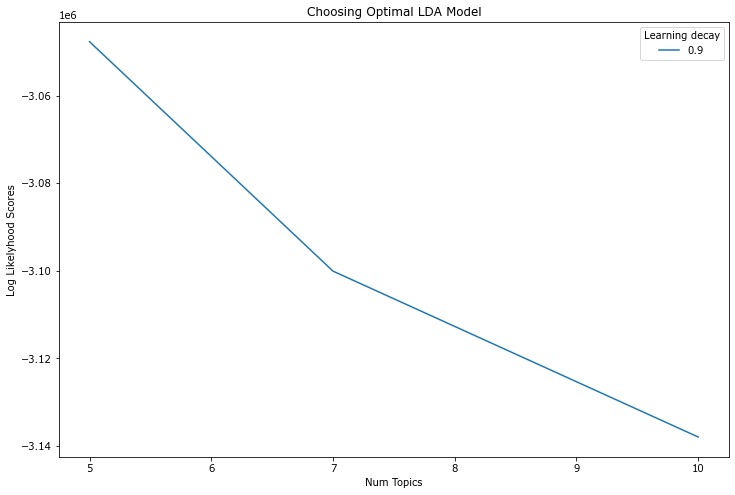

In [11]:
# Get Log Likelyhoods from Grid Search Output
from matplotlib import pyplot as plt

n_topics = [5, 7, 10]
# log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
# log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
# log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]
model.cv_results_
log_likelyhoods_9 = [round(score) for score in model.cv_results_['mean_test_score']]

# Show graph
plt.figure(figsize=(12, 8))
# plt.plot(n_topics, log_likelyhoods_5, label='0.5')
# plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [19]:
import pickle

with open("model.p", "wb") as file:
    pickle.dump(model, file)